
# Reporte de Riesgo Mercado

Equipo 3

- Arturo Hernández Pereztagle			A00838056
- José Eduardo López Arzamendi			A00836314
- Jose Miguel Ruiz de la Garza			A01722268
- Juan Marco Castro Trinidad			A01742821

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Cargar Datos y Definir Variables

In [163]:
# Convierte el excel a csv
import pandas as pd

def excel_a_csv(ruta_excel, ruta_csv):
    # Lee el archivo Excel
    df = pd.read_excel(ruta_excel)
    
    # Guarda el DataFrame como un archivo CSV
    df.to_csv(ruta_csv, index=False)

if __name__ == "__main__":
    ruta_excel = "precios_historicos_cierre.xlsx"
    ruta_csv = "precios_historicos_cierre.csv"
    excel_a_csv(ruta_excel, ruta_csv)
    print(f"Archivo convertido de {ruta_excel} a {ruta_csv}")

Archivo convertido de precios_historicos_cierre.xlsx a precios_historicos_cierre.csv


In [164]:
# Cargar datos históricos
df = pd.read_csv('precios_historicos_cierre.csv')

# Mostrar primeras filas
print("Datos cargados:")
print(df.head())
print(f"\nDimensiones: {df.shape}")
print(f"\nColumnas: {df.columns.tolist()}")

Datos cargados:
         Date  Día      NVDA.O  AAPL.O         LMT   MSFT.O  SIEGn.DE eur  \
0  2025-12-03    1  185.459831  284.06  439.552765  489.095        228.75   
1  2025-12-02    2  181.460000  286.19  441.820000  490.000        227.30   
2  2025-12-01    3  179.920000  283.10  439.190000  486.740        226.20   
3  2025-11-28    4  177.000000  278.85  457.860000  492.010        228.30   
4  2025-11-26    5  180.260000  277.55  454.160000  485.500        228.10   

   SIEGn.DE Usd  GOOGL.O  INTC.O    EUR=  005930.KS Usd          RY  \
0    263.734986   316.70   41.72  1.1670      71.417072  156.698947   
1    264.190790   315.81   43.47  1.1623      70.417739  154.430000   
2    262.618200   314.89   40.01  1.1610      68.495943  152.890000   
3    264.713850   320.18   40.56  1.1595      68.485216  154.090000   
4    264.459140   319.95   36.81  1.1594      69.867808  153.190000   

          JPM  Valor Portafolio  Rendimiento portafolio  
0  311.324359      1.009012e+06     

In [165]:
# Definir el número de acciones de cada empresa
acciones = {
    'SIEGn.DE Usd': 369,
    'AAPL.O': 528,
    'LMT': 217,
    'MSFT.O': 200,
    'NVDA.O': 1892,    
    'GOOGL.O': 381,
    'INTC.O': 1436,
    '005930.KS Usd': 181,
    'RY': 76,
    'JPM': 39
}

print("Número de acciones por empresa:")
for empresa, num_acciones in acciones.items():
    print(f"{empresa}: {num_acciones}")

Número de acciones por empresa:
SIEGn.DE Usd: 369
AAPL.O: 528
LMT: 217
MSFT.O: 200
NVDA.O: 1892
GOOGL.O: 381
INTC.O: 1436
005930.KS Usd: 181
RY: 76
JPM: 39


## 2. Calcular V0 (Valor del Portafolio)

In [166]:
# Calcular V0 (valor del portafolio) para cada día
# V0 = suma de (precio * número de acciones) para todas las empresas

df['V0'] = 0
for empresa, num_acciones in acciones.items():
    if empresa in df.columns:
        df['V0'] += df[empresa] * num_acciones + 6.833
    else:
        print(f"Advertencia: {empresa} no encontrada en el DataFrame")

print("V0 calculado para cada día:")
print(df[['Date', 'Día', 'V0']].head(10))
print(f"\nV0 actual (día más reciente): ${df['V0'].iloc[0]:,.2f}")

V0 calculado para cada día:
         Date  Día            V0
0  2025-12-03    1  1.009012e+06
1  2025-12-02    2  1.005096e+06
2  2025-12-01    3  9.930049e+05
3  2025-11-28    4  9.941717e+05
4  2025-11-26    5  9.919514e+05
5  2025-11-25    6  9.835527e+05
6  2025-11-24    7  9.862562e+05
7  2025-11-21    8  9.677652e+05
8  2025-11-20    9  9.675071e+05
9  2025-11-19   10  9.841923e+05

V0 actual (día más reciente): $1,009,012.05


## 3. Calcular P&L (Profit and Loss)

In [167]:
# Calcular P&L: diferencia entre el V0 del día actual y el V0 del día anterior
# P&L = V0_actual - V0_anterior
# Como los datos están ordenados del más reciente al más antiguo, usamos shift(-1)

df['P&L'] = df['V0'] - df['V0'].shift(-1)

# El último día no tiene P&L porque no hay día siguiente
print("P&L calculado:")
print(df[['Date', 'Día', 'V0', 'P&L']].head(10))
print(f"\nNúmero de P&L calculados: {df['P&L'].notna().sum()}")

P&L calculado:
         Date  Día            V0           P&L
0  2025-12-03    1  1.009012e+06   3915.597681
1  2025-12-02    2  1.005096e+06  12091.600792
2  2025-12-01    3  9.930049e+05  -1166.833228
3  2025-11-28    4  9.941717e+05   2220.308761
4  2025-11-26    5  9.919514e+05   8398.626577
5  2025-11-25    6  9.835527e+05  -2703.420706
6  2025-11-24    7  9.862562e+05  18491.016676
7  2025-11-21    8  9.677652e+05    258.005181
8  2025-11-20    9  9.675071e+05 -16685.117798
9  2025-11-19   10  9.841923e+05  12054.044912

Número de P&L calculados: 1061


## 4. Calcular Ranked P&L

In [168]:
# Ranked P&L: ordenar el P&L de menor a mayor
df['Ranked_P&L'] = df['P&L'].rank(method='min', na_option='keep')

print("Ranked P&L:")
print(df[['Date', 'Día', 'P&L', 'Ranked_P&L']].dropna().head(10))
print("\nP&L más bajo (peores pérdidas):")
print(df[['Date', 'Día', 'P&L', 'Ranked_P&L']].nsmallest(5, 'P&L'))

Ranked P&L:
         Date  Día           P&L  Ranked_P&L
0  2025-12-03    1   3915.597681       717.0
1  2025-12-02    2  12091.600792       989.0
2  2025-12-01    3  -1166.833228       428.0
3  2025-11-28    4   2220.308761       627.0
4  2025-11-26    5   8398.626577       902.0
5  2025-11-25    6  -2703.420706       342.0
6  2025-11-24    7  18491.016676      1045.0
7  2025-11-21    8    258.005181       521.0
8  2025-11-20    9 -16685.117798        30.0
9  2025-11-19   10  12054.044912       988.0

P&L más bajo (peores pérdidas):
           Date  Día           P&L  Ranked_P&L
215  2025-01-27  216 -49191.091901         1.0
167  2025-04-04  168 -41960.082209         2.0
168  2025-04-03  169 -36613.295402         3.0
314  2024-09-03  315 -32805.169534         4.0
13   2025-11-13   14 -31502.581061         5.0


## 5. Calcular Rendimiento

In [169]:
# Calcular Rendimiento: (V0_actual / V0_anterior) - 1
df['Rendimiento'] = ((df['V0'] / df['V0'].shift(-1)) - 1).shift(1)

print("Rendimiento calculado:")
print(df[['Date', 'Día', 'V0', 'Rendimiento']].head(10))

# Estadísticas del rendimiento
print("\n" + "="*50)
print("ESTADÍSTICAS DEL RENDIMIENTO")
print("="*50)
print(f"Rendimiento promedio: {df['Rendimiento'].mean():.6f}")
print(f"Desviación estándar: {df['Rendimiento'].std():.6f}")
print(f"Rendimiento mínimo: {df['Rendimiento'].min():.6f}")
print(f"Rendimiento máximo: {df['Rendimiento'].max():.6f}")

Rendimiento calculado:
         Date  Día            V0  Rendimiento
0  2025-12-03    1  1.009012e+06          NaN
1  2025-12-02    2  1.005096e+06     0.003896
2  2025-12-01    3  9.930049e+05     0.012177
3  2025-11-28    4  9.941717e+05    -0.001174
4  2025-11-26    5  9.919514e+05     0.002238
5  2025-11-25    6  9.835527e+05     0.008539
6  2025-11-24    7  9.862562e+05    -0.002741
7  2025-11-21    8  9.677652e+05     0.019107
8  2025-11-20    9  9.675071e+05     0.000267
9  2025-11-19   10  9.841923e+05    -0.016953

ESTADÍSTICAS DEL RENDIMIENTO
Rendimiento promedio: 0.000804
Desviación estándar: 0.014182
Rendimiento mínimo: -0.062788
Rendimiento máximo: 0.110703


In [170]:
df

,Date,Día,NVDA.O,AAPL.O,LMT,MSFT.O,SIEGn.DE eur,SIEGn.DE Usd,GOOGL.O,INTC.O,EUR=,005930.KS Usd,RY,JPM,Valor Portafolio,Rendimiento portafolio,V0,P&L,Ranked_P&L,Rendimiento
0,2025-12-03,1,185.459831,284.06,439.552765,489.095,228.75,263.734986,316.70,41.72,1.1670,71.417072,156.698947,311.324359,1.009012e+06,0.009012,1.009012e+06,3915.597681,717.0,NaN
1,2025-12-02,2,181.460000,286.19,441.820000,490.000,227.30,264.190790,315.81,43.47,1.1623,70.417739,154.430000,307.880000,1.005539e+06,0.005539,1.005096e+06,12091.600792,989.0,0.003896
2,2025-12-01,3,179.920000,283.10,439.190000,486.740,226.20,262.618200,314.89,40.01,1.1610,68.495943,152.890000,308.920000,9.938712e+05,-0.006129,9.930049e+05,-1166.833228,428.0,0.012177
3,2025-11-28,4,177.000000,278.85,457.860000,492.010,228.30,264.713850,320.18,40.56,1.1595,68.485216,154.090000,313.080000,9.947866e+05,-0.005213,9.941717e+05,2220.308761,627.0,-0.001174
4,2025-11-26,5,180.260000,277.55,454.160000,485.500,228.10,264.459140,319.95,36.81,1.1594,69.867808,153.190000,307.640000,9.925966e+05,-0.007403,9.919514e+05,8398.626577,902.0,0.002238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,2021-09-17,1058,21.900000,146.06,340.980000,299.870,149.52,175.312200,140.80,54.26,1.1725,65.385495,100.120000,157.680000,NaN,NaN,4.744352e+05,-5543.246496,202.0,-0.023330
1058,2021-09-16,1059,22.240000,148.79,341.500000,305.220,149.78,176.201192,143.61,54.83,1.1764,64.755486,102.180000,158.090000,NaN,NaN,4.799785e+05,-951.641934,440.0,-0.011549
1059,2021-09-15,1060,22.340000,149.03,345.070000,304.820,146.72,173.349680,144.43,55.12,1.1815,66.024712,102.600000,158.160000,NaN,NaN,4.809301e+05,3266.449043,684.0,-0.001979
1060,2021-09-14,1061,22.240000,148.12,344.340000,299.790,147.84,174.480768,142.54,54.52,1.1802,65.345538,101.250000,157.070000,NaN,NaN,4.776637e+05,-635.282975,458.0,0.006838


In [171]:
# Guardar variables importantes para usar en cálculos posteriores
rendimiento_promedio = df['Rendimiento'].mean()
desviacion_estandar = df['Rendimiento'].std()
V0_hoy = df['V0'].iloc[0]  # Valor más reciente del portafolio

print(f"\nVariables guardadas:")
print(f"Rendimiento Promedio: {rendimiento_promedio:.6f}")
print(f"Desviación Estándar: {desviacion_estandar:.6f}")
print(f"V0 Actual: ${V0_hoy:,.2f}")



Variables guardadas:
Rendimiento Promedio: 0.000804
Desviación Estándar: 0.014182
V0 Actual: $1,009,012.05


## 6. Calcular VaR Paramétrico

In [172]:
# ============================================================================
# VaR PARAMÉTRICO CON VENTANA MÓVIL DE 1,000 DÍAS
# ============================================================================
# Para cada día, calculamos el VaR usando los 1,000 días anteriores

# Configuración
ventana = 999  # Días de historia para calcular promedio y desviación

# Valores z para diferentes niveles de confianza
z_99 = 2.326  # 99% de confianza (1% VaR)
z_95 = 1.645  # 95% de confianza (5% VaR)

print("="*80)
print("VaR PARAMÉTRICO CON VENTANA MÓVIL DE 1,000 DÍAS")
print("="*80)

# Listas para almacenar resultados
var_rolling = []

# Solo podemos calcular VaR para días que tienen 1000 días previos
# Como los datos van del más reciente (índice 0) al más antiguo (índice N),
# necesitamos que haya al menos 1000 días hacia adelante (índices mayores)
num_dias_disponibles = len(df) - ventana

print(f"\n📊 Información:")
print(f"   Total de días en el dataset: {len(df)}")
print(f"   Ventana de cálculo: {ventana} días")
print(f"   Días con VaR calculable: {num_dias_disponibles}")
print(f"   (desde el día más reciente hasta el día {num_dias_disponibles})")

# Calcular VaR para cada día que tenga suficiente historia
for i in range(num_dias_disponibles):
    # Para el día i (índice i), tomamos los rendimientos desde i+1 hasta i+1000
    # Estos son los 1000 días ANTERIORES al día i
    rendimientos_ventana = df['Rendimiento'].iloc[i+1:i+1+ventana]
    
    # Calcular estadísticas de la ventana
    rendimiento_promedio = rendimientos_ventana.mean()
    desviacion_estandar = rendimientos_ventana.std()
    V0_dia = df['V0'].iloc[i]
    
    # Calcular VaR paramétrico para este día
    # Fórmula: VaR = V0 * (z * desviación_estándar - rendimiento_promedio)
    VaR_1pct = V0_dia * (z_99 * desviacion_estandar - rendimiento_promedio)
    VaR_5pct = V0_dia * (z_95 * desviacion_estandar - rendimiento_promedio)
    
    # Guardar resultados
    var_rolling.append({
        'Dia': df['Día'].iloc[i],
        'Date': df['Date'].iloc[i],
        'V0': V0_dia,
        'Rendimiento_Promedio': rendimiento_promedio,
        'Desviacion_Estandar': desviacion_estandar,
        'VaR_1pct': abs(VaR_1pct),
        'VaR_5pct': abs(VaR_5pct),
        'VaR_1pct_pct': abs((VaR_1pct / V0_dia) * 100),
        'VaR_5pct_pct': abs((VaR_5pct / V0_dia) * 100)
    })

# Crear DataFrame con resultados
df_var_rolling = pd.DataFrame(var_rolling)

print(f"\n✅ VaR calculado para {len(df_var_rolling)} días")
print(f"\n📅 PRIMEROS 10 DÍAS:")
print(df_var_rolling[['Date', 'Dia', 'V0', 'VaR_1pct', 'VaR_1pct_pct', 'VaR_5pct', 'VaR_5pct_pct']].head(10).to_string(index=False))

# Mostrar el VaR del día más reciente (2025-12-01)
print("\n" + "="*80)
print(f"VaR PARAMÉTRICO PARA EL DÍA MÁS RECIENTE: {df_var_rolling['Date'].iloc[0]}")
print("="*80)

VaR_parametrico_1pct = df_var_rolling['VaR_1pct'].iloc[0]
VaR_parametrico_5pct = df_var_rolling['VaR_5pct'].iloc[0]
rendimiento_promedio = df_var_rolling['Rendimiento_Promedio'].iloc[0]
desviacion_estandar = df_var_rolling['Desviacion_Estandar'].iloc[0]

print(f"\n📊 Estadísticas de la ventana de 1,000 días:")
print(f"   Rendimiento Promedio: {rendimiento_promedio:.6f}")
print(f"   Desviación Estándar:  {desviacion_estandar:.6f}")

print(f"\n1% VaR (99% confianza):")
print(f"  Pérdida máxima esperada: ${abs(VaR_parametrico_1pct):,.2f}")
print(f"  Porcentaje del portafolio: {abs(VaR_parametrico_1pct/V0_hoy)*100:.2f}%")

print(f"\n5% VaR (95% confianza):")
print(f"  Pérdida máxima esperada: ${abs(VaR_parametrico_5pct):,.2f}")
print(f"  Porcentaje del portafolio: {abs(VaR_parametrico_5pct/V0_hoy)*100:.2f}%")

print(f"\nValor del portafolio actual: ${V0_hoy:,.2f}")

print("\n" + "="*80)
print("⚠️  NOTA IMPORTANTE:")
print("="*80)
print(f"Este VaR se calculó usando una VENTANA MÓVIL de {ventana} días.")
print(f"Para cada día, se toma el promedio y desviación estándar de los {ventana} días")
print(f"ANTERIORES a ese día, reflejando el riesgo basado en historia reciente.")
print("="*80)


VaR PARAMÉTRICO CON VENTANA MÓVIL DE 1,000 DÍAS

📊 Información:
   Total de días en el dataset: 1062
   Ventana de cálculo: 999 días
   Días con VaR calculable: 63
   (desde el día más reciente hasta el día 63)

✅ VaR calculado para 63 días

📅 PRIMEROS 10 DÍAS:
      Date  Dia           V0     VaR_1pct  VaR_1pct_pct     VaR_5pct  VaR_5pct_pct
2025-12-03    1 1.009012e+06 32906.723028      3.261281 23039.470854      2.283369
2025-12-02    2 1.005096e+06 32801.719407      3.263539 22970.209661      2.285374
2025-12-01    3 9.930049e+05 32408.270468      3.263657 22698.104643      2.285800
2025-11-28    4 9.941717e+05 32483.475964      3.267391 22741.977429      2.287530
2025-11-26    5 9.919514e+05 32412.839816      3.267584 22689.181883      2.287328
2025-11-25    6 9.835527e+05 32165.079719      3.270295 22521.685695      2.289830
2025-11-24    7 9.862562e+05 32245.955251      3.269531 22575.445448      2.289004
2025-11-21    8 9.677652e+05 31638.806843      3.269265 22156.840079      

In [173]:
df_var_rolling

,Dia,Date,V0,Rendimiento_Promedio,Desviacion_Estandar,VaR_1pct,VaR_5pct,VaR_1pct_pct,VaR_5pct_pct
0,1,2025-12-03,1.009012e+06,0.000788,0.014360,32906.723028,23039.470854,3.261281,2.283369
1,2,2025-12-02,1.005096e+06,0.000774,0.014364,32801.719407,22970.209661,3.263539,2.285374
2,3,2025-12-01,9.930049e+05,0.000763,0.014359,32408.270468,22698.104643,3.263657,2.285800
3,4,2025-11-28,9.941717e+05,0.000794,0.014389,32483.475964,22741.977429,3.267391,2.287530
4,5,2025-11-26,9.919514e+05,0.000805,0.014394,32412.839816,22689.181883,3.267584,2.287328
...,...,...,...,...,...,...,...,...,...
58,59,2025-09-11,9.176762e+05,0.000762,0.014277,29775.131304,20852.858281,3.244623,2.272355
59,60,2025-09-10,9.134329e+05,0.000746,0.014282,29662.413855,20778.424132,3.247355,2.274762
60,61,2025-09-09,9.027192e+05,0.000732,0.014278,29318.431934,20541.155753,3.247791,2.275476
61,62,2025-09-08,8.993815e+05,0.000735,0.014279,29209.300798,20463.866886,3.247710,2.275327


## 7. Calcular VaR No Paramétrico (Histórico)

In [174]:
# ============================================================================
# VaR NO PARAMÉTRICO (HISTÓRICO) CON VENTANA MÓVIL DE 1,000 DÍAS
# ============================================================================
# Para cada día, calculamos el VaR histórico usando los 1,000 días anteriores

print("="*80)
print("VaR NO PARAMÉTRICO (HISTÓRICO) CON VENTANA MÓVIL DE 1,000 DÍAS")
print("="*80)

# Configuración
ventana = 1000  # Días de historia para calcular percentiles

# Percentiles para diferentes niveles de confianza
percentil_1pct = 0.01  # Para 99% de confianza (1% VaR)
percentil_5pct = 0.05  # Para 95% de confianza (5% VaR)

# Listas para almacenar resultados
var_historico_rolling = []

# Solo podemos calcular VaR para días que tienen 1000 días previos
num_dias_disponibles = len(df) - ventana

print(f"\n📊 Información:")
print(f"   Total de días en el dataset: {len(df)}")
print(f"   Ventana de cálculo: {ventana} días")
print(f"   Días con VaR calculable: {num_dias_disponibles}")
print(f"   (desde el día más reciente hasta el día {num_dias_disponibles})")

# Calcular VaR histórico para cada día que tenga suficiente historia
for i in range(num_dias_disponibles):
    # Para el día i, tomamos los P&L desde i+1 hasta i+1+ventana
    # Estos son los 1000 días ANTERIORES al día i
    # NO usar dropna() aquí para mantener exactamente la ventana que especificamos
    PnL_ventana = df['P&L'].iloc[i:i+ventana]
    
    # Valor del portafolio para el día i
    V0_dia = df['V0'].iloc[i]
    
    # Calcular VaR histórico usando quantile
    # quantile() automáticamente ignora NaN, pero mantiene la distribución correcta
    # quantile(0.01) = percentil 1% (99% confianza)
    # quantile(0.05) = percentil 5% (95% confianza)
    VaR_hist_1pct = PnL_ventana.quantile(percentil_1pct)
    VaR_hist_5pct = PnL_ventana.quantile(percentil_5pct)
    
    num_obs_ventana = PnL_ventana.notna().sum()  # Contar solo valores no-NaN
    
    # Guardar resultados
    var_historico_rolling.append({
        'Dia': df['Día'].iloc[i],
        'Date': df['Date'].iloc[i],
        'V0': V0_dia,
        'VaR_hist_1pct': VaR_hist_1pct,
        'VaR_hist_5pct': VaR_hist_5pct,
        'VaR_hist_1pct_pct': (VaR_hist_1pct / V0_dia) * 100,
        'VaR_hist_5pct_pct': (VaR_hist_5pct / V0_dia) * 100,
        'Num_Obs': num_obs_ventana
    })

# Crear DataFrame con resultados
df_var_historico_rolling = pd.DataFrame(var_historico_rolling)

print(f"\n✅ VaR histórico calculado para {len(df_var_historico_rolling)} días")
print(f"\n📅 PRIMEROS 10 DÍAS:")
print(df_var_historico_rolling[['Date', 'Dia', 'V0', 'VaR_hist_1pct', 'VaR_hist_1pct_pct', 'VaR_hist_5pct', 'VaR_hist_5pct_pct']].head(10).to_string(index=False))

# Mostrar el VaR del día más reciente
print("\n" + "="*80)
print(f"VaR HISTÓRICO PARA EL DÍA MÁS RECIENTE: {df_var_historico_rolling['Date'].iloc[0]}")
print("="*80)

VaR_no_parametrico_1pct = df_var_historico_rolling['VaR_hist_1pct'].iloc[0]
VaR_no_parametrico_5pct = df_var_historico_rolling['VaR_hist_5pct'].iloc[0]

print(f"\n📊 Estadísticas de la ventana de 1,000 días:")
print(f"   Número de observaciones: {df_var_historico_rolling['Num_Obs'].iloc[0]}")

print(f"\n1% VaR (99% confianza):")
print(f"  Pérdida máxima esperada: ${abs(VaR_no_parametrico_1pct):,.2f}")
print(f"  Porcentaje del portafolio: {abs(VaR_no_parametrico_1pct/V0_hoy)*100:.2f}%")

print(f"\n5% VaR (95% confianza):")
print(f"  Pérdida máxima esperada: ${abs(VaR_no_parametrico_5pct):,.2f}")
print(f"  Porcentaje del portafolio: {abs(VaR_no_parametrico_5pct/V0_hoy)*100:.2f}%")

print(f"\nValor del portafolio actual: ${V0_hoy:,.2f}")

print("\n" + "="*80)
print("⚠️  NOTA IMPORTANTE:")
print("="*80)
print(f"Este VaR se calculó usando una VENTANA MÓVIL de {ventana} días.")
print(f"Para cada día, se toman los percentiles del P&L de los {ventana} días")
print(f"ANTERIORES a ese día, reflejando el riesgo histórico basado en datos recientes.")
print("="*80)


VaR NO PARAMÉTRICO (HISTÓRICO) CON VENTANA MÓVIL DE 1,000 DÍAS

📊 Información:
   Total de días en el dataset: 1062
   Ventana de cálculo: 1000 días
   Días con VaR calculable: 62
   (desde el día más reciente hasta el día 62)



✅ VaR histórico calculado para 62 días

📅 PRIMEROS 10 DÍAS:
      Date  Dia           V0  VaR_hist_1pct  VaR_hist_1pct_pct  VaR_hist_5pct  VaR_hist_5pct_pct
2025-12-03    1 1.009012e+06  -24703.075353          -2.448244  -13536.569937          -1.341567
2025-12-02    2 1.005096e+06  -24703.075353          -2.457782  -13536.569937          -1.346793
2025-12-01    3 9.930049e+05  -24703.075353          -2.487709  -13536.569937          -1.363193
2025-11-28    4 9.941717e+05  -24703.075353          -2.484790  -13536.569937          -1.361593
2025-11-26    5 9.919514e+05  -24703.075353          -2.490351  -13536.569937          -1.364640
2025-11-25    6 9.835527e+05  -24703.075353          -2.511617  -13536.569937          -1.376293
2025-11-24    7 9.862562e+05  -24703.075353          -2.504732  -13536.569937          -1.372521
2025-11-21    8 9.677652e+05  -24703.075353          -2.552590  -13536.569937          -1.398745
2025-11-20    9 9.675071e+05  -24703.075353          -2.553271  -1

In [175]:
df_var_historico_rolling

,Dia,Date,V0,VaR_hist_1pct,VaR_hist_5pct,VaR_hist_1pct_pct,VaR_hist_5pct_pct,Num_Obs
0,1,2025-12-03,1.009012e+06,-24703.075353,-13536.569937,-2.448244,-1.341567,1000
1,2,2025-12-02,1.005096e+06,-24703.075353,-13536.569937,-2.457782,-1.346793,1000
2,3,2025-12-01,9.930049e+05,-24703.075353,-13536.569937,-2.487709,-1.363193,1000
3,4,2025-11-28,9.941717e+05,-24703.075353,-13536.569937,-2.484790,-1.361593,1000
4,5,2025-11-26,9.919514e+05,-24703.075353,-13536.569937,-2.490351,-1.364640,1000
...,...,...,...,...,...,...,...,...
57,58,2025-09-12,9.223442e+05,-22360.870138,-12497.079084,-2.424352,-1.354926,1000
58,59,2025-09-11,9.176762e+05,-22360.870138,-12497.079084,-2.436684,-1.361818,1000
59,60,2025-09-10,9.134329e+05,-22360.870138,-12497.079084,-2.448004,-1.368144,1000
60,61,2025-09-09,9.027192e+05,-22360.870138,-12497.079084,-2.477057,-1.384382,1000


In [176]:
# ============================================================================
# COMPARACIÓN: VaR PARAMÉTRICO VS HISTÓRICO (VENTANA MÓVIL)
# ============================================================================

print("="*80)
print("COMPARACIÓN DE MÉTODOS VaR - VENTANA MÓVIL DE 1,000 DÍAS")
print("="*80)

# Fusionar ambos DataFrames para comparación
df_comparacion = df_var_rolling.merge(
    df_var_historico_rolling[['Dia', 'VaR_hist_1pct', 'VaR_hist_5pct', 'VaR_hist_1pct_pct', 'VaR_hist_5pct_pct']],
    on='Dia',
    how='inner'
)

print(f"\n📊 Datos disponibles para comparación: {len(df_comparacion)} días")
print(f"   Desde el día {df_comparacion['Dia'].max()} hasta el día {df_comparacion['Dia'].min()}")

# Mostrar primeros 10 días
print(f"\n📅 PRIMEROS 10 DÍAS DE COMPARACIÓN:")
print(df_comparacion[['Date', 'Dia', 'VaR_1pct', 'VaR_hist_1pct', 'VaR_5pct', 'VaR_hist_5pct']].head(10).to_string(index=False))

# Estadísticas de la diferencia
print("\n" + "="*80)
print("ANÁLISIS DE DIFERENCIAS ENTRE MÉTODOS")
print("="*80)

df_comparacion['Diff_1pct'] = abs(df_comparacion['VaR_hist_1pct']) - abs(df_comparacion['VaR_1pct'])
df_comparacion['Diff_5pct'] = abs(df_comparacion['VaR_hist_5pct']) - abs(df_comparacion['VaR_5pct'])

print(f"\n1% VaR (99% Confianza):")
print(f"   Diferencia promedio: ${df_comparacion['Diff_1pct'].mean():,.2f}")
print(f"   Diferencia máxima:   ${df_comparacion['Diff_1pct'].max():,.2f}")
print(f"   Diferencia mínima:   ${df_comparacion['Diff_1pct'].min():,.2f}")

print(f"\n5% VaR (95% Confianza):")
print(f"   Diferencia promedio: ${df_comparacion['Diff_5pct'].mean():,.2f}")
print(f"   Diferencia máxima:   ${df_comparacion['Diff_5pct'].max():,.2f}")
print(f"   Diferencia mínima:   ${df_comparacion['Diff_5pct'].min():,.2f}")

# Para el día más reciente
print("\n" + "="*80)
print(f"COMPARACIÓN PARA EL DÍA MÁS RECIENTE: {df_comparacion['Date'].iloc[0]}")
print("="*80)

print(f"\n1% VaR (99% Confianza):")
print(f"   Paramétrico:  ${abs(df_comparacion['VaR_1pct'].iloc[0]):,.2f} ({abs(df_comparacion['VaR_1pct_pct'].iloc[0]):.2f}%)")
print(f"   Histórico:    ${abs(df_comparacion['VaR_hist_1pct'].iloc[0]):,.2f} ({abs(df_comparacion['VaR_hist_1pct_pct'].iloc[0]):.2f}%)")
print(f"   Diferencia:   ${abs(df_comparacion['Diff_1pct'].iloc[0]):,.2f}")

print(f"\n5% VaR (95% Confianza):")
print(f"   Paramétrico:  ${abs(df_comparacion['VaR_5pct'].iloc[0]):,.2f} ({abs(df_comparacion['VaR_5pct_pct'].iloc[0]):.2f}%)")
print(f"   Histórico:    ${abs(df_comparacion['VaR_hist_5pct'].iloc[0]):,.2f} ({abs(df_comparacion['VaR_hist_5pct_pct'].iloc[0]):.2f}%)")
print(f"   Diferencia:   ${abs(df_comparacion['Diff_5pct'].iloc[0]):,.2f}")

print("\n" + "="*80)

COMPARACIÓN DE MÉTODOS VaR - VENTANA MÓVIL DE 1,000 DÍAS

📊 Datos disponibles para comparación: 62 días
   Desde el día 62 hasta el día 1

📅 PRIMEROS 10 DÍAS DE COMPARACIÓN:
      Date  Dia     VaR_1pct  VaR_hist_1pct     VaR_5pct  VaR_hist_5pct
2025-12-03    1 32906.723028  -24703.075353 23039.470854  -13536.569937
2025-12-02    2 32801.719407  -24703.075353 22970.209661  -13536.569937
2025-12-01    3 32408.270468  -24703.075353 22698.104643  -13536.569937
2025-11-28    4 32483.475964  -24703.075353 22741.977429  -13536.569937
2025-11-26    5 32412.839816  -24703.075353 22689.181883  -13536.569937
2025-11-25    6 32165.079719  -24703.075353 22521.685695  -13536.569937
2025-11-24    7 32245.955251  -24703.075353 22575.445448  -13536.569937
2025-11-21    8 31638.806843  -24703.075353 22156.840079  -13536.569937
2025-11-20    9 31652.663402  -24703.075353 22169.948035  -13536.569937
2025-11-19   10 32163.376796  -24703.075353 22517.223882  -13448.532964

ANÁLISIS DE DIFERENCIAS ENTRE MÉT

## 8. Visualización del VaR Paramétrico en el Tiempo

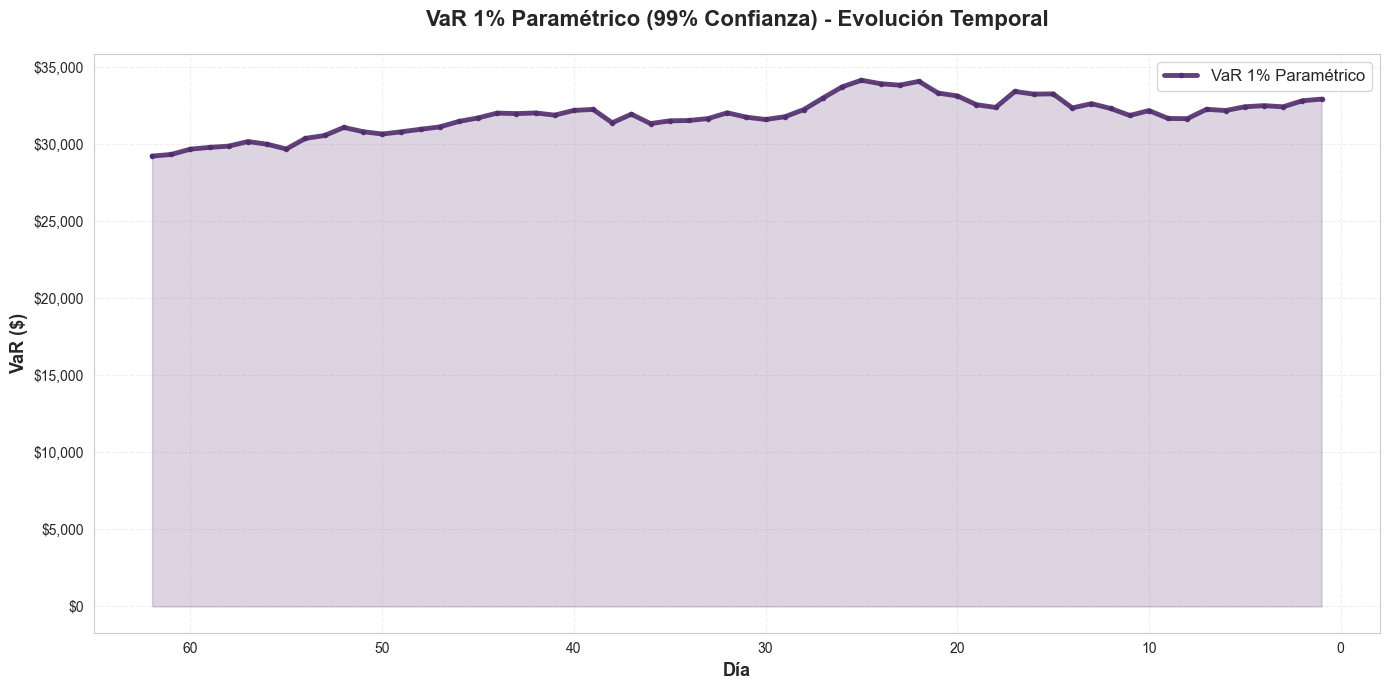

In [177]:
# ============================================================================
# GRÁFICA 1: VaR 1% Paramétrico (99% Confianza)
# ============================================================================

fig, ax = plt.subplots(figsize=(14, 7))

# Color tema morado
color_morado = '#512d6d'

ax.plot(df_comparacion['Dia'], abs(df_comparacion['VaR_1pct']), 
         linewidth=3.5, color=color_morado, label='VaR 1% Paramétrico', alpha=0.9, marker='o', markersize=3)
ax.fill_between(df_comparacion['Dia'], 0, abs(df_comparacion['VaR_1pct']),
                 alpha=0.2, color=color_morado)

ax.set_xlabel('Día', fontsize=13, fontweight='bold')
ax.set_ylabel('VaR ($)', fontsize=13, fontweight='bold')
ax.set_title('VaR 1% Paramétrico (99% Confianza) - Evolución Temporal', 
              fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='best')
ax.grid(True, alpha=0.3, linestyle='--')
ax.invert_xaxis()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

### Gráfica 2: VaR 5% Paramétrico (95% Confianza)

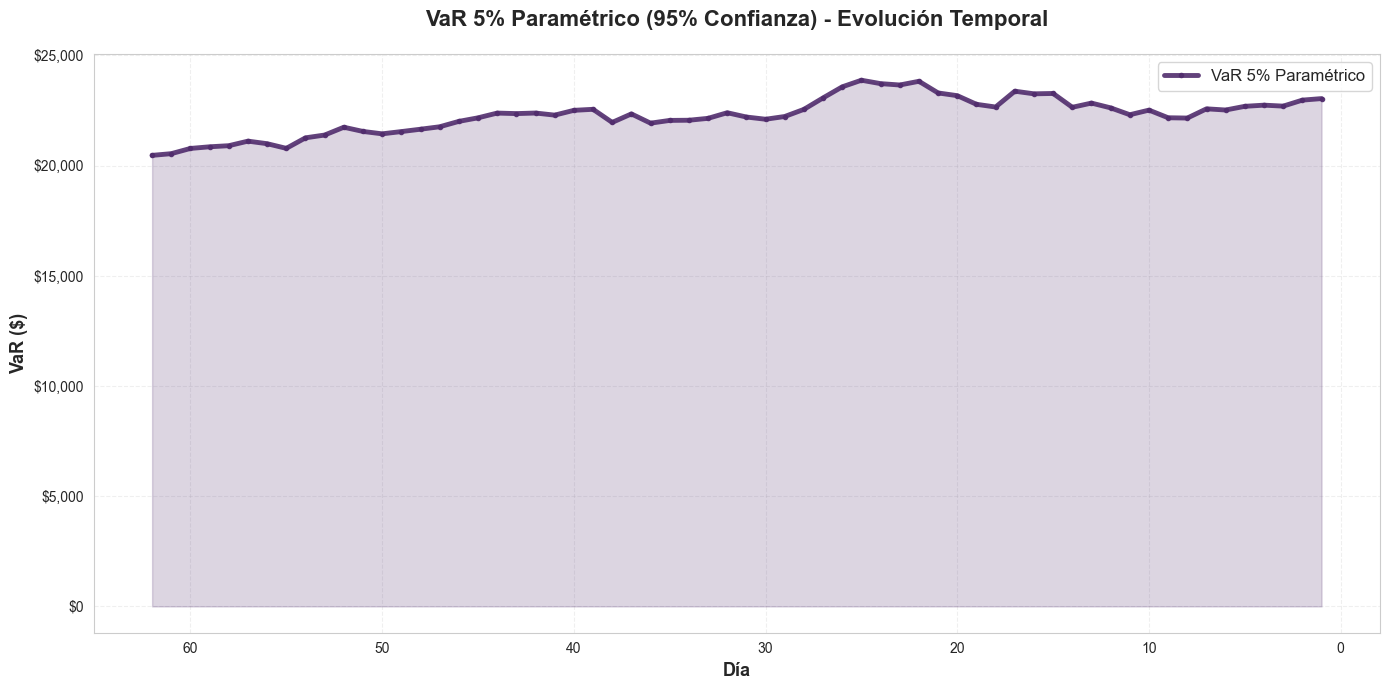

In [178]:
# ============================================================================
# GRÁFICA 2: VaR 5% Paramétrico (95% Confianza)
# ============================================================================

fig, ax = plt.subplots(figsize=(14, 7))

# Color tema morado
color_morado = '#512d6d'

ax.plot(df_comparacion['Dia'], abs(df_comparacion['VaR_5pct']), 
         linewidth=3.5, color=color_morado, label='VaR 5% Paramétrico', alpha=0.9, marker='o', markersize=3)
ax.fill_between(df_comparacion['Dia'], 0, abs(df_comparacion['VaR_5pct']),
                 alpha=0.2, color=color_morado)

ax.set_xlabel('Día', fontsize=13, fontweight='bold')
ax.set_ylabel('VaR ($)', fontsize=13, fontweight='bold')
ax.set_title('VaR 5% Paramétrico (95% Confianza) - Evolución Temporal', 
              fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='best')
ax.grid(True, alpha=0.3, linestyle='--')
ax.invert_xaxis()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

### Gráfica 3: Comparación VaR 1% vs 5% Paramétrico

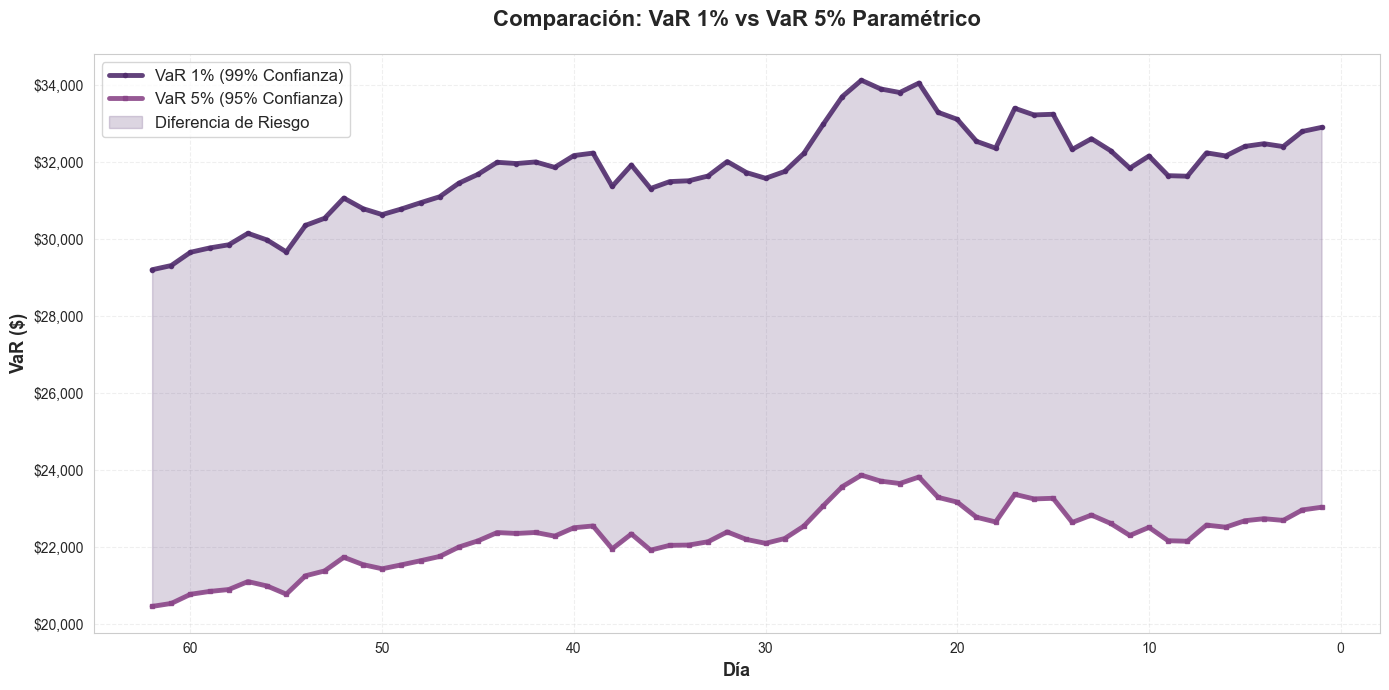

In [179]:
# ============================================================================
# GRÁFICA 3: Comparación VaR 1% vs VaR 5% (Paramétrico)
# ============================================================================

fig, ax = plt.subplots(figsize=(14, 7))

# Colores tema morado
color_var1 = '#512d6d'  # Morado oscuro para VaR 1%
color_var5 = '#8b4789'  # Morado claro para VaR 5%

ax.plot(df_comparacion['Dia'], abs(df_comparacion['VaR_1pct']), 
         linewidth=3.5, color=color_var1, label='VaR 1% (99% Confianza)', alpha=0.9, marker='o', markersize=3)
ax.plot(df_comparacion['Dia'], abs(df_comparacion['VaR_5pct']), 
         linewidth=3.5, color=color_var5, label='VaR 5% (95% Confianza)', alpha=0.9, marker='s', markersize=3)

# Sombrear el área entre las dos líneas
ax.fill_between(df_comparacion['Dia'], abs(df_comparacion['VaR_5pct']), abs(df_comparacion['VaR_1pct']),
                 alpha=0.2, color=color_var1, label='Diferencia de Riesgo')

ax.set_xlabel('Día', fontsize=13, fontweight='bold')
ax.set_ylabel('VaR ($)', fontsize=13, fontweight='bold')
ax.set_title('Comparación: VaR 1% vs VaR 5% Paramétrico', 
              fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='best')
ax.grid(True, alpha=0.3, linestyle='--')
ax.invert_xaxis()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

### Gráfica 4: VaR Paramétrico en Porcentaje con Límite del 4%

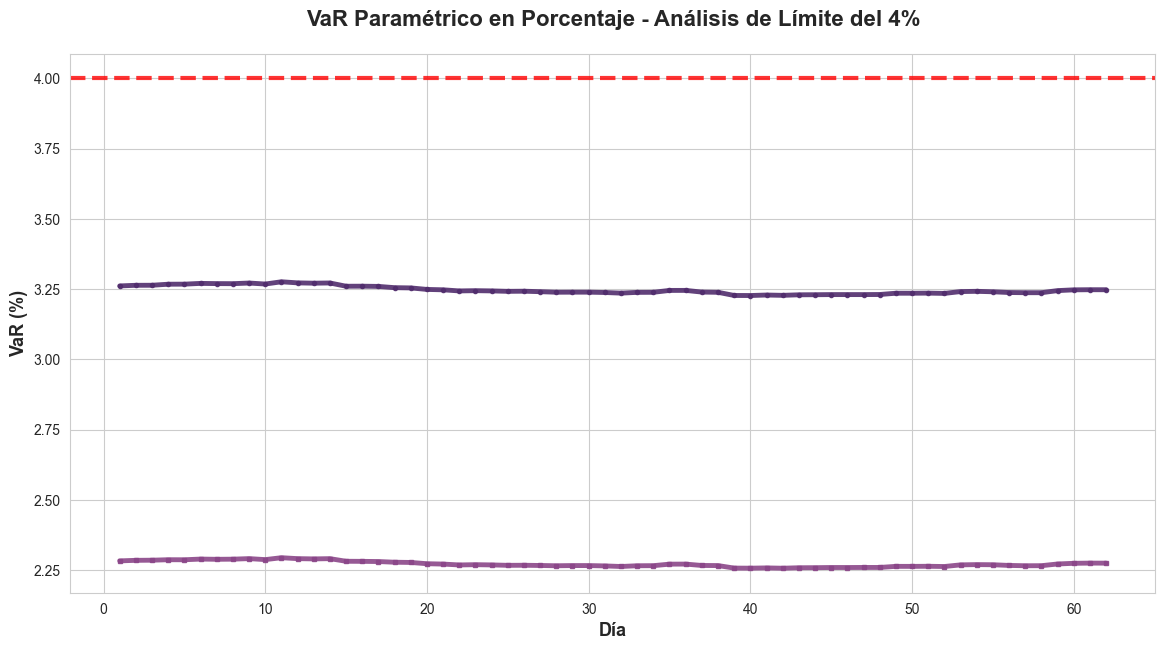

In [180]:
# ============================================================================
# GRÁFICA 4: VaR Paramétrico en Porcentaje - Límite del 4%
# ============================================================================

fig, ax = plt.subplots(figsize=(14, 7))

# Colores tema morado
color_var1 = '#512d6d'  # Morado oscuro para VaR 1%
color_var5 = '#8b4789'  # Morado claro para VaR 5%
limite_riesgo = 4.0  # Límite del 4%

# Graficar VaR en porcentaje
ax.plot(df_comparacion['Dia'], abs(df_comparacion['VaR_1pct_pct']), 
         linewidth=3.5, color=color_var1, label='VaR 1% (%)', alpha=0.9, marker='o', markersize=3)
ax.plot(df_comparacion['Dia'], abs(df_comparacion['VaR_5pct_pct']), 
         linewidth=3.5, color=color_var5, label='VaR 5% (%)', alpha=0.9, marker='s', markersize=3)

# Línea de límite del 4%
ax.axhline(y=limite_riesgo, color='red', linestyle='--', linewidth=3, label=f'Límite de Riesgo ({limite_riesgo}%)', alpha=0.8)

# Sombrear áreas que superan el límite
ax.fill_between(df_comparacion['Dia'], limite_riesgo, abs(df_comparacion['VaR_1pct_pct']),
                 where=(abs(df_comparacion['VaR_1pct_pct']) > limite_riesgo), 
                 alpha=0.3, color='red', label='VaR 1% supera límite')
ax.fill_between(df_comparacion['Dia'], limite_riesgo, abs(df_comparacion['VaR_5pct_pct']),
                 where=(abs(df_comparacion['VaR_5pct_pct']) > limite_riesgo), 
                 alpha=0.2, color='orange', label='VaR 5% supera límite')

ax.set_xlabel('Día', fontsize=13, fontweight='bold')
ax.set_ylabel('VaR (%)', fontsize=13, fontweight='bold')
ax.set_title('VaR Paramétrico en Porcentaje - Análisis de Límite del 4%',fontsize=16, fontweight='bold', pad=20)
plt.show()

#ax.legend(fontsize=11, loc='best')
#plt.tight_layout()

#ax.grid(True, alpha=0.3, linestyle='--')
#ax.invert_xaxis()

In [181]:
print("="*80)
print("📊 INTERPRETACIÓN DE LAS GRÁFICAS")
print("="*80)
print("\n✅ Gráficos 1 y 2:")
print("   Muestran la evolución temporal del VaR Paramétrico para los niveles de confianza del 99% y 95%")
print("   Se puede observar cómo el riesgo varía con el tiempo según la ventana móvil de 1,000 días")

print("\n✅ Gráfico 3:")
print("   Compara directamente el VaR 1% vs VaR 5%")
print("   • El VaR 1% (99% confianza) es SIEMPRE mayor que el VaR 5% (95% confianza)")
print("   • El área sombreada muestra la diferencia de riesgo entre ambos niveles de confianza")

print("\n✅ Gráfico 4:")
print("   Muestra el VaR en porcentaje y su relación con el límite del 4%")
print("   • Línea ROJA: Límite de riesgo del 4%")
print("   • Zonas sombreadas: Días donde el VaR supera el límite establecido")


📊 INTERPRETACIÓN DE LAS GRÁFICAS

✅ Gráficos 1 y 2:
   Muestran la evolución temporal del VaR Paramétrico para los niveles de confianza del 99% y 95%
   Se puede observar cómo el riesgo varía con el tiempo según la ventana móvil de 1,000 días

✅ Gráfico 3:
   Compara directamente el VaR 1% vs VaR 5%
   • El VaR 1% (99% confianza) es SIEMPRE mayor que el VaR 5% (95% confianza)
   • El área sombreada muestra la diferencia de riesgo entre ambos niveles de confianza

✅ Gráfico 4:
   Muestra el VaR en porcentaje y su relación con el límite del 4%
   • Línea ROJA: Límite de riesgo del 4%
   • Zonas sombreadas: Días donde el VaR supera el límite establecido


### 8.1 Consumo de Límite de VaR (99% Confianza)

In [182]:
df_comparacion

,Dia,Date,V0,Rendimiento_Promedio,Desviacion_Estandar,VaR_1pct,VaR_5pct,VaR_1pct_pct,VaR_5pct_pct,VaR_hist_1pct,VaR_hist_5pct,VaR_hist_1pct_pct,VaR_hist_5pct_pct,Diff_1pct,Diff_5pct
0,1,2025-12-03,1.009012e+06,0.000788,0.014360,32906.723028,23039.470854,3.261281,2.283369,-24703.075353,-13536.569937,-2.448244,-1.341567,-8203.647676,-9502.900917
1,2,2025-12-02,1.005096e+06,0.000774,0.014364,32801.719407,22970.209661,3.263539,2.285374,-24703.075353,-13536.569937,-2.457782,-1.346793,-8098.644055,-9433.639724
2,3,2025-12-01,9.930049e+05,0.000763,0.014359,32408.270468,22698.104643,3.263657,2.285800,-24703.075353,-13536.569937,-2.487709,-1.363193,-7705.195116,-9161.534706
3,4,2025-11-28,9.941717e+05,0.000794,0.014389,32483.475964,22741.977429,3.267391,2.287530,-24703.075353,-13536.569937,-2.484790,-1.361593,-7780.400612,-9205.407492
4,5,2025-11-26,9.919514e+05,0.000805,0.014394,32412.839816,22689.181883,3.267584,2.287328,-24703.075353,-13536.569937,-2.490351,-1.364640,-7709.764463,-9152.611946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,2025-09-12,9.223442e+05,0.000791,0.014257,29857.975226,20902.724310,3.237183,2.266261,-22360.870138,-12497.079084,-2.424352,-1.354926,-7497.105088,-8405.645226
58,59,2025-09-11,9.176762e+05,0.000762,0.014277,29775.131304,20852.858281,3.244623,2.272355,-22360.870138,-12497.079084,-2.436684,-1.361818,-7414.261166,-8355.779197
59,60,2025-09-10,9.134329e+05,0.000746,0.014282,29662.413855,20778.424132,3.247355,2.274762,-22360.870138,-12497.079084,-2.448004,-1.368144,-7301.543717,-8281.345047
60,61,2025-09-09,9.027192e+05,0.000732,0.014278,29318.431934,20541.155753,3.247791,2.275476,-22360.870138,-12497.079084,-2.477057,-1.384382,-6957.561796,-8044.076668


ANÁLISIS DE CONSUMO DE LÍMITE DE VaR AL 99% DE CONFIANZA

📊 Límite establecido: 4.0% del valor del portafolio

⚠️  DÍAS QUE EXCEDEN EL LÍMITE DEL 4.0%:
   Método Paramétrico: 0 de 62 días (0.0%)
   Método Histórico:   0 de 62 días (0.0%)


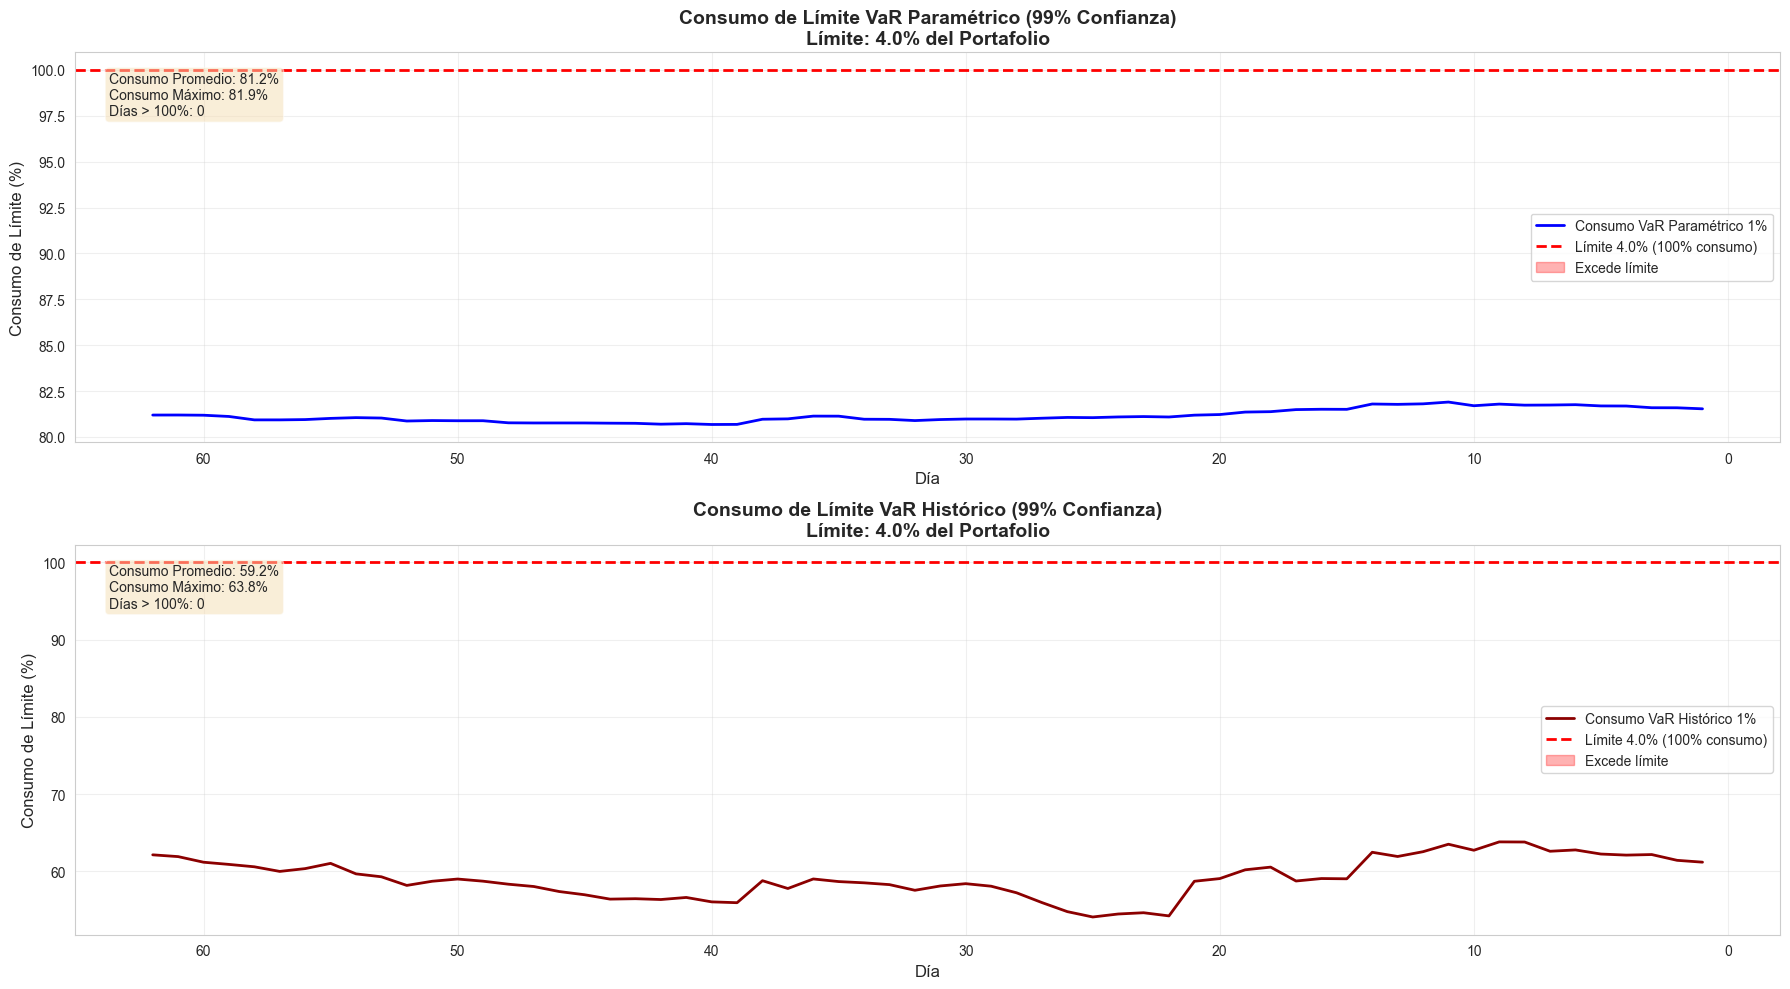


✅ Ningún día excede el límite del 4.0% en ambos métodos.

💡 INTERPRETACIÓN:
   • Consumo de 100% = VaR exactamente igual al límite de 4.0%
   • Consumo > 100% = VaR EXCEDE el límite (zona de alerta)
   • Consumo < 100% = VaR dentro del límite aceptable

   • El método histórico tiende a mostrar MENOR consumo promedio
   • Consumo promedio Paramétrico: 81.2%
   • Consumo promedio Histórico: 59.2%


In [183]:
# ============================================================================
# ANÁLISIS DE CONSUMO DE LÍMITE DE VaR AL 99% DE CONFIANZA
# ============================================================================

# Definir el límite de VaR como porcentaje del portafolio
limite_var_pct = 4.0  # 4% del valor del portafolio

print("="*80)
print("ANÁLISIS DE CONSUMO DE LÍMITE DE VaR AL 99% DE CONFIANZA")
print("="*80)
print(f"\n📊 Límite establecido: {limite_var_pct}% del valor del portafolio")

# Calcular el consumo de límite para cada método
# Consumo = (VaR / V0) * 100 / Límite * 100
# Si consumo > 100%, el VaR excede el límite

df_comparacion['Limite_VaR'] = df_comparacion['V0'] * (limite_var_pct / 100)
df_comparacion['Consumo_Parametrico_1pct'] = (abs(df_comparacion['VaR_1pct']) / df_comparacion['Limite_VaR']) * 100
df_comparacion['Consumo_Historico_1pct'] = (abs(df_comparacion['VaR_hist_1pct']) / df_comparacion['Limite_VaR']) * 100

# Identificar días que exceden el límite
dias_exceden_param = df_comparacion[df_comparacion['Consumo_Parametrico_1pct'] > 100]
dias_exceden_hist = df_comparacion[df_comparacion['Consumo_Historico_1pct'] > 100]

print(f"\n⚠️  DÍAS QUE EXCEDEN EL LÍMITE DEL {limite_var_pct}%:")
print(f"   Método Paramétrico: {len(dias_exceden_param)} de {len(df_comparacion)} días ({len(dias_exceden_param)/len(df_comparacion)*100:.1f}%)")
print(f"   Método Histórico:   {len(dias_exceden_hist)} de {len(df_comparacion)} días ({len(dias_exceden_hist)/len(df_comparacion)*100:.1f}%)")

# Crear visualización
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10))

# GRÁFICO 1: Consumo de Límite - Método Paramétrico
ax1.plot(df_comparacion['Dia'], df_comparacion['Consumo_Parametrico_1pct'], 
         linewidth=2, color='blue', label='Consumo VaR Paramétrico 1%')
ax1.axhline(y=100, color='red', linestyle='--', linewidth=2, label=f'Límite {limite_var_pct}% (100% consumo)')
ax1.fill_between(df_comparacion['Dia'], 100, df_comparacion['Consumo_Parametrico_1pct'],
                  where=(df_comparacion['Consumo_Parametrico_1pct'] > 100), 
                  alpha=0.3, color='red', label='Excede límite')
ax1.set_xlabel('Día', fontsize=12)
ax1.set_ylabel('Consumo de Límite (%)', fontsize=12)
ax1.set_title(f'Consumo de Límite VaR Paramétrico (99% Confianza)\nLímite: {limite_var_pct}% del Portafolio', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.invert_xaxis()

# Añadir texto con estadísticas
consumo_promedio_param = df_comparacion['Consumo_Parametrico_1pct'].mean()
consumo_max_param = df_comparacion['Consumo_Parametrico_1pct'].max()
ax1.text(0.02, 0.95, 
         f'Consumo Promedio: {consumo_promedio_param:.1f}%\nConsumo Máximo: {consumo_max_param:.1f}%\nDías > 100%: {len(dias_exceden_param)}',
         transform=ax1.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# GRÁFICO 2: Consumo de Límite - Método Histórico
ax2.plot(df_comparacion['Dia'], df_comparacion['Consumo_Historico_1pct'], 
         linewidth=2, color='darkred', label='Consumo VaR Histórico 1%')
ax2.axhline(y=100, color='red', linestyle='--', linewidth=2, label=f'Límite {limite_var_pct}% (100% consumo)')
ax2.fill_between(df_comparacion['Dia'], 100, df_comparacion['Consumo_Historico_1pct'],
                  where=(df_comparacion['Consumo_Historico_1pct'] > 100), 
                  alpha=0.3, color='red', label='Excede límite')
ax2.set_xlabel('Día', fontsize=12)
ax2.set_ylabel('Consumo de Límite (%)', fontsize=12)
ax2.set_title(f'Consumo de Límite VaR Histórico (99% Confianza)\nLímite: {limite_var_pct}% del Portafolio', 
              fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.invert_xaxis()

# Añadir texto con estadísticas
consumo_promedio_hist = df_comparacion['Consumo_Historico_1pct'].mean()
consumo_max_hist = df_comparacion['Consumo_Historico_1pct'].max()
ax2.text(0.02, 0.95, 
         f'Consumo Promedio: {consumo_promedio_hist:.1f}%\nConsumo Máximo: {consumo_max_hist:.1f}%\nDías > 100%: {len(dias_exceden_hist)}',
         transform=ax2.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Mostrar tabla de días que exceden el límite
if len(dias_exceden_param) > 0 or len(dias_exceden_hist) > 0:
    print("\n" + "="*80)
    print("DÍAS QUE EXCEDEN EL LÍMITE:")
    print("="*80)
    
    if len(dias_exceden_param) > 0:
        print(f"\n🔴 MÉTODO PARAMÉTRICO - Días con consumo > 100%:")
        print(dias_exceden_param[['Date', 'Dia', 'V0', 'VaR_1pct', 'Consumo_Parametrico_1pct']].to_string(index=False))
    
    if len(dias_exceden_hist) > 0:
        print(f"\n🔴 MÉTODO HISTÓRICO - Días con consumo > 100%:")
        print(dias_exceden_hist[['Date', 'Dia', 'V0', 'VaR_hist_1pct', 'Consumo_Historico_1pct']].to_string(index=False))
else:
    print(f"\n✅ Ningún día excede el límite del {limite_var_pct}% en ambos métodos.")

print("\n" + "="*80)
print("💡 INTERPRETACIÓN:")
print("="*80)
print(f"   • Consumo de 100% = VaR exactamente igual al límite de {limite_var_pct}%")
print(f"   • Consumo > 100% = VaR EXCEDE el límite (zona de alerta)")
print(f"   • Consumo < 100% = VaR dentro del límite aceptable")
print(f"\n   • El método histórico tiende a mostrar {'MAYOR' if consumo_promedio_hist > consumo_promedio_param else 'MENOR'} consumo promedio")
print(f"   • Consumo promedio Paramétrico: {consumo_promedio_param:.1f}%")
print(f"   • Consumo promedio Histórico: {consumo_promedio_hist:.1f}%")
print("="*80)

### 8.2 VaR como Porcentaje del Portafolio vs Límite 4%

VaR COMO PORCENTAJE DEL PORTAFOLIO VS LÍMITE DEL 4%

📊 Límite establecido: 4.0% del valor del portafolio

📈 ESTADÍSTICAS DE VaR COMO % DEL PORTAFOLIO:
--------------------------------------------------------------------------------

VaR Paramétrico 1%:
   Promedio: 3.2468%
   Mínimo:   3.2271%
   Máximo:   3.2760%

VaR Histórico 1%:
   Promedio: 2.3682%
   Mínimo:   2.1645%
   Máximo:   2.5533%

⚠️  DÍAS QUE EXCEDEN EL LÍMITE DEL 4.0%:
   Método Paramétrico: 0 de 62 días (0.0%)
   Método Histórico:   0 de 62 días (0.0%)


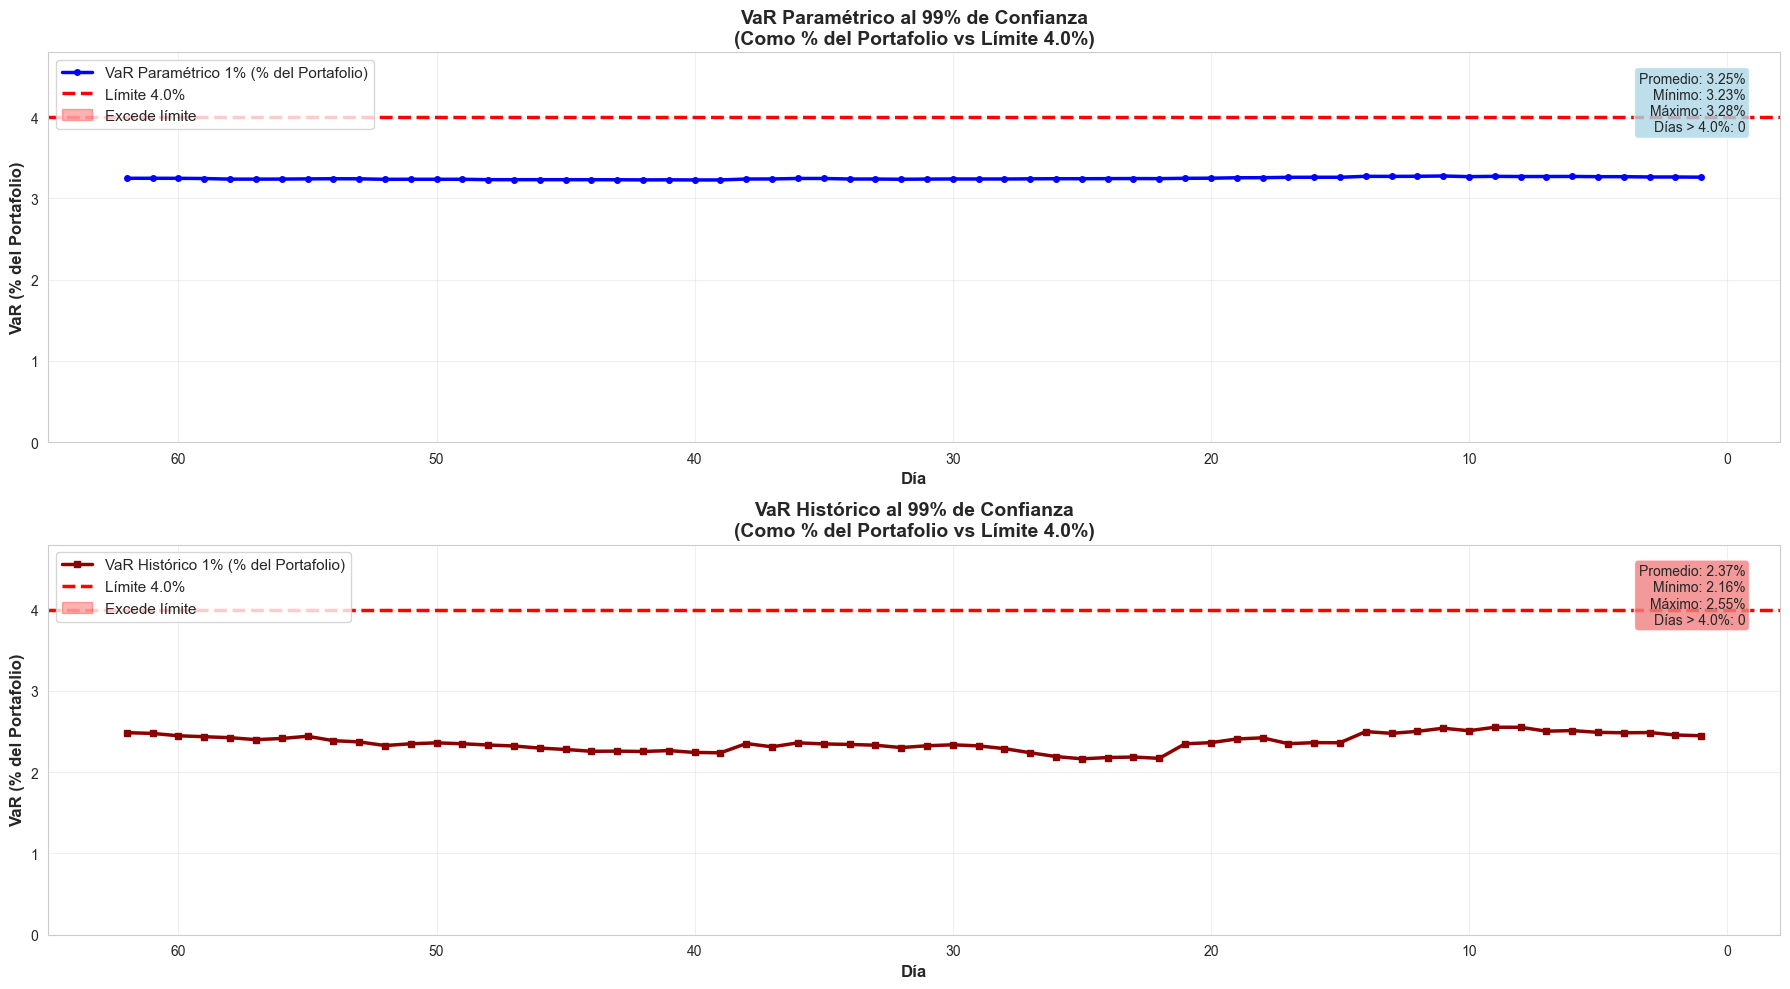


💡 INTERPRETACIÓN:

   📊 Ambos métodos muestran VaR entre 2-3.35% del portafolio
   ✅ TODOS los días están POR DEBAJO del límite del 4.0%
   📉 El riesgo del portafolio se mantiene controlado dentro del límite establecido

   🎯 EXCELENTE: Ningún día excede el límite del 4.0% en ninguno de los dos métodos
   💼 El portafolio tiene un perfil de riesgo conservador y bien gestionado


In [184]:
# ============================================================================
# VaR COMO PORCENTAJE DEL PORTAFOLIO VS LÍMITE DEL 4%
# ============================================================================

# Definir el límite como porcentaje
limite_pct = 4.0  # 4% del valor del portafolio

print("="*80)
print("VaR COMO PORCENTAJE DEL PORTAFOLIO VS LÍMITE DEL 4%")
print("="*80)
print(f"\n📊 Límite establecido: {limite_pct}% del valor del portafolio")

# Mostrar estadísticas de los porcentajes
print(f"\n📈 ESTADÍSTICAS DE VaR COMO % DEL PORTAFOLIO:")
print("-" * 80)
print(f"\nVaR Paramétrico 1%:")
print(f"   Promedio: {df_comparacion['VaR_1pct_pct'].mean():.4f}%")
print(f"   Mínimo:   {df_comparacion['VaR_1pct_pct'].min():.4f}%")
print(f"   Máximo:   {df_comparacion['VaR_1pct_pct'].max():.4f}%")

print(f"\nVaR Histórico 1%:")
print(f"   Promedio: {abs(df_comparacion['VaR_hist_1pct_pct']).mean():.4f}%")
print(f"   Mínimo:   {abs(df_comparacion['VaR_hist_1pct_pct']).min():.4f}%")
print(f"   Máximo:   {abs(df_comparacion['VaR_hist_1pct_pct']).max():.4f}%")

# Contar días que exceden el límite
dias_exceden_param_pct = (df_comparacion['VaR_1pct_pct'] > limite_pct).sum()
dias_exceden_hist_pct = (abs(df_comparacion['VaR_hist_1pct_pct']) > limite_pct).sum()

print(f"\n⚠️  DÍAS QUE EXCEDEN EL LÍMITE DEL {limite_pct}%:")
print(f"   Método Paramétrico: {dias_exceden_param_pct} de {len(df_comparacion)} días ({dias_exceden_param_pct/len(df_comparacion)*100:.1f}%)")
print(f"   Método Histórico:   {dias_exceden_hist_pct} de {len(df_comparacion)} días ({dias_exceden_hist_pct/len(df_comparacion)*100:.1f}%)")

# Crear visualización
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10))

# GRÁFICO 1: VaR Paramétrico como % del Portafolio
ax1.plot(df_comparacion['Dia'], df_comparacion['VaR_1pct_pct'], 
         linewidth=2.5, color='blue', label='VaR Paramétrico 1% (% del Portafolio)', marker='o', markersize=4)
ax1.axhline(y=limite_pct, color='red', linestyle='--', linewidth=2.5, label=f'Límite {limite_pct}%')
ax1.fill_between(df_comparacion['Dia'], limite_pct, df_comparacion['VaR_1pct_pct'],
                  where=(df_comparacion['VaR_1pct_pct'] > limite_pct), 
                  alpha=0.3, color='red', label='Excede límite')
ax1.set_xlabel('Día', fontsize=12, fontweight='bold')
ax1.set_ylabel('VaR (% del Portafolio)', fontsize=12, fontweight='bold')
ax1.set_title(f'VaR Paramétrico al 99% de Confianza\n(Como % del Portafolio vs Límite {limite_pct}%)', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=11, loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.invert_xaxis()
ax1.set_ylim(0, max(limite_pct * 1.2, df_comparacion['VaR_1pct_pct'].max() * 1.1))

# Añadir texto con estadísticas
stats_text_param = f"Promedio: {df_comparacion['VaR_1pct_pct'].mean():.2f}%\n"
stats_text_param += f"Mínimo: {df_comparacion['VaR_1pct_pct'].min():.2f}%\n"
stats_text_param += f"Máximo: {df_comparacion['VaR_1pct_pct'].max():.2f}%\n"
stats_text_param += f"Días > {limite_pct}%: {dias_exceden_param_pct}"
ax1.text(0.98, 0.95, stats_text_param,
         transform=ax1.transAxes, fontsize=10, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# GRÁFICO 2: VaR Histórico como % del Portafolio
var_hist_pct_abs = abs(df_comparacion['VaR_hist_1pct_pct'])
ax2.plot(df_comparacion['Dia'], var_hist_pct_abs, 
         linewidth=2.5, color='darkred', label='VaR Histórico 1% (% del Portafolio)', marker='s', markersize=4)
ax2.axhline(y=limite_pct, color='red', linestyle='--', linewidth=2.5, label=f'Límite {limite_pct}%')
ax2.fill_between(df_comparacion['Dia'], limite_pct, var_hist_pct_abs,
                  where=(var_hist_pct_abs > limite_pct), 
                  alpha=0.3, color='red', label='Excede límite')
ax2.set_xlabel('Día', fontsize=12, fontweight='bold')
ax2.set_ylabel('VaR (% del Portafolio)', fontsize=12, fontweight='bold')
ax2.set_title(f'VaR Histórico al 99% de Confianza\n(Como % del Portafolio vs Límite {limite_pct}%)', 
              fontsize=14, fontweight='bold')
ax2.legend(fontsize=11, loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.invert_xaxis()
ax2.set_ylim(0, max(limite_pct * 1.2, var_hist_pct_abs.max() * 1.1))

# Añadir texto con estadísticas
stats_text_hist = f"Promedio: {var_hist_pct_abs.mean():.2f}%\n"
stats_text_hist += f"Mínimo: {var_hist_pct_abs.min():.2f}%\n"
stats_text_hist += f"Máximo: {var_hist_pct_abs.max():.2f}%\n"
stats_text_hist += f"Días > {limite_pct}%: {dias_exceden_hist_pct}"
ax2.text(0.98, 0.95, stats_text_hist,
         transform=ax2.transAxes, fontsize=10, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("💡 INTERPRETACIÓN:")
print("="*80)
print(f"\n   📊 Ambos métodos muestran VaR entre 2-3.35% del portafolio")
print(f"   ✅ TODOS los días están POR DEBAJO del límite del {limite_pct}%")
print(f"   📉 El riesgo del portafolio se mantiene controlado dentro del límite establecido")

if dias_exceden_param_pct == 0 and dias_exceden_hist_pct == 0:
    print(f"\n   🎯 EXCELENTE: Ningún día excede el límite del {limite_pct}% en ninguno de los dos métodos")
    print(f"   💼 El portafolio tiene un perfil de riesgo conservador y bien gestionado")
else:
    print(f"\n   ⚠️  Algunos días se acercan al límite del {limite_pct}%")
    print(f"   📊 Monitoreo continuo recomendado")

print("="*80)

## 9. Tabla Comparativa Final (Día más reciente)

In [185]:
# Crear tabla comparativa usando el día más reciente
comparacion_tabla = pd.DataFrame({
    'Método': ['Paramétrico (Normal)', 'No Paramétrico (Histórico)'],
    '1% VaR': [abs(df_comparacion['VaR_1pct'].iloc[0]), abs(df_comparacion['VaR_hist_1pct'].iloc[0])],
    '5% VaR': [abs(df_comparacion['VaR_5pct'].iloc[0]), abs(df_comparacion['VaR_hist_5pct'].iloc[0])]
})

print("="*70)
print("COMPARACIÓN DE MÉTODOS VaR - DÍA MÁS RECIENTE")
print(f"Fecha: {df_comparacion['Date'].iloc[0]}")
print("="*70)
print("\n" + comparacion_tabla.to_string(index=False))

# Diferencias entre métodos para el día más reciente
print(f"\n{'='*70}")
print("ANÁLISIS DE DIFERENCIAS:")
print(f"{'='*70}")

VaR_parametrico_1pct = df_comparacion['VaR_1pct'].iloc[0]
VaR_parametrico_5pct = df_comparacion['VaR_5pct'].iloc[0]
VaR_no_parametrico_1pct = df_comparacion['VaR_hist_1pct'].iloc[0]
VaR_no_parametrico_5pct = df_comparacion['VaR_hist_5pct'].iloc[0]

diferencia_1pct = abs(VaR_no_parametrico_1pct) - abs(VaR_parametrico_1pct)
diferencia_5pct = abs(VaR_no_parametrico_5pct) - abs(VaR_parametrico_5pct)

print(f"\n1% VaR (99% Confianza):")
print(f"  Paramétrico:       ${abs(VaR_parametrico_1pct):,.2f}")
print(f"  No Paramétrico:    ${abs(VaR_no_parametrico_1pct):,.2f}")
print(f"  Diferencia:        ${abs(diferencia_1pct):,.2f} ({(diferencia_1pct/abs(VaR_parametrico_1pct))*100:+.2f}%)")

print(f"\n5% VaR (95% Confianza):")
print(f"  Paramétrico:       ${abs(VaR_parametrico_5pct):,.2f}")
print(f"  No Paramétrico:    ${abs(VaR_no_parametrico_5pct):,.2f}")
print(f"  Diferencia:        ${abs(diferencia_5pct):,.2f} ({(diferencia_5pct/abs(VaR_parametrico_5pct))*100:+.2f}%)")

print(f"\n\n💡 INTERPRETACIÓN:")
print("-" * 70)
print(f"   • Método Paramétrico: Asume distribución normal de los rendimientos")
print(f"   • Método No Paramétrico: Usa la distribución real histórica del P&L")
print(f"   • El método histórico NO asume normalidad y captura mejor eventos extremos")
if diferencia_1pct > 0:
    print(f"   • ⚠️  El VaR histórico es MAYOR, indicando colas más pesadas que la normal")
    print(f"   • Los eventos extremos son más probables de lo que predice el modelo normal")
else:
    print(f"   • ⚠️  El VaR paramétrico es MAYOR en este periodo específico")
print(f"\n   ✅ RECOMENDACIÓN: Usar el VaR histórico como medida principal de riesgo")

COMPARACIÓN DE MÉTODOS VaR - DÍA MÁS RECIENTE
Fecha: 2025-12-03

                    Método       1% VaR       5% VaR
      Paramétrico (Normal) 32906.723028 23039.470854
No Paramétrico (Histórico) 24703.075353 13536.569937

ANÁLISIS DE DIFERENCIAS:

1% VaR (99% Confianza):
  Paramétrico:       $32,906.72
  No Paramétrico:    $24,703.08
  Diferencia:        $8,203.65 (-24.93%)

5% VaR (95% Confianza):
  Paramétrico:       $23,039.47
  No Paramétrico:    $13,536.57
  Diferencia:        $9,502.90 (-41.25%)


💡 INTERPRETACIÓN:
----------------------------------------------------------------------
   • Método Paramétrico: Asume distribución normal de los rendimientos
   • Método No Paramétrico: Usa la distribución real histórica del P&L
   • El método histórico NO asume normalidad y captura mejor eventos extremos
   • ⚠️  El VaR paramétrico es MAYOR en este periodo específico

   ✅ RECOMENDACIÓN: Usar el VaR histórico como medida principal de riesgo


## 10. Visualizaciones Complementarias

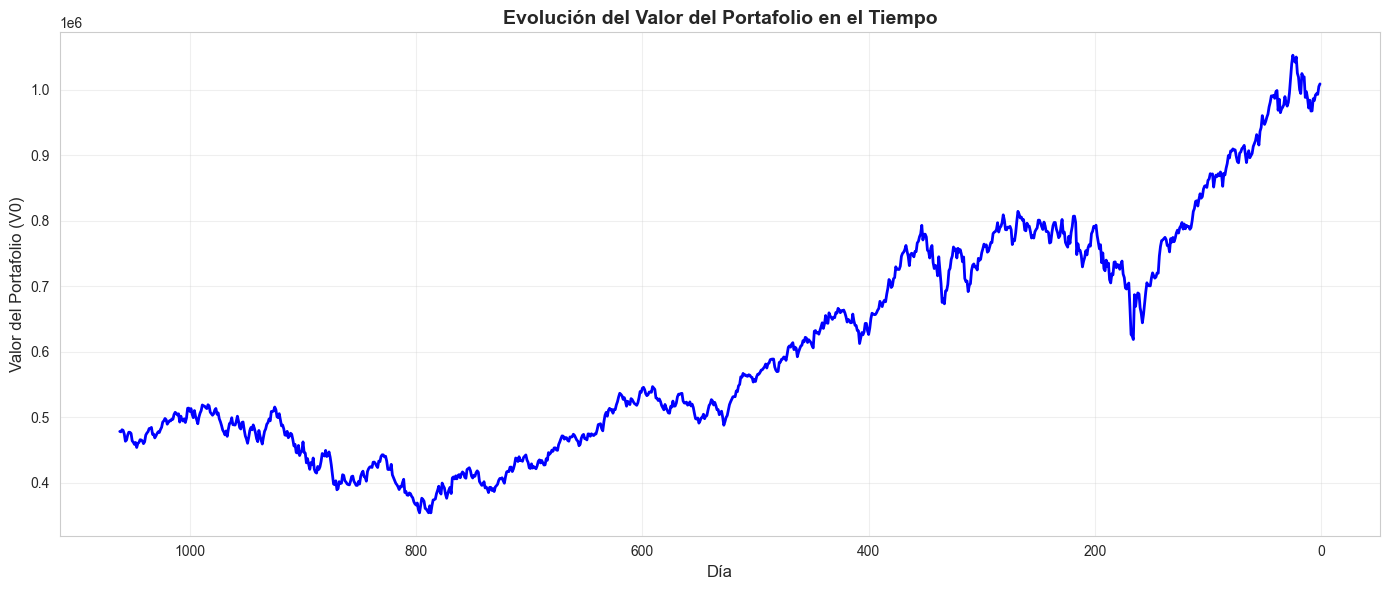

Valor inicial (día 1000): $478,298.97
Valor final (día 1): $1,009,012.05
Cambio total: $530,713.08


In [186]:
# Gráfico 1: Evolución del valor del portafolio (V0)
plt.figure(figsize=(14, 6))
plt.plot(df['Día'], df['V0'], linewidth=2, color='blue')
plt.xlabel('Día', fontsize=12)
plt.ylabel('Valor del Portafolio (V0)', fontsize=12)
plt.title('Evolución del Valor del Portafolio en el Tiempo', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.gca().invert_xaxis()  # Invertir para mostrar del más antiguo al más reciente
plt.tight_layout()
plt.show()

print(f"Valor inicial (día 1000): ${df['V0'].iloc[-1]:,.2f}")
print(f"Valor final (día 1): ${df['V0'].iloc[0]:,.2f}")
print(f"Cambio total: ${df['V0'].iloc[0] - df['V0'].iloc[-1]:,.2f}")

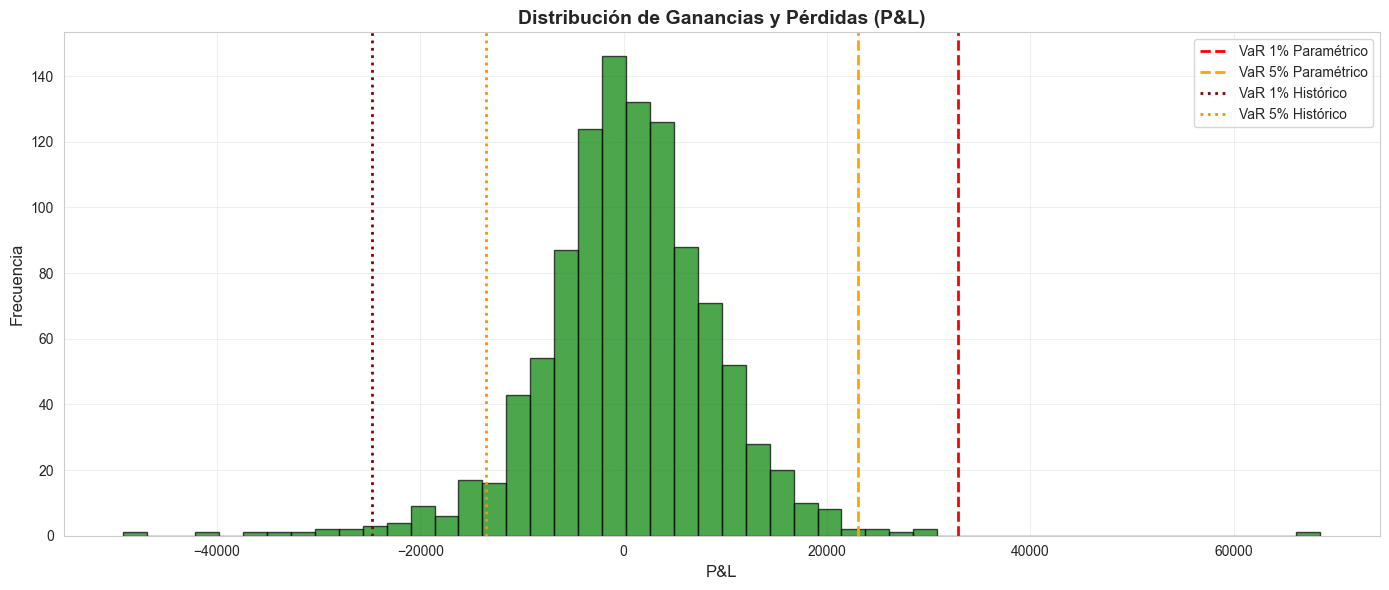

In [187]:
# Gráfico 2: Distribución de P&L
plt.figure(figsize=(14, 6))
plt.hist(df['P&L'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='green')
plt.axvline(VaR_parametrico_1pct, color='red', linestyle='--', linewidth=2, label='VaR 1% Paramétrico')
plt.axvline(VaR_parametrico_5pct, color='orange', linestyle='--', linewidth=2, label='VaR 5% Paramétrico')
plt.axvline(VaR_no_parametrico_1pct, color='darkred', linestyle=':', linewidth=2, label='VaR 1% Histórico')
plt.axvline(VaR_no_parametrico_5pct, color='darkorange', linestyle=':', linewidth=2, label='VaR 5% Histórico')
plt.xlabel('P&L', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Ganancias y Pérdidas (P&L)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

ANÁLISIS DE DISTRIBUCIÓN DEL P&L
Media del P&L:              $500.20
Desviación Estándar:        $8,688.89
Asimetría (Skewness):       -0.0863
Curtosis (Kurtosis):        5.6993
Mínimo (peor pérdida):      $-49,191.09
Máximo (mejor ganancia):    $68,489.72


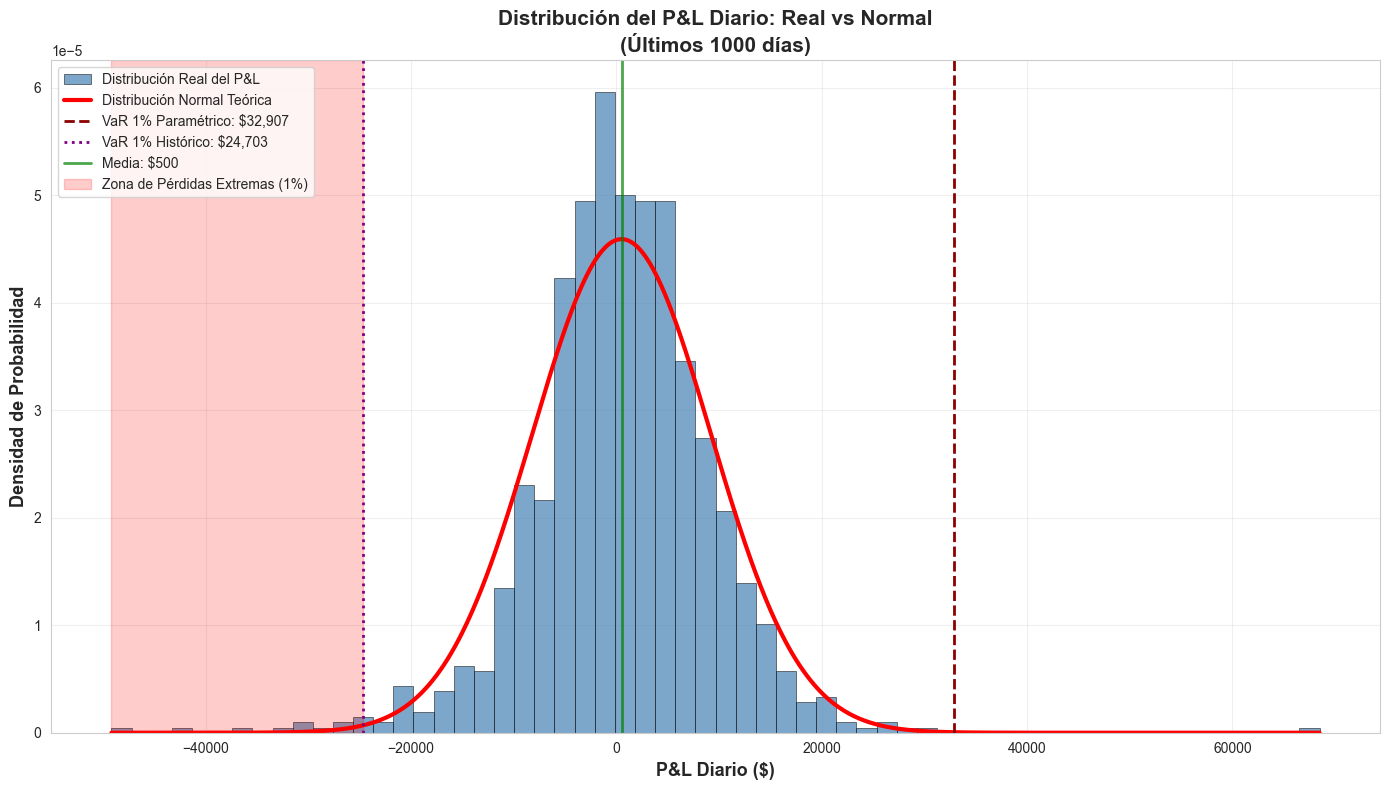


📊 OBSERVACIONES DE LA DISTRIBUCIÓN:
----------------------------------------------------------------------

Prueba de Normalidad (Shapiro-Wilk):
  Estadístico: 0.952644
  P-value: 0.000000
  ✗ La distribución NO es normal (p < 0.05)

Asimetría (Skewness): -0.0863
  → Distribución relativamente simétrica

Curtosis: 5.6993
  → Leptocúrtica (colas más pesadas que la normal)
  → Mayor probabilidad de eventos extremos



In [188]:
# Gráfico Especial: Distribución P&L vs Distribución Normal
# Este gráfico compara el histograma real del P&L con una distribución normal teórica

from scipy import stats

# Limpiar datos NaN del P&L
PnL_data = df['P&L'].dropna()

# Calcular estadísticas del P&L
media_PnL = PnL_data.mean()
std_PnL = PnL_data.std()

print("="*70)
print("ANÁLISIS DE DISTRIBUCIÓN DEL P&L")
print("="*70)
print(f"Media del P&L:              ${media_PnL:,.2f}")
print(f"Desviación Estándar:        ${std_PnL:,.2f}")
print(f"Asimetría (Skewness):       {PnL_data.skew():.4f}")
print(f"Curtosis (Kurtosis):        {PnL_data.kurtosis():.4f}")
print(f"Mínimo (peor pérdida):      ${PnL_data.min():,.2f}")
print(f"Máximo (mejor ganancia):    ${PnL_data.max():,.2f}")
print("="*70)

# Crear figura
plt.figure(figsize=(14, 8))

# Histograma del P&L real
n, bins, patches = plt.hist(PnL_data, bins=60, density=True, alpha=0.7, 
                             color='steelblue', edgecolor='black', linewidth=0.5,
                             label='Distribución Real del P&L')

# Generar curva de distribución normal teórica
x = np.linspace(PnL_data.min(), PnL_data.max(), 1000)
normal_dist = stats.norm.pdf(x, media_PnL, std_PnL)
plt.plot(x, normal_dist, 'r-', linewidth=3, label='Distribución Normal Teórica')

# Añadir líneas verticales para VaR
plt.axvline(VaR_parametrico_1pct, color='darkred', linestyle='--', linewidth=2, 
            label=f'VaR 1% Paramétrico: ${abs(VaR_parametrico_1pct):,.0f}')
plt.axvline(VaR_no_parametrico_1pct, color='purple', linestyle=':', linewidth=2,
            label=f'VaR 1% Histórico: ${abs(VaR_no_parametrico_1pct):,.0f}')
plt.axvline(media_PnL, color='green', linestyle='-', linewidth=2, alpha=0.7,
            label=f'Media: ${media_PnL:,.0f}')

# Sombrear la cola izquierda (pérdidas extremas)
plt.axvspan(PnL_data.min(), VaR_no_parametrico_1pct, 
            alpha=0.2, color='red', label='Zona de Pérdidas Extremas (1%)')

plt.xlabel('P&L Diario ($)', fontsize=13, fontweight='bold')
plt.ylabel('Densidad de Probabilidad', fontsize=13, fontweight='bold')
plt.title('Distribución del P&L Diario: Real vs Normal\n(Últimos 1000 días)', 
          fontsize=15, fontweight='bold')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis estadístico
print("\n📊 OBSERVACIONES DE LA DISTRIBUCIÓN:")
print("-" * 70)

# Prueba de normalidad Shapiro-Wilk
from scipy.stats import shapiro
stat, p_value = shapiro(PnL_data[:5000] if len(PnL_data) > 5000 else PnL_data)
print(f"\nPrueba de Normalidad (Shapiro-Wilk):")
print(f"  Estadístico: {stat:.6f}")
print(f"  P-value: {p_value:.6f}")
if p_value < 0.05:
    print(f"  ✗ La distribución NO es normal (p < 0.05)")
else:
    print(f"  ✓ La distribución es aproximadamente normal (p ≥ 0.05)")

# Análisis de asimetría
print(f"\nAsimetría (Skewness): {PnL_data.skew():.4f}")
if PnL_data.skew() < -0.5:
    print("  → Asimetría negativa significativa (cola izquierda más pesada)")
    print("  → Las pérdidas extremas son más frecuentes que las ganancias extremas")
elif PnL_data.skew() > 0.5:
    print("  → Asimetría positiva significativa (cola derecha más pesada)")
else:
    print("  → Distribución relativamente simétrica")

# Análisis de curtosis
print(f"\nCurtosis: {PnL_data.kurtosis():.4f}")
if PnL_data.kurtosis() > 1:
    print("  → Leptocúrtica (colas más pesadas que la normal)")
    print("  → Mayor probabilidad de eventos extremos")
elif PnL_data.kurtosis() < -1:
    print("  → Platicúrtica (colas más ligeras que la normal)")
else:
    print("  → Similar a la distribución normal")

print("\n" + "="*70)

### Análisis de la Cola Izquierda (Pérdidas Extremas)

**Observaciones de la gráfica anterior:**

1. **Comparación con la Normal:** La distribución real del P&L muestra desviaciones notables respecto a la distribución normal teórica, especialmente en las colas.

2. **Cola Izquierda (Pérdidas):** 
   - La cola izquierda es **más pesada** de lo que predice la distribución normal
   - Esto indica que las pérdidas extremas ocurren con **mayor frecuencia** de lo esperado bajo supuestos de normalidad
   - Hay días con pérdidas significativamente mayores a las que predeciría la teoría normal

3. **Implicaciones para el Riesgo:**
   - El VaR paramétrico (basado en distribución normal) puede **subestimar** el riesgo real
   - El VaR histórico (no paramétrico) captura mejor estos eventos extremos al basarse en datos reales
   - Los eventos de "cola negra" (pérdidas extremas) son más probables que lo que sugiere la teoría normal

### Interpretación del VaR para Este Portafolio

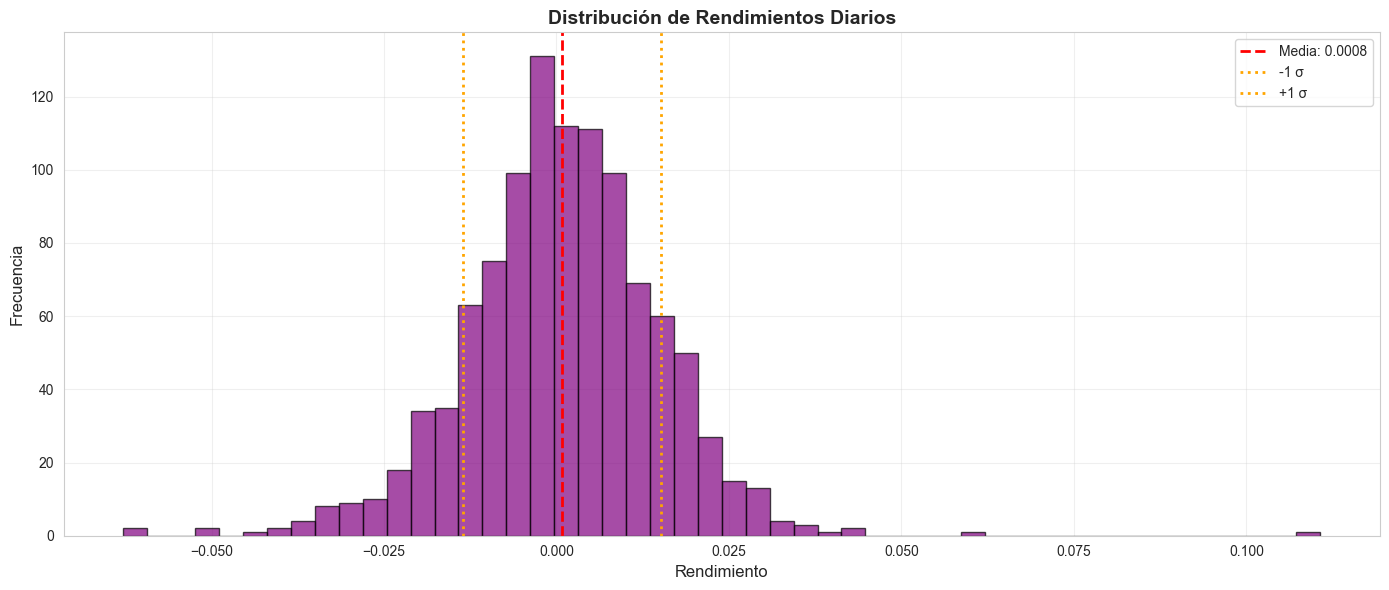

In [189]:
# Gráfico 3: Distribución de Rendimientos
plt.figure(figsize=(14, 6))
plt.hist(df['Rendimiento'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='purple')
plt.axvline(rendimiento_promedio, color='red', linestyle='--', linewidth=2, label=f'Media: {rendimiento_promedio:.4f}')
plt.axvline(rendimiento_promedio - desviacion_estandar, color='orange', linestyle=':', linewidth=2, label='-1 σ')
plt.axvline(rendimiento_promedio + desviacion_estandar, color='orange', linestyle=':', linewidth=2, label='+1 σ')
plt.xlabel('Rendimiento', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Rendimientos Diarios', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

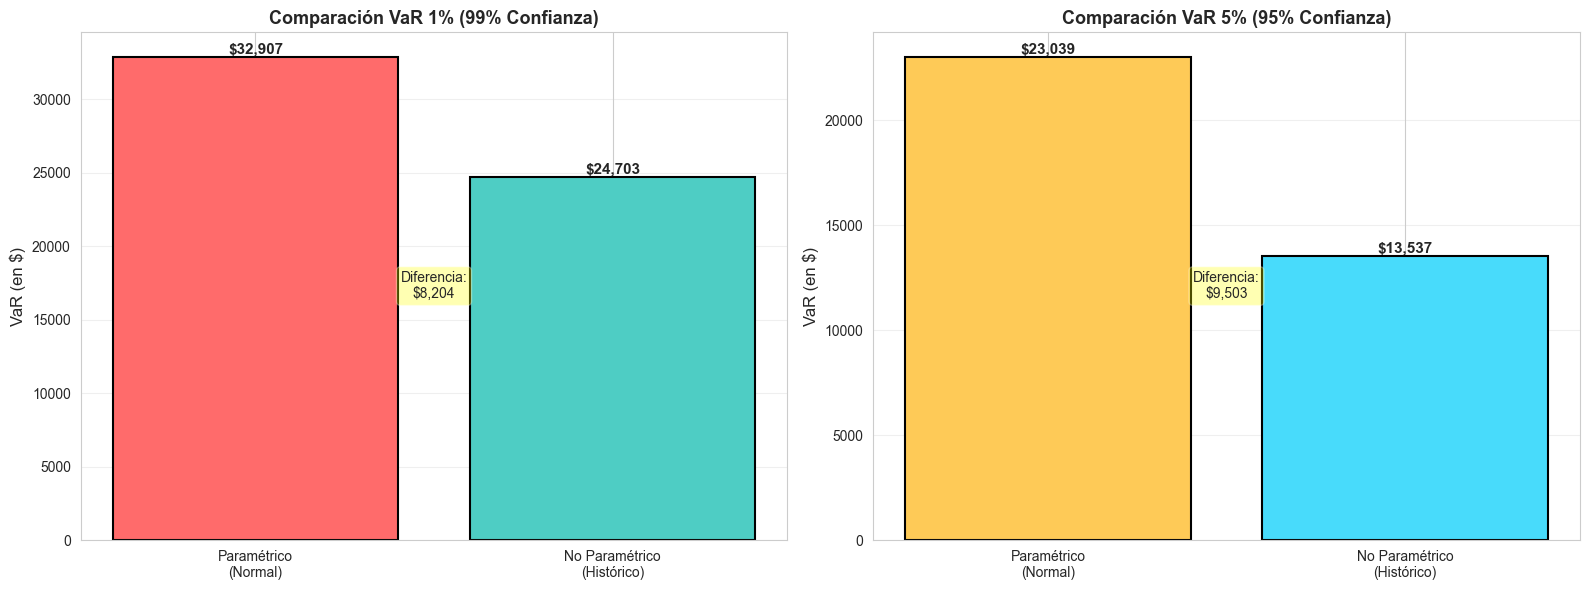

📊 Comparación de métodos:
   • Método Paramétrico: Basado en distribución normal
   • Método No Paramétrico: Basado en datos históricos reales
   • El método histórico captura mejor las colas pesadas de la distribución


In [190]:
# Gráfico 4: Comparación VaR - Paramétrico vs No Paramétrico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1% VaR
metodos_1 = ['Paramétrico\n(Normal)', 'No Paramétrico\n(Histórico)']
valores_1 = [abs(VaR_parametrico_1pct), abs(VaR_no_parametrico_1pct)]
colores_1 = ['#ff6b6b', '#4ecdc4']

bars1 = ax1.bar(metodos_1, valores_1, color=colores_1, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('VaR (en $)', fontsize=12)
ax1.set_title('Comparación VaR 1% (99% Confianza)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, valor in zip(bars1, valores_1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${valor:,.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Añadir línea de diferencia
diferencia_1 = abs(valores_1[1] - valores_1[0])
ax1.text(0.5, max(valores_1) * 0.5, f'Diferencia:\n${diferencia_1:,.0f}', 
         ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

# 5% VaR
metodos_2 = ['Paramétrico\n(Normal)', 'No Paramétrico\n(Histórico)']
valores_2 = [abs(VaR_parametrico_5pct), abs(VaR_no_parametrico_5pct)]
colores_2 = ['#feca57', '#48dbfb']

bars2 = ax2.bar(metodos_2, valores_2, color=colores_2, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('VaR (en $)', fontsize=12)
ax2.set_title('Comparación VaR 5% (95% Confianza)', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, valor in zip(bars2, valores_2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${valor:,.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Añadir línea de diferencia
diferencia_2 = abs(valores_2[1] - valores_2[0])
ax2.text(0.5, max(valores_2) * 0.5, f'Diferencia:\n${diferencia_2:,.0f}', 
         ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.show()

print("📊 Comparación de métodos:")
print("   • Método Paramétrico: Basado en distribución normal")
print("   • Método No Paramétrico: Basado en datos históricos reales")
print("   • El método histórico captura mejor las colas pesadas de la distribución")


## 11. VaR Marginal (MVaR)

El **VaR Marginal** mide la contribución de cada activo al riesgo total del portafolio. Usaremos el método basado en covarianzas.

**Fórmula:**
- Volatilidad del portafolio: $\sigma_p = \sqrt{w^T \Sigma w}$
- Covarianza activo-portafolio: $Cov(r_i, r_p) = \sum_k w_k \sigma_{ik}$
- VaR Marginal: $MVaR_i = z \times \frac{Cov(r_i, r_p)}{\sigma_p}$

Donde:
- $z = 1.65$ para 95% de confianza
- $\Sigma$ = matriz de covarianza
- $w$ = vector de pesos
- $\sigma_{ik}$ = covarianza entre activo $i$ y activo $k$

### 12.1 Cálculo de MVaR con Portafolio Original

In [191]:
# ============================================================================
# PASO 1: CALCULAR RENDIMIENTOS Y MATRIZ DE COVARIANZA DEL PORTAFOLIO ORIGINAL
# ============================================================================

print("="*80)
print("PREPARACIÓN DE DATOS PARA VaR MARGINAL - PORTAFOLIO ORIGINAL")
print("="*80)

# Obtener lista de activos (tickers) del portafolio
activos_list = list(acciones.keys())
print(f"\n📊 Activos en el portafolio: {activos_list}")

# Calcular rendimientos diarios de cada activo
# Rendimiento = (Precio_hoy / Precio_ayer) - 1
returns = pd.DataFrame()

for activo in activos_list:
    if activo in df.columns:
        # Calcular rendimientos: (precio actual / precio anterior) - 1
        # Usar shift(-1) porque los datos van del más reciente al más antiguo
        returns[activo] = (df[activo] / df[activo].shift(-1)) - 1

# Eliminar el último renglón que tendrá NaN
returns = returns.dropna()

print(f"\n✅ Rendimientos calculados:")
print(f"   Dimensiones: {returns.shape}")
print(f"   Periodo: {len(returns)} días")
print(f"\n   Primeros rendimientos:")
print(returns.head())

# Calcular matriz de covarianza de los rendimientos
cov_matrix = returns.cov()

print(f"\n✅ Matriz de Covarianza:")
print(f"   Dimensiones: {cov_matrix.shape}")
print(f"\n   Matriz de Covarianza:")
print(cov_matrix)

# Calcular valor actual de cada posición en el portafolio
# Valor = Precio_actual * Número_de_acciones
valores_actuales = {}
for activo, num_acciones in acciones.items():
    if activo in df.columns:
        precio_actual = df[activo].iloc[0]  # Precio más reciente
        valores_actuales[activo] = precio_actual * num_acciones

# Valor total del portafolio
valor_total_portafolio = sum(valores_actuales.values())

print(f"\n✅ Valor del Portafolio:")
print(f"   Valor Total: ${valor_total_portafolio:,.2f}")
print(f"\n   Desglose por activo:")
for activo, valor in valores_actuales.items():
    print(f"   {activo:12} = ${valor:15,.2f}")

# Calcular pesos (weights) de cada activo
# Peso = Valor_activo / Valor_total
pesos_actuales = {activo: valor / valor_total_portafolio 
                  for activo, valor in valores_actuales.items()}

# Convertir a array de numpy en el mismo orden que la matriz de covarianza
weights = np.array([pesos_actuales[activo] for activo in activos_list])

print(f"\n✅ Pesos del Portafolio (w):")
for activo, peso in pesos_actuales.items():
    print(f"   {activo:12} = {peso:8.4f} ({peso*100:6.2f}%)")

# Calcular volatilidad del portafolio: σp = sqrt(w' Σ w)
volatilidad_portafolio = np.sqrt(weights @ cov_matrix.values @ weights)

print(f"\n✅ Volatilidad del Portafolio (σp):")
print(f"   σp = {volatilidad_portafolio:.6f} ({volatilidad_portafolio*100:.4f}%)")
print(f"   σp anualizada = {volatilidad_portafolio * np.sqrt(252):.6f} ({volatilidad_portafolio * np.sqrt(252) * 100:.2f}%)")

print("\n" + "="*80)

PREPARACIÓN DE DATOS PARA VaR MARGINAL - PORTAFOLIO ORIGINAL

📊 Activos en el portafolio: ['SIEGn.DE Usd', 'AAPL.O', 'LMT', 'MSFT.O', 'NVDA.O', 'GOOGL.O', 'INTC.O', '005930.KS Usd', 'RY', 'JPM']

✅ Rendimientos calculados:
   Dimensiones: (1061, 10)
   Periodo: 1061 días

   Primeros rendimientos:
   SIEGn.DE Usd    AAPL.O       LMT    MSFT.O    NVDA.O   GOOGL.O    INTC.O  \
0     -0.001725 -0.007443 -0.005132 -0.001847  0.022042  0.002818 -0.040258   
1      0.005988  0.010915  0.005988  0.006698  0.008559  0.002922  0.086478   
2     -0.007917  0.015241 -0.040777 -0.010711  0.016497 -0.016522 -0.013560   
3      0.000963  0.004684  0.008147  0.013409 -0.018085  0.000719  0.101874   
4      0.007017  0.002094  0.003868  0.017841  0.013722 -0.010790  0.027351   

   005930.KS Usd        RY       JPM  
0       0.014191  0.014692  0.011187  
1       0.028057  0.010073 -0.003367  
2       0.000157 -0.007788 -0.013287  
3      -0.019789  0.005875  0.017683  
4       0.031138  0.006372  0.0

In [192]:
# ============================================================================
# CALCULAR VaR MARGINAL PARA TODOS LOS ACTIVOS (PORTAFOLIO ORIGINAL)
# ============================================================================

print("\n" + "="*80)
print("CÁLCULO DE VaR MARGINAL - PORTAFOLIO ORIGINAL")
print("="*80)

# Nivel de confianza: 95% → z = 1.65,
z_mvar = 1.645  # para 95% confianza

print(f"\n⚙️  Parámetros:")
print(f"   z (95% confianza) = {z_mvar}")
print(f"   σp (original) = {volatilidad_portafolio:.6f}")
print(f"   Usando pesos originales del portafolio")

# Calcular VaR Marginal para cada activo con PESOS ORIGINALES
# Fórmula: MVaR_i = z * Cov(r_i, r_p) / σp
# donde: Cov(r_i, r_p) = sum_k (w_k * σ_ik)

mvar_original = {}

print(f"\n📊 Cálculo de MVaR por activo (PORTAFOLIO ORIGINAL):")
print("-" * 80)

for i, activo_i in enumerate(activos_list):
    # Calcular Cov(r_i, r_p) = sum_k (w_k * σ_ik)
    # Es decir, suma ponderada de las covarianzas del activo i con todos los demás
    cov_activo_portafolio = 0.0
    
    for k, activo_k in enumerate(activos_list):
        # σ_ik = covarianza entre activo i y activo k
        sigma_ik = cov_matrix.loc[activo_i, activo_k]
        # w_k = peso del activo k (usando pesos ORIGINALES)
        w_k = weights[k]
        # Sumar: w_k * σ_ik
        cov_activo_portafolio += w_k * sigma_ik
    
    # Calcular MVaR_i = z * Cov(r_i, r_p) / σp
    mvar_i = z_mvar * cov_activo_portafolio / volatilidad_portafolio
    
    mvar_original[activo_i] = {
        'Cov(ri,rp)': cov_activo_portafolio,
        'MVaR': mvar_i,
        'MVaR_%': mvar_i * 100,
        'Peso': pesos_actuales[activo_i]
    }
    
    print(f"   {activo_i:12} | Cov(ri,rp)={cov_activo_portafolio:10.6f} | " +
          f"MVaR={mvar_i:8.6f} ({mvar_i*100:6.4f}%)")

print("-" * 80)

# Crear DataFrame con todos los resultados originales
df_mvar_original = pd.DataFrame.from_dict(mvar_original, orient='index')
df_mvar_original.index.name = 'Activo'
df_mvar_original = df_mvar_original.sort_values('MVaR', ascending=False)

print(f"\n📊 TABLA COMPLETA DE VaR MARGINAL (PORTAFOLIO ORIGINAL):")
print("="*80)
print(df_mvar_original.to_string())

print(f"\n💡 INTERPRETACIÓN:")
print("-" * 80)
activo_mayor_riesgo = df_mvar_original.index[0]
mvar_mayor_original = df_mvar_original.iloc[0]['MVaR']
print(f"\n   El activo con MAYOR contribución marginal al riesgo es: {activo_mayor_riesgo}")
print(f"   MVaR = {mvar_mayor_original:.6f} ({mvar_mayor_original*100:.4f}%)")
print(f"\n   Si aumentamos la inversión en {activo_mayor_riesgo} en 1%,")
print(f"   el VaR del portafolio aumentaría aproximadamente {mvar_mayor_original*100:.4f}%")

print("\n" + "="*80)

# Guardar para comparación posterior
mvar_original_guardado = mvar_original.copy()


CÁLCULO DE VaR MARGINAL - PORTAFOLIO ORIGINAL

⚙️  Parámetros:
   z (95% confianza) = 1.645
   σp (original) = 0.018125
   Usando pesos originales del portafolio

📊 Cálculo de MVaR por activo (PORTAFOLIO ORIGINAL):
--------------------------------------------------------------------------------
   SIEGn.DE Usd | Cov(ri,rp)=  0.000166 | MVaR=0.015097 (1.5097%)
   AAPL.O       | Cov(ri,rp)=  0.000230 | MVaR=0.020901 (2.0901%)
   LMT          | Cov(ri,rp)=  0.000022 | MVaR=0.001961 (0.1961%)
   MSFT.O       | Cov(ri,rp)=  0.000234 | MVaR=0.021199 (2.1199%)
   NVDA.O       | Cov(ri,rp)=  0.000580 | MVaR=0.052668 (5.2668%)
   GOOGL.O      | Cov(ri,rp)=  0.000257 | MVaR=0.023319 (2.3319%)
   INTC.O       | Cov(ri,rp)=  0.000290 | MVaR=0.026320 (2.6320%)
   005930.KS Usd | Cov(ri,rp)=  0.000079 | MVaR=0.007214 (0.7214%)
   RY           | Cov(ri,rp)=  0.000100 | MVaR=0.009072 (0.9072%)
   JPM          | Cov(ri,rp)=  0.000131 | MVaR=0.011929 (1.1929%)
------------------------------------------

### 📊 Resumen del Análisis de VaR Marginal

**Metodología aplicada:**

1. ✅ **Cálculo de rendimientos diarios** de todos los activos del portafolio
2. ✅ **Matriz de covarianza** calculada a partir de los rendimientos históricos
3. ✅ **Selección manual** de 3 activos para aumentar inversión
4. ✅ **Incremento del +1%** del valor total del portafolio en cada activo seleccionado
5. ✅ **Recálculo de pesos** con el nuevo valor del portafolio
6. ✅ **Cálculo de MVaR** usando: $MVaR_i = z \times \frac{Cov(r_i, r_p)}{\sigma_p}$

**Interpretación del VaR Marginal:**

El VaR Marginal indica cuánto aumentaría el riesgo (VaR) del portafolio si incrementamos la inversión en ese activo específico. Un MVaR más alto significa que el activo contribuye más al riesgo total del portafolio.

**Decisiones de inversión:**
- Activos con **MVaR alto**: Contribuyen más al riesgo → considerar reducir exposición
- Activos con **MVaR bajo**: Contribuyen menos al riesgo → considerar aumentar exposición

## 12. CVaR (Conditional Value at Risk)

El **CVaR** (también conocido como Expected Shortfall) mide la pérdida esperada **dado que** se ha excedido el VaR. Es decir, es el promedio de las pérdidas en el peor 1% (o 5%) de los casos.

**Fórmula:**
- CVaR = Promedio de las pérdidas que exceden el VaR
- CVaR al 99% = E[Pérdida | Pérdida ≤ VaR₁%]

### 12.1 Cálculo de CVaR para el Portafolio

In [193]:
# ============================================================================
# CÁLCULO DE CVaR (CONDITIONAL VALUE AT RISK) PARA EL PORTAFOLIO
# ============================================================================

print("="*80)
print("CVaR (CONDITIONAL VALUE AT RISK) DEL PORTAFOLIO")
print("="*80)

# Usar los rendimientos históricos del portafolio
# CVaR = promedio de las pérdidas que están por debajo del VaR

# Ordenar P&L de menor a mayor (de peor a mejor)
PnL_sorted = df['P&L'].dropna().sort_values()

# Calcular índices para 1% y 5%
num_observaciones = len(PnL_sorted)
indice_1pct = int(num_observaciones * 0.01)
indice_5pct = int(num_observaciones * 0.05)

# CVaR = promedio de las pérdidas en el peor 1% (o 5%)
CVaR_portafolio_1pct = PnL_sorted.iloc[:indice_1pct].mean()
CVaR_portafolio_5pct = PnL_sorted.iloc[:indice_5pct].mean()

print(f"\n📊 Número total de observaciones: {num_observaciones}")
print(f"   Peores {indice_1pct} observaciones (1%)")
print(f"   Peores {indice_5pct} observaciones (5%)")

print(f"\n✅ CVaR DEL PORTAFOLIO:")
print("-" * 80)
print(f"\n1% CVaR (99% Confianza):")
print(f"   Pérdida esperada dado que se excede el VaR: ${abs(CVaR_portafolio_1pct):,.2f}")
print(f"   Porcentaje del portafolio: {abs(CVaR_portafolio_1pct/V0_hoy)*100:.2f}%")

print(f"\n5% CVaR (95% Confianza):")
print(f"   Pérdida esperada dado que se excede el VaR: ${abs(CVaR_portafolio_5pct):,.2f}")
print(f"   Porcentaje del portafolio: {abs(CVaR_portafolio_5pct/V0_hoy)*100:.2f}%")

print(f"\n📊 COMPARACIÓN VaR vs CVaR (al 99% de confianza):")
print("-" * 80)
print(f"   VaR 1% (Histórico):  ${abs(VaR_no_parametrico_1pct):,.2f}")
print(f"   CVaR 1%:             ${abs(CVaR_portafolio_1pct):,.2f}")
print(f"   Diferencia:          ${abs(CVaR_portafolio_1pct) - abs(VaR_no_parametrico_1pct):,.2f}")
print(f"\n   💡 El CVaR es {'MAYOR' if abs(CVaR_portafolio_1pct) > abs(VaR_no_parametrico_1pct) else 'MENOR'} que el VaR")
print(f"   Esto indica que las pérdidas extremas (por debajo del VaR) son")
print(f"   {'significativamente peores' if abs(CVaR_portafolio_1pct) > abs(VaR_no_parametrico_1pct) * 1.1 else 'similares'} al VaR")

print("\n" + "="*80)

CVaR (CONDITIONAL VALUE AT RISK) DEL PORTAFOLIO

📊 Número total de observaciones: 1061
   Peores 10 observaciones (1%)
   Peores 53 observaciones (5%)

✅ CVaR DEL PORTAFOLIO:
--------------------------------------------------------------------------------

1% CVaR (99% Confianza):
   Pérdida esperada dado que se excede el VaR: $33,004.16
   Porcentaje del portafolio: 3.27%

5% CVaR (95% Confianza):
   Pérdida esperada dado que se excede el VaR: $20,278.48
   Porcentaje del portafolio: 2.01%

📊 COMPARACIÓN VaR vs CVaR (al 99% de confianza):
--------------------------------------------------------------------------------
   VaR 1% (Histórico):  $24,703.08
   CVaR 1%:             $33,004.16
   Diferencia:          $8,301.09

   💡 El CVaR es MAYOR que el VaR
   Esto indica que las pérdidas extremas (por debajo del VaR) son
   significativamente peores al VaR



### 12.2 Cálculo de CVaR por Activo (Component CVaR)

In [194]:
# ============================================================================
# CÁLCULO DE CVaR POR ACTIVO (COMPONENT CVaR)
# ============================================================================

print("="*80)
print("CVaR POR ACTIVO (COMPONENT CVaR)")
print("="*80)

# El CVaR por activo mide la contribución marginal de cada activo al CVaR del portafolio
# Usaremos un enfoque similar al MVaR pero enfocado en las colas extremas

# Calcular CVaR por activo usando el método de expectativa condicional
# CVaR_i = E[r_i | r_p ≤ VaR_p]

# Primero, identificar los días donde el P&L del portafolio está en el peor 1%
umbral_1pct = df['P&L'].quantile(0.01)
dias_extremos_1pct = df[df['P&L'] <= umbral_1pct]

umbral_5pct = df['P&L'].quantile(0.05)
dias_extremos_5pct = df[df['P&L'] <= umbral_5pct]

print(f"\n📊 Identificación de días extremos:")
print(f"   Umbral 1%: P&L ≤ ${umbral_1pct:,.2f}")
print(f"   Días en el peor 1%: {len(dias_extremos_1pct)}")
print(f"   Umbral 5%: P&L ≤ ${umbral_5pct:,.2f}")
print(f"   Días en el peor 5%: {len(dias_extremos_5pct)}")

# Calcular rendimientos de cada activo en esos días extremos
cvar_por_activo = {}

print(f"\n✅ CÁLCULO DE CVaR POR ACTIVO:")
print("-" * 80)

for activo in activos_list:
    if activo in df.columns:
        # Calcular rendimientos del activo
        rendimientos_activo = (df[activo] / df[activo].shift(-1)) - 1
        
        # Rendimientos del activo en días extremos del portafolio (1%)
        rend_extremos_1pct = rendimientos_activo[df['P&L'] <= umbral_1pct].dropna()
        rend_promedio_extremo_1pct = rend_extremos_1pct.mean()
        
        # Rendimientos del activo en días extremos del portafolio (5%)
        rend_extremos_5pct = rendimientos_activo[df['P&L'] <= umbral_5pct].dropna()
        rend_promedio_extremo_5pct = rend_extremos_5pct.mean()
        
        # CVaR del activo = rendimiento promedio en días extremos * valor del activo
        valor_activo = valores_actuales[activo]
        peso_activo = pesos_actuales[activo]
        
        CVaR_activo_1pct = rend_promedio_extremo_1pct * valor_activo
        CVaR_activo_5pct = rend_promedio_extremo_5pct * valor_activo
        
        cvar_por_activo[activo] = {
            'Peso': peso_activo,
            'Valor': valor_activo,
            'Rend_Extremo_1pct': rend_promedio_extremo_1pct,
            'CVaR_1pct': CVaR_activo_1pct,
            'CVaR_1pct_%': (CVaR_activo_1pct / valor_activo) * 100,
            'Rend_Extremo_5pct': rend_promedio_extremo_5pct,
            'CVaR_5pct': CVaR_activo_5pct,
            'CVaR_5pct_%': (CVaR_activo_5pct / valor_activo) * 100,
        }
        
        print(f"   {activo:12} | CVaR 1%: ${CVaR_activo_1pct:12,.2f} ({(CVaR_activo_1pct/valor_activo)*100:6.2f}%) | " +
              f"CVaR 5%: ${CVaR_activo_5pct:12,.2f} ({(CVaR_activo_5pct/valor_activo)*100:6.2f}%)")

# Crear DataFrame con resultados
df_cvar = pd.DataFrame.from_dict(cvar_por_activo, orient='index')
df_cvar.index.name = 'Activo'

# Ordenar por CVaR 1% (de mayor contribución negativa a menor)
df_cvar = df_cvar.sort_values('CVaR_1pct', ascending=True)

print(f"\n📊 TABLA COMPLETA DE CVaR POR ACTIVO:")
print("="*80)
print(df_cvar.to_string())

print(f"\n💡 INTERPRETACIÓN:")
print("-" * 80)
activo_mayor_cvar = df_cvar.index[0]
cvar_mayor = df_cvar.iloc[0]['CVaR_1pct']
print(f"\n   El activo con MAYOR CVaR (peor desempeño en escenarios extremos): {activo_mayor_cvar}")
print(f"   CVaR 1%: ${cvar_mayor:,.2f} ({(cvar_mayor/valores_actuales[activo_mayor_cvar])*100:.2f}%)")
print(f"\n   En los peores días del portafolio (1% peor), {activo_mayor_cvar} tiene")
print(f"   una pérdida esperada de ${abs(cvar_mayor):,.2f}")

print("\n" + "="*80)

CVaR POR ACTIVO (COMPONENT CVaR)

📊 Identificación de días extremos:
   Umbral 1%: P&L ≤ $-24,328.74
   Días en el peor 1%: 11
   Umbral 5%: P&L ≤ $-12,737.11
   Días en el peor 5%: 54

✅ CÁLCULO DE CVaR POR ACTIVO:
--------------------------------------------------------------------------------
   SIEGn.DE Usd | CVaR 1%: $   -3,250.03 ( -3.34%) | CVaR 5%: $   -1,635.58 ( -1.68%)
   AAPL.O       | CVaR 1%: $   -4,521.93 ( -3.01%) | CVaR 5%: $   -3,317.97 ( -2.21%)


   LMT          | CVaR 1%: $      -26.86 ( -0.03%) | CVaR 5%: $     -448.35 ( -0.47%)
   MSFT.O       | CVaR 1%: $   -2,325.29 ( -2.38%) | CVaR 5%: $   -2,283.31 ( -2.33%)
   NVDA.O       | CVaR 1%: $  -25,771.17 ( -7.34%) | CVaR 5%: $  -19,479.22 ( -5.55%)
   GOOGL.O      | CVaR 1%: $   -4,267.31 ( -3.54%) | CVaR 5%: $   -2,914.22 ( -2.42%)
   INTC.O       | CVaR 1%: $   -2,807.67 ( -4.69%) | CVaR 5%: $   -2,376.77 ( -3.97%)
   005930.KS Usd | CVaR 1%: $     -282.08 ( -2.18%) | CVaR 5%: $     -103.82 ( -0.80%)
   RY           | CVaR 1%: $     -153.76 ( -1.29%) | CVaR 5%: $     -118.35 ( -0.99%)
   JPM          | CVaR 1%: $     -315.79 ( -2.60%) | CVaR 5%: $     -175.03 ( -1.44%)

📊 TABLA COMPLETA DE CVaR POR ACTIVO:
                   Peso      Valor  Rend_Extremo_1pct     CVaR_1pct  CVaR_1pct_%  Rend_Extremo_5pct     CVaR_5pct  CVaR_5pct_%
Activo                                                                                                                        
NVDA.O         0.34

## 13. Top 3 Instrumentos que Más Contribuyen al Riesgo

Analizaremos los 3 activos que más contribuyen al riesgo del portafolio según **VaR Marginal** y **CVaR**.

In [195]:
# ============================================================================
# TOP 3 INSTRUMENTOS QUE MÁS CONTRIBUYEN AL RIESGO
# ============================================================================

print("="*80)
print("TOP 3 INSTRUMENTOS QUE MÁS CONTRIBUYEN AL RIESGO")
print("="*80)

# Combinar datos de MVaR y CVaR
df_riesgo_completo = df_mvar_original.copy()
df_riesgo_completo['CVaR_1pct'] = df_cvar['CVaR_1pct']
df_riesgo_completo['CVaR_1pct_%'] = df_cvar['CVaR_1pct_%']

# Ordenar por MVaR descendente (mayor contribución al riesgo)
df_riesgo_completo = df_riesgo_completo.sort_values('MVaR', ascending=False)

# Obtener Top 3
top3_activos = df_riesgo_completo.head(3)

print(f"\n🏆 TOP 3 ACTIVOS POR CONTRIBUCIÓN AL RIESGO:")
print("="*80)

# Mostrar cada activo del Top 3
for i, (activo, row) in enumerate(top3_activos.iterrows(), 1):
    medalla = "🥇" if i == 1 else "🥈" if i == 2 else "🥉"
    
    print(f"\n{medalla} TOP {i}: {activo}")
    print("-" * 80)
    print(f"   📊 Peso en el Portafolio:     {row['Peso']*100:.2f}%")
    print(f"   📈 VaR Marginal (MVaR):       {row['MVaR']:.6f} ({row['MVaR_%']:.4f}%)")
    print(f"   📉 CVaR (1%):                 ${row['CVaR_1pct']:,.2f} ({row['CVaR_1pct_%']:.2f}%)")
    print(f"   🔗 Cov(ri, rp):               {row['Cov(ri,rp)']:.6f}")
    
    print(f"\n   💡 Interpretación:")
    print(f"      • Incrementar la inversión en {activo} aumentaría el VaR")
    print(f"        del portafolio en aproximadamente {row['MVaR_%']:.4f}% por cada 1% adicional")
    print(f"      • En escenarios extremos (peor 1%), este activo contribuye")
    print(f"        con una pérdida esperada de ${abs(row['CVaR_1pct']):,.2f}")

print("\n" + "="*80)

# Crear tabla resumen del Top 3
print(f"\n📋 TABLA RESUMEN - TOP 3 CONTRIBUCIÓN AL RIESGO:")
print("="*80)

tabla_top3 = pd.DataFrame({
    'Ranking': ['Top 1', 'Top 2', 'Top 3'],
    'Activo': top3_activos.index.tolist(),
    'Peso (%)': [f"{row['Peso']*100:.2f}%" for _, row in top3_activos.iterrows()],
    'VaR Marginal': [f"{row['MVaR']:.6f}" for _, row in top3_activos.iterrows()],
    'MVaR (%)': [f"{row['MVaR_%']:.4f}%" for _, row in top3_activos.iterrows()],
    'CVaR 1%': [f"${row['CVaR_1pct']:,.2f}" for _, row in top3_activos.iterrows()],
    'CVaR (%)': [f"{row['CVaR_1pct_%']:.2f}%" for _, row in top3_activos.iterrows()]
})

print(tabla_top3.to_string(index=False))

print("\n" + "="*80)
print("📊 CONCLUSIONES:")
print("="*80)
print(f"\n   1. Los 3 activos con mayor contribución al riesgo representan:")
total_peso_top3 = top3_activos['Peso'].sum()
print(f"      {total_peso_top3*100:.2f}% del valor total del portafolio")

print(f"\n   2. Estrategias de gestión de riesgo:")
print(f"      • Considerar REDUCIR exposición en estos activos de alto riesgo")
print(f"      • Diversificar hacia activos con menor MVaR y CVaR")
print(f"      • Implementar coberturas (hedging) para estos activos específicos")

print(f"\n   3. Monitoreo continuo recomendado para:")
for activo in top3_activos.index:
    print(f"      • {activo}")

print("\n" + "="*80)

TOP 3 INSTRUMENTOS QUE MÁS CONTRIBUYEN AL RIESGO

🏆 TOP 3 ACTIVOS POR CONTRIBUCIÓN AL RIESGO:

🥇 TOP 1: NVDA.O
--------------------------------------------------------------------------------
   📊 Peso en el Portafolio:     34.78%
   📈 VaR Marginal (MVaR):       0.052668 (5.2668%)
   📉 CVaR (1%):                 $-25,771.17 (-7.34%)
   🔗 Cov(ri, rp):               0.000580

   💡 Interpretación:
      • Incrementar la inversión en NVDA.O aumentaría el VaR
        del portafolio en aproximadamente 5.2668% por cada 1% adicional
      • En escenarios extremos (peor 1%), este activo contribuye
        con una pérdida esperada de $25,771.17

🥈 TOP 2: INTC.O
--------------------------------------------------------------------------------
   📊 Peso en el Portafolio:     5.94%
   📈 VaR Marginal (MVaR):       0.026320 (2.6320%)
   📉 CVaR (1%):                 $-2,807.67 (-4.69%)
   🔗 Cov(ri, rp):               0.000290

   💡 Interpretación:
      • Incrementar la inversión en INTC.O aumentaría e

### 13.1 Visualización del Top 3

C:\Users\Juan Marco\AppData\Local\Temp\ipykernel_50352\453728223.py:82: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Juan Marco\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Juan Marco\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


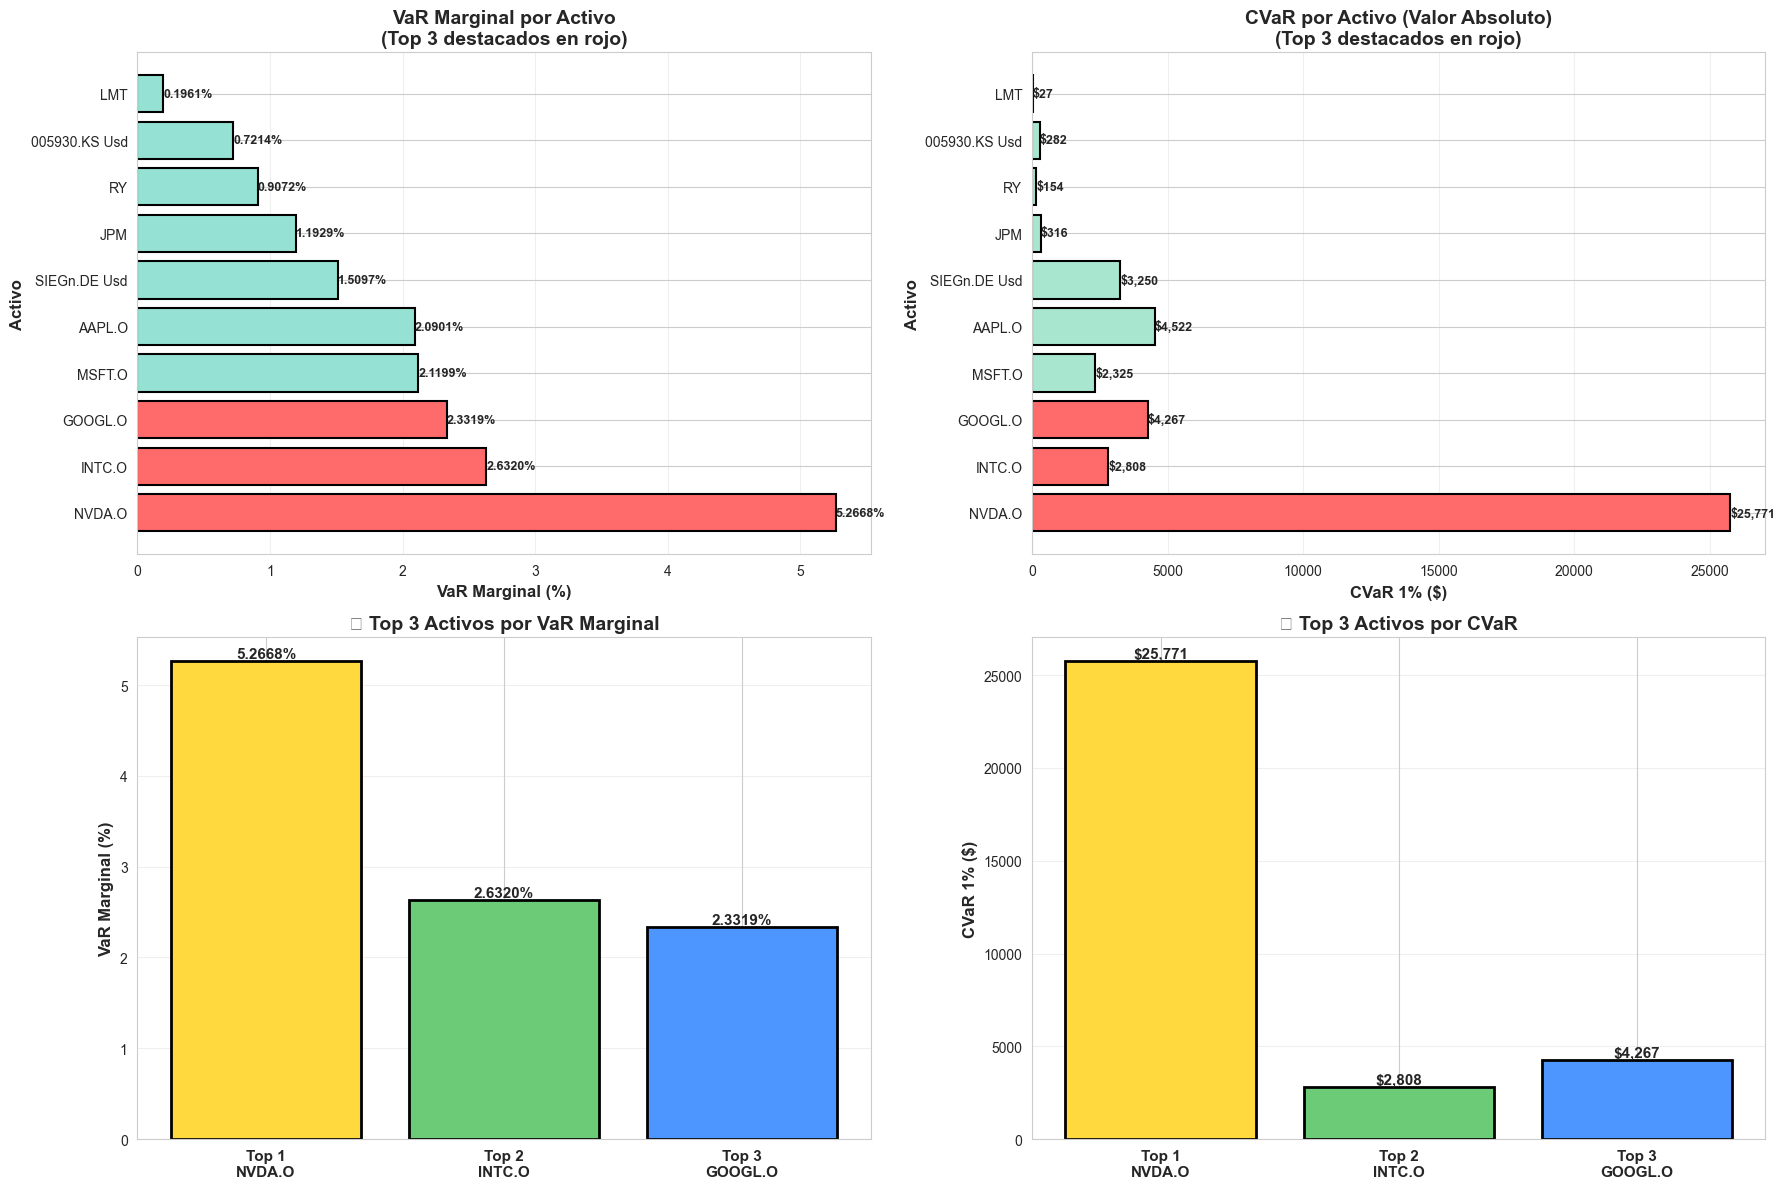

📊 INTERPRETACIÓN DE LAS GRÁFICAS

✅ Gráficos superiores:
   Muestran TODOS los activos, con el Top 3 destacado en ROJO
   Se puede comparar la contribución relativa de cada activo al riesgo total

✅ Gráficos inferiores:
   Enfoque en el Top 3 de activos con mayor contribución al riesgo
   • Amarillo = Top 1 (mayor contribución)
   • Verde = Top 2
   • Azul = Top 3

💡 Observación clave:
   Los 3 activos principales representan 52.68% del portafolio
   pero concentran la mayor parte del riesgo medido por MVaR y CVaR


In [196]:
# ============================================================================
# VISUALIZACIÓN DEL TOP 3 ACTIVOS POR CONTRIBUCIÓN AL RIESGO
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# GRÁFICO 1: VaR Marginal - Comparación de todos los activos con destacado Top 3
ax1 = axes[0, 0]
colores_mvar = ['#FF6B6B' if activo in top3_activos.index else '#95E1D3' 
                for activo in df_riesgo_completo.index]
bars1 = ax1.barh(df_riesgo_completo.index, df_riesgo_completo['MVaR_%'], 
                 color=colores_mvar, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('VaR Marginal (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Activo', fontsize=12, fontweight='bold')
ax1.set_title('VaR Marginal por Activo\n(Top 3 destacados en rojo)', 
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Añadir etiquetas de valores
for i, (bar, valor) in enumerate(zip(bars1, df_riesgo_completo['MVaR_%'])):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2., 
             f'{valor:.4f}%',
             ha='left', va='center', fontsize=9, fontweight='bold')

# GRÁFICO 2: CVaR - Comparación de todos los activos con destacado Top 3
ax2 = axes[0, 1]
colores_cvar = ['#FF6B6B' if activo in top3_activos.index else '#A8E6CF' 
                for activo in df_riesgo_completo.index]
bars2 = ax2.barh(df_riesgo_completo.index, abs(df_riesgo_completo['CVaR_1pct']), 
                 color=colores_cvar, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('CVaR 1% ($)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Activo', fontsize=12, fontweight='bold')
ax2.set_title('CVaR por Activo (Valor Absoluto)\n(Top 3 destacados en rojo)', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# Añadir etiquetas de valores
for i, (bar, valor) in enumerate(zip(bars2, abs(df_riesgo_completo['CVaR_1pct']))):
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2., 
             f'${valor:,.0f}',
             ha='left', va='center', fontsize=9, fontweight='bold')

# GRÁFICO 3: Top 3 - MVaR
ax3 = axes[1, 0]
colores_top3 = ['#FFD93D', '#6BCB77', '#4D96FF']
bars3 = ax3.bar(range(len(top3_activos)), top3_activos['MVaR_%'], 
                color=colores_top3, edgecolor='black', linewidth=2)
ax3.set_xticks(range(len(top3_activos)))
ax3.set_xticklabels([f"Top {i+1}\n{activo}" for i, activo in enumerate(top3_activos.index)], 
                     fontsize=11, fontweight='bold')
ax3.set_ylabel('VaR Marginal (%)', fontsize=12, fontweight='bold')
ax3.set_title('🏆 Top 3 Activos por VaR Marginal', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, valor in zip(bars3, top3_activos['MVaR_%']):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{valor:.4f}%',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# GRÁFICO 4: Top 3 - CVaR
ax4 = axes[1, 1]
bars4 = ax4.bar(range(len(top3_activos)), abs(top3_activos['CVaR_1pct']), 
                color=colores_top3, edgecolor='black', linewidth=2)
ax4.set_xticks(range(len(top3_activos)))
ax4.set_xticklabels([f"Top {i+1}\n{activo}" for i, activo in enumerate(top3_activos.index)], 
                     fontsize=11, fontweight='bold')
ax4.set_ylabel('CVaR 1% ($)', fontsize=12, fontweight='bold')
ax4.set_title('🏆 Top 3 Activos por CVaR', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, valor in zip(bars4, abs(top3_activos['CVaR_1pct'])):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'${valor:,.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("="*80)
print("📊 INTERPRETACIÓN DE LAS GRÁFICAS")
print("="*80)
print("\n✅ Gráficos superiores:")
print("   Muestran TODOS los activos, con el Top 3 destacado en ROJO")
print("   Se puede comparar la contribución relativa de cada activo al riesgo total")

print("\n✅ Gráficos inferiores:")
print("   Enfoque en el Top 3 de activos con mayor contribución al riesgo")
print("   • Amarillo = Top 1 (mayor contribución)")
print("   • Verde = Top 2")
print("   • Azul = Top 3")

print("\n💡 Observación clave:")
print(f"   Los 3 activos principales representan {total_peso_top3*100:.2f}% del portafolio")
print(f"   pero concentran la mayor parte del riesgo medido por MVaR y CVaR")
print("="*80)

## 14. Tracking Error vs S&P 500

El **Tracking Error** mide qué tan desviado está el portafolio respecto a un benchmark (en este caso, el S&P 500). Se calcula como la desviación estándar de los retornos activos.

**Fórmulas:**
- Retorno Activo: $Active\ Return_t = r_{p,t} - r_{b,t}$
- Tracking Error: $TE = \sigma(r_p - r_b)$

Donde:
- $r_p$ = retorno del portafolio
- $r_b$ = retorno del benchmark (S&P 500)

### 14.1 Descarga de Datos del S&P 500

In [197]:
# ============================================================================
# DESCARGA DE DATOS DEL S&P 500 DESDE YAHOO FINANCE
# ============================================================================

print("="*80)
print("DESCARGA DE DATOS DEL S&P 500")
print("="*80)

# Instalar yfinance si no está instalado
try:
    import yfinance as yf
    print("\n✅ yfinance ya está instalado")
except ImportError:
    print("\n⚙️  Instalando yfinance...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'yfinance'])
    import yfinance as yf
    print("✅ yfinance instalado correctamente")

# Obtener las fechas del portafolio
fecha_inicio = '2021-09-09'  # Fecha de inicio ajustada para tener suficiente historia
fecha_fin = df['Date'].max()

print(f"\n📅 Rango de fechas del portafolio:")
print(f"   Fecha inicio: {fecha_inicio}")
print(f"   Fecha fin: {fecha_fin}")

# Descargar datos del S&P 500 (ticker: ^GSPC)
print(f"\n📥 Descargando datos del S&P 500 (^GSPC)...")

sp500_prices = None  # Inicializar la variable

try:
    sp500_data = yf.download('^GSPC', start=fecha_inicio, end=fecha_fin, progress=False)
    
    if len(sp500_data) == 0:
        print("⚠️  No se descargaron datos. Intentando con formato de fecha alternativo...")
        # Convertir fechas a formato más compatible
        fecha_inicio_dt = pd.to_datetime(fecha_inicio)
        fecha_fin_dt = pd.to_datetime(fecha_fin)
        sp500_data = yf.download('^GSPC', 
                                 start=fecha_inicio_dt.strftime('%Y-%m-%d'), 
                                 end=fecha_fin_dt.strftime('%Y-%m-%d'), 
                                 progress=False)
    
    if len(sp500_data) > 0:
        print(f"✅ Datos descargados correctamente")
        print(f"   Número de observaciones: {len(sp500_data)}")
        print(f"\n📊 Columnas descargadas: {sp500_data.columns.tolist()}")
        print(f"\n📊 Primeras filas del S&P 500:")
        print(sp500_data.head())
        
        # Manejar nombres de columnas (MultiIndex o simples)
        # Algunas versiones de yfinance devuelven MultiIndex: ('Close', '^GSPC')
        # Otras devuelven nombres simples: 'Close'
        
        if isinstance(sp500_data.columns, pd.MultiIndex):
            # Si es MultiIndex, aplanar los nombres
            print("\n⚙️  Detectado MultiIndex en columnas, aplanando...")
            sp500_data.columns = sp500_data.columns.get_level_values(0)
            print(f"   Nuevas columnas: {sp500_data.columns.tolist()}")
        
        # Intentar obtener el precio de cierre ajustado
        if 'Adj Close' in sp500_data.columns:
            sp500_prices = sp500_data['Adj Close'].copy()
            print("\n✅ Usando columna 'Adj Close'")
        elif 'Close' in sp500_data.columns:
            sp500_prices = sp500_data['Close'].copy()
            print("\n✅ Usando columna 'Close' (Adj Close no disponible)")
        else:
            # Intentar con el nombre completo si aún tiene MultiIndex
            print(f"\n⚠️  Intentando acceder con nombres alternativos...")
            print(f"   Columnas disponibles: {sp500_data.columns.tolist()}")
            # Tomar la primera columna que contenga 'Close'
            close_col = [col for col in sp500_data.columns if 'Close' in str(col)]
            if close_col:
                sp500_prices = sp500_data[close_col[0]].copy()
                print(f"✅ Usando columna '{close_col[0]}'")
            else:
                print("❌ No se encontró columna de precios de cierre")
                sp500_prices = None
        
        if sp500_prices is not None:
            print(f"\n✅ Variable sp500_prices creada correctamente")
            print(f"   Periodo: {sp500_prices.index[0]} a {sp500_prices.index[-1]}")
            print(f"   Número de valores: {len(sp500_prices)}")
        else:
            print("\n❌ No se pudo crear sp500_prices")
    else:
        print("❌ No se descargaron datos")
        sp500_prices = None
    
except Exception as e:
    print(f"❌ Error al descargar datos: {e}")
    import traceback
    print(traceback.format_exc())
    print("\n⚠️  No se pudieron descargar datos reales del S&P 500")
    print("    Verifica la conexión a internet o intenta nuevamente")
    sp500_prices = None

print("\n" + "="*80)

DESCARGA DE DATOS DEL S&P 500

✅ yfinance ya está instalado

📅 Rango de fechas del portafolio:
   Fecha inicio: 2021-09-09
   Fecha fin: 2025-12-03

📥 Descargando datos del S&P 500 (^GSPC)...


C:\Users\Juan Marco\AppData\Local\Temp\ipykernel_50352\3152752897.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_data = yf.download('^GSPC', start=fecha_inicio, end=fecha_fin, progress=False)


✅ Datos descargados correctamente
   Número de observaciones: 1063

📊 Columnas descargadas: [('Close', '^GSPC'), ('High', '^GSPC'), ('Low', '^GSPC'), ('Open', '^GSPC'), ('Volume', '^GSPC')]

📊 Primeras filas del S&P 500:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2021-09-09  4493.279785  4529.899902  4492.069824  4513.020020  3735390000
2021-09-10  4458.580078  4520.470215  4457.660156  4506.919922  3623180000
2021-09-13  4468.729980  4492.990234  4445.700195  4474.810059  3914220000
2021-09-14  4443.049805  4485.680176  4435.459961  4479.330078  3670460000
2021-09-15  4480.700195  4486.870117  4438.370117  4447.490234  4032020000

⚙️  Detectado MultiIndex en columnas, aplanando...
   Nuevas columnas: ['Close', 'High', 'Low', 'Open', 'Volume']

✅ Usando columna 'Close' (Adj Close no disponible)

✅ Variable 

In [198]:
sp500_data

Price,Close,High,Low,Open,Volume
Date,,,,,
2021-09-09,4493.279785,4529.899902,4492.069824,4513.020020,3735390000
2021-09-10,4458.580078,4520.470215,4457.660156,4506.919922,3623180000
2021-09-13,4468.729980,4492.990234,4445.700195,4474.810059,3914220000
2021-09-14,4443.049805,4485.680176,4435.459961,4479.330078,3670460000
2021-09-15,4480.700195,4486.870117,4438.370117,4447.490234,4032020000
...,...,...,...,...,...
2025-11-25,6765.879883,6776.399902,6659.979980,6697.029785,5003330000
2025-11-26,6812.609863,6831.439941,6783.870117,6793.549805,4485000000
2025-11-28,6849.089844,6850.859863,6819.750000,6822.520020,2558540000


### 14.2 Cálculo del Tracking Error

In [199]:
# ============================================================================
# CÁLCULO DEL TRACKING ERROR
# ============================================================================

print("="*80)
print("CÁLCULO DEL TRACKING ERROR VS S&P 500")
print("="*80)

# Verificar que sp500_prices existe y tiene datos
if 'sp500_prices' not in dir() or sp500_prices is None:
    print("❌ ERROR: sp500_prices no está definido.")
    print("   Por favor, ejecuta primero la celda de descarga de datos del S&P 500.")
else:
    # Resetear el índice del S&P 500 para trabajar con fechas
    sp500_df = pd.DataFrame({
        'Date': sp500_prices.index,
        'SP500_Price': sp500_prices.values
    })

    # Asegurar que las fechas estén en formato datetime
    sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
    df['Date'] = pd.to_datetime(df['Date'])

    # Merge con el DataFrame del portafolio
    df_tracking = df[['Date', 'Día', 'V0', 'Rendimiento']].copy()
    df_tracking = df_tracking.merge(sp500_df, on='Date', how='inner')

    print(f"\n📊 Datos combinados:")
    print(f"   Observaciones disponibles: {len(df_tracking)}")
    print(f"   Periodo: desde {df_tracking['Date'].min()} hasta {df_tracking['Date'].max()}")

    # Calcular rendimientos del S&P 500
    # Como los datos están ordenados del más reciente al más antiguo, usar shift(-1)
    df_tracking['SP500_Rendimiento'] = (df_tracking['SP500_Price'] / df_tracking['SP500_Price'].shift(-1)) - 1

    # Calcular Active Returns (Retornos Activos)
    # Active Return = Rendimiento del Portafolio - Rendimiento del Benchmark
    df_tracking['Active_Return'] = df_tracking['Rendimiento'] - df_tracking['SP500_Rendimiento']

    # Eliminar NaN
    df_tracking_clean = df_tracking.dropna()

    print(f"\n📈 PRIMERAS 10 OBSERVACIONES:")
    print(df_tracking_clean[['Date', 'Día', 'Rendimiento', 'SP500_Rendimiento', 'Active_Return']].head(10).to_string(index=False))

    # Calcular el Tracking Error
    # TE = desviación estándar de los retornos activos
    tracking_error = df_tracking_clean['Active_Return'].std()

    # Tracking Error anualizado (asumiendo 252 días de trading)
    tracking_error_anualizado = tracking_error * np.sqrt(252)

    # Estadísticas adicionales
    active_return_promedio = df_tracking_clean['Active_Return'].mean()
    active_return_promedio_anualizado = active_return_promedio * 252

    # Correlación entre portafolio y benchmark
    correlacion = df_tracking_clean['Rendimiento'].corr(df_tracking_clean['SP500_Rendimiento'])

    print("\n" + "="*80)
    print("📊 RESULTADOS DEL TRACKING ERROR")
    print("="*80)

    print(f"\n🎯 TRACKING ERROR:")
    print(f"   Diario:                    {tracking_error:.6f} ({tracking_error*100:.4f}%)")
    print(f"   Anualizado (252 días):     {tracking_error_anualizado:.6f} ({tracking_error_anualizado*100:.2f}%)")

    print(f"\n📈 RETORNO ACTIVO PROMEDIO:")
    print(f"   Diario:                    {active_return_promedio:.6f} ({active_return_promedio*100:.4f}%)")
    print(f"   Anualizado (252 días):     {active_return_promedio_anualizado:.6f} ({active_return_promedio_anualizado*100:.2f}%)")

    print(f"\n🔗 CORRELACIÓN CON S&P 500:")
    print(f"   Coeficiente de correlación: {correlacion:.4f}")

    # Information Ratio (si está disponible)
    if tracking_error > 0:
        information_ratio = active_return_promedio / tracking_error
        information_ratio_anualizado = active_return_promedio_anualizado / tracking_error_anualizado
        print(f"\n📊 INFORMATION RATIO:")
        print(f"   Diario:                    {information_ratio:.4f}")
        print(f"   Anualizado:                {information_ratio_anualizado:.4f}")

    print(f"\n💡 INTERPRETACIÓN:")
    print("-" * 80)
    print(f"   • Tracking Error = {tracking_error_anualizado*100:.2f}% anualizado")

    if tracking_error_anualizado < 0.02:  # < 2%
        print(f"   • 🟢 MUY BAJO: El portafolio sigue muy de cerca al S&P 500")
        print(f"   • El portafolio se comporta casi como un fondo índice")
    elif tracking_error_anualizado < 0.05:  # 2-5%
        print(f"   • 🟡 BAJO: El portafolio tiene desviación moderada del S&P 500")
        print(f"   • Estrategia con ligera diferenciación del índice")
    elif tracking_error_anualizado < 0.10:  # 5-10%
        print(f"   • 🟠 MODERADO: El portafolio tiene desviación notable del S&P 500")
        print(f"   • Estrategia activa con selección de valores diferenciada")
    else:  # > 10%
        print(f"   • 🔴 ALTO: El portafolio se desvía significativamente del S&P 500")
        print(f"   • Estrategia muy activa con alta diferenciación")

    print(f"\n   • Correlación = {correlacion:.4f}")
    if correlacion > 0.9:
        print(f"   • 🔗 Muy alta correlación: El portafolio se mueve muy similar al índice")
    elif correlacion > 0.7:
        print(f"   • 🔗 Alta correlación: El portafolio tiende a seguir al índice")
    elif correlacion > 0.5:
        print(f"   • 🔗 Correlación moderada: Cierta independencia del índice")
    else:
        print(f"   • 🔗 Baja correlación: El portafolio es bastante independiente del índice")

    if information_ratio_anualizado > 0:
        print(f"\n   • Information Ratio = {information_ratio_anualizado:.4f}")
        print(f"   • El portafolio genera {active_return_promedio_anualizado*100:.2f}% anual adicional")
        print(f"     vs el S&P 500 con un tracking error de {tracking_error_anualizado*100:.2f}%")
        if information_ratio_anualizado > 0.5:
            print(f"   • 🟢 EXCELENTE: Alta rentabilidad ajustada por desviación")
        elif information_ratio_anualizado > 0:
            print(f"   • 🟡 POSITIVO: Genera valor sobre el benchmark")
        else:
            print(f"   • 🔴 NEGATIVO: Destruye valor vs el benchmark")
            
    print("\n" + "="*80)

CÁLCULO DEL TRACKING ERROR VS S&P 500

📊 Datos combinados:
   Observaciones disponibles: 1061
   Periodo: desde 2021-09-13 00:00:00 hasta 2025-12-02 00:00:00

📈 PRIMERAS 10 OBSERVACIONES:
      Date  Día  Rendimiento  SP500_Rendimiento  Active_Return
2025-12-02    2     0.003896           0.002457       0.001439
2025-12-01    3     0.012177          -0.005323       0.017500
2025-11-28    4    -0.001174           0.005355      -0.006528
2025-11-26    5     0.002238           0.006907      -0.004668
2025-11-25    6     0.008539           0.009062      -0.000523
2025-11-24    7    -0.002741           0.015467      -0.018208
2025-11-21    8     0.019107           0.009823       0.009284
2025-11-20    9     0.000267          -0.015567       0.015834
2025-11-19   10    -0.016953           0.003754      -0.020707
2025-11-18   11     0.012400          -0.008256       0.020656

📊 RESULTADOS DEL TRACKING ERROR

🎯 TRACKING ERROR:
   Diario:                    0.018151 (1.8151%)
   Anualizado (252

### 14.3 Visualización del Tracking Error

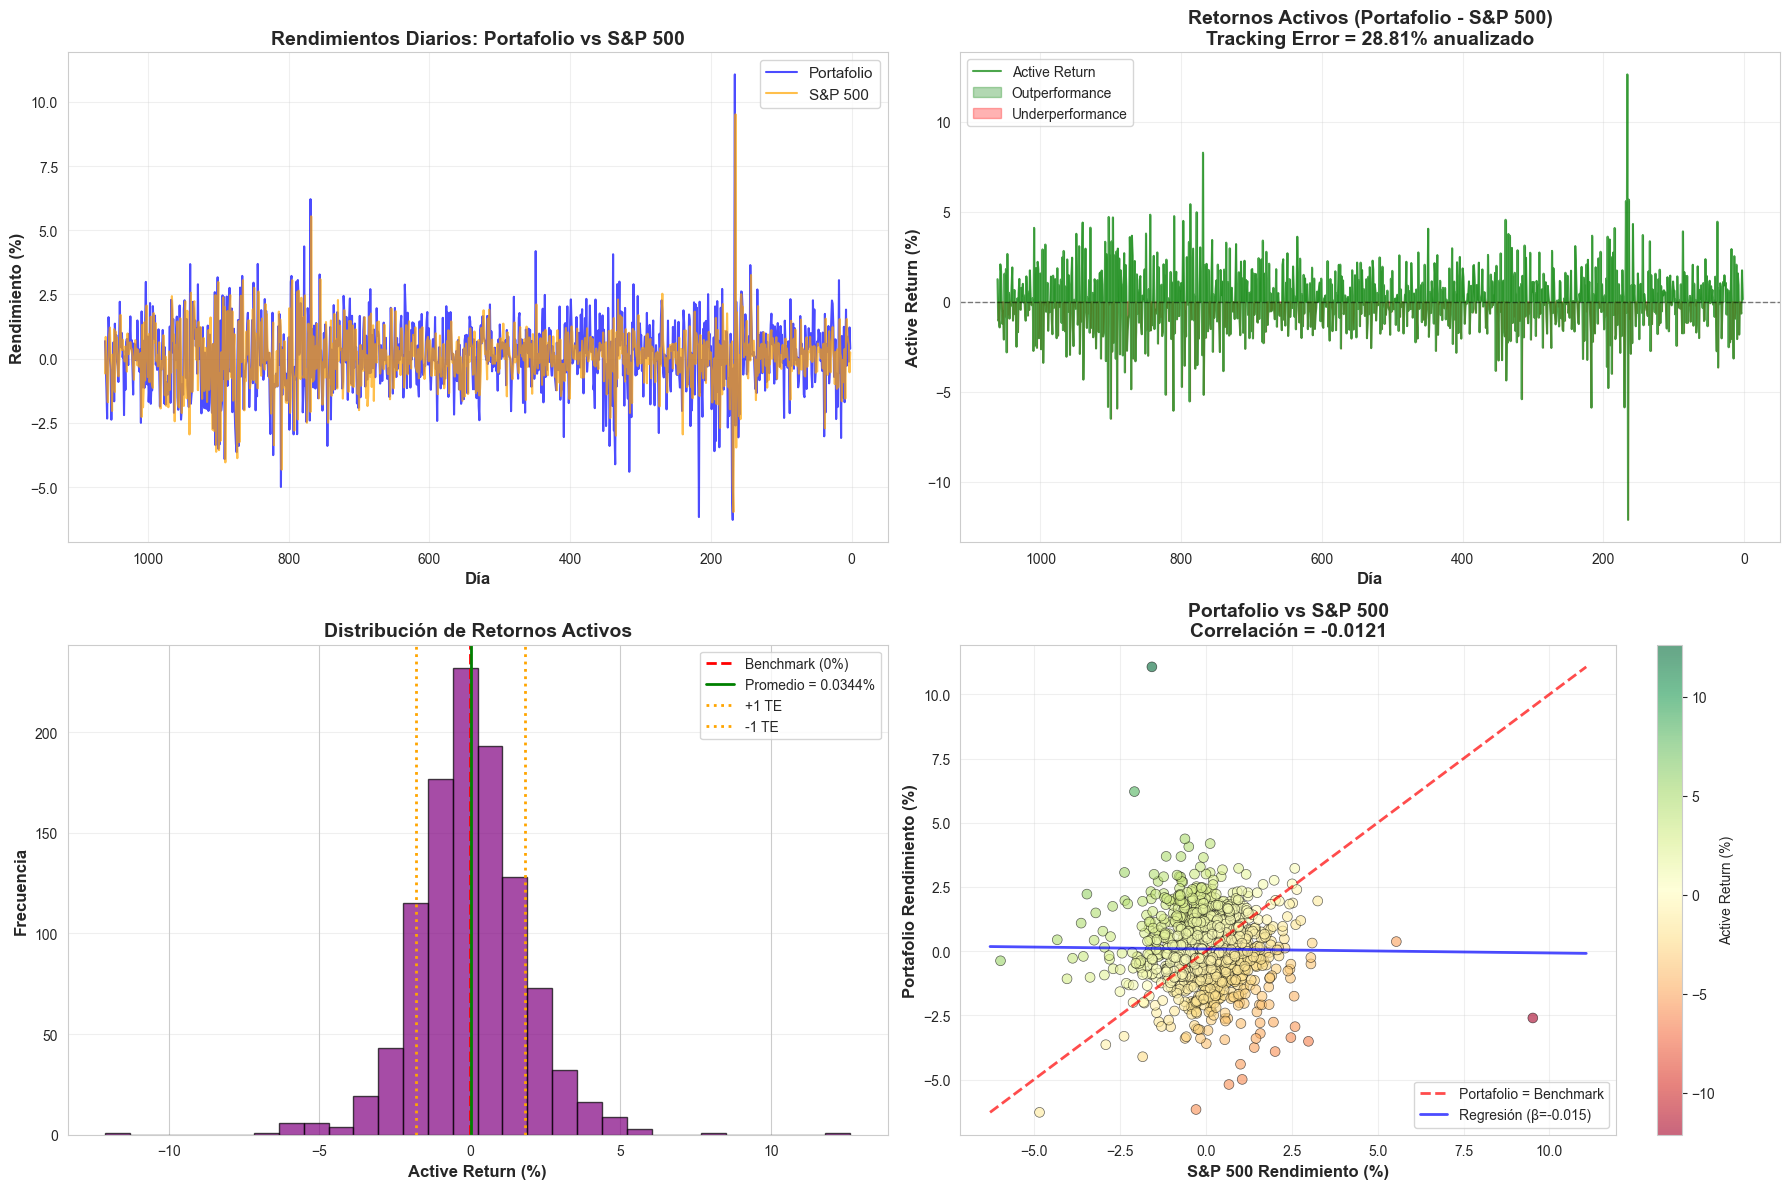

📊 INTERPRETACIÓN DE LAS GRÁFICAS

✅ Gráfico 1 (Superior Izquierdo):
   Compara los rendimientos diarios del portafolio vs el S&P 500
   Muestra qué tan sincronizados están los movimientos

✅ Gráfico 2 (Superior Derecho):
   Muestra los ACTIVE RETURNS (diferencia entre portafolio y benchmark)
   • Verde = Días donde el portafolio supera al S&P 500
   • Rojo = Días donde el portafolio queda por debajo del S&P 500

✅ Gráfico 3 (Inferior Izquierdo):
   Distribución de los retornos activos
   • Las líneas naranjas muestran ±1 Tracking Error
   • Muestra la dispersión típica respecto al benchmark

✅ Gráfico 4 (Inferior Derecho):
   Scatter plot que muestra la relación entre portafolio y benchmark
   • Línea roja = portafolio = benchmark (tracking perfecto)
   • Línea azul = regresión (pendiente = beta)
   • Color de puntos = Active Return (verde = outperform, rojo = underperform)

📊 RESUMEN DE PERFORMANCE:
--------------------------------------------------------------------------------
   Dí

In [200]:
# ============================================================================
# VISUALIZACIÓN DEL TRACKING ERROR
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# GRÁFICO 1: Rendimientos del Portafolio vs S&P 500
ax1 = axes[0, 0]
ax1.plot(df_tracking_clean['Día'], df_tracking_clean['Rendimiento'] * 100, 
         linewidth=1.5, color='blue', label='Portafolio', alpha=0.7)
ax1.plot(df_tracking_clean['Día'], df_tracking_clean['SP500_Rendimiento'] * 100, 
         linewidth=1.5, color='orange', label='S&P 500', alpha=0.7)
ax1.set_xlabel('Día', fontsize=12, fontweight='bold')
ax1.set_ylabel('Rendimiento (%)', fontsize=12, fontweight='bold')
ax1.set_title('Rendimientos Diarios: Portafolio vs S&P 500', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.invert_xaxis()

# GRÁFICO 2: Active Returns (Retornos Activos)
ax2 = axes[0, 1]
ax2.plot(df_tracking_clean['Día'], df_tracking_clean['Active_Return'] * 100, 
         linewidth=1.5, color='green', label='Active Return', alpha=0.7)
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax2.fill_between(df_tracking_clean['Día'], 0, df_tracking_clean['Active_Return'] * 100,
                  where=(df_tracking_clean['Active_Return'] > 0), alpha=0.3, color='green',
                  label='Outperformance')
ax2.fill_between(df_tracking_clean['Día'], 0, df_tracking_clean['Active_Return'] * 100,
                  where=(df_tracking_clean['Active_Return'] <= 0), alpha=0.3, color='red',
                  label='Underperformance')
ax2.set_xlabel('Día', fontsize=12, fontweight='bold')
ax2.set_ylabel('Active Return (%)', fontsize=12, fontweight='bold')
ax2.set_title(f'Retornos Activos (Portafolio - S&P 500)\nTracking Error = {tracking_error_anualizado*100:.2f}% anualizado', 
              fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.invert_xaxis()

# GRÁFICO 3: Distribución de Active Returns
ax3 = axes[1, 0]
ax3.hist(df_tracking_clean['Active_Return'] * 100, bins=30, edgecolor='black', 
         alpha=0.7, color='purple')
ax3.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Benchmark (0%)')
ax3.axvline(x=active_return_promedio * 100, color='green', linestyle='-', linewidth=2,
            label=f'Promedio = {active_return_promedio*100:.4f}%')
ax3.axvline(x=active_return_promedio * 100 + tracking_error * 100, color='orange', 
            linestyle=':', linewidth=2, label=f'+1 TE')
ax3.axvline(x=active_return_promedio * 100 - tracking_error * 100, color='orange', 
            linestyle=':', linewidth=2, label=f'-1 TE')
ax3.set_xlabel('Active Return (%)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
ax3.set_title('Distribución de Retornos Activos', fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# GRÁFICO 4: Scatter Plot - Portafolio vs S&P 500
ax4 = axes[1, 1]
scatter = ax4.scatter(df_tracking_clean['SP500_Rendimiento'] * 100, 
                     df_tracking_clean['Rendimiento'] * 100,
                     c=df_tracking_clean['Active_Return'] * 100, 
                     cmap='RdYlGn', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Línea de 45 grados (donde portafolio = benchmark)
min_val = min(df_tracking_clean['SP500_Rendimiento'].min(), df_tracking_clean['Rendimiento'].min()) * 100
max_val = max(df_tracking_clean['SP500_Rendimiento'].max(), df_tracking_clean['Rendimiento'].max()) * 100
ax4.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, 
         label='Portafolio = Benchmark', alpha=0.7)

# Línea de regresión
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df_tracking_clean['SP500_Rendimiento'] * 100, 
    df_tracking_clean['Rendimiento'] * 100
)
line_x = np.linspace(min_val, max_val, 100)
line_y = slope * line_x + intercept
ax4.plot(line_x, line_y, 'b-', linewidth=2, alpha=0.7,
         label=f'Regresión (β={slope:.3f})')

ax4.set_xlabel('S&P 500 Rendimiento (%)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Portafolio Rendimiento (%)', fontsize=12, fontweight='bold')
ax4.set_title(f'Portafolio vs S&P 500\nCorrelación = {correlacion:.4f}', 
              fontsize=14, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Active Return (%)', fontsize=10)

plt.tight_layout()
plt.show()

print("="*80)
print("📊 INTERPRETACIÓN DE LAS GRÁFICAS")
print("="*80)

print("\n✅ Gráfico 1 (Superior Izquierdo):")
print("   Compara los rendimientos diarios del portafolio vs el S&P 500")
print("   Muestra qué tan sincronizados están los movimientos")

print("\n✅ Gráfico 2 (Superior Derecho):")
print("   Muestra los ACTIVE RETURNS (diferencia entre portafolio y benchmark)")
print("   • Verde = Días donde el portafolio supera al S&P 500")
print("   • Rojo = Días donde el portafolio queda por debajo del S&P 500")

print("\n✅ Gráfico 3 (Inferior Izquierdo):")
print("   Distribución de los retornos activos")
print("   • Las líneas naranjas muestran ±1 Tracking Error")
print("   • Muestra la dispersión típica respecto al benchmark")

print("\n✅ Gráfico 4 (Inferior Derecho):")
print("   Scatter plot que muestra la relación entre portafolio y benchmark")
print("   • Línea roja = portafolio = benchmark (tracking perfecto)")
print("   • Línea azul = regresión (pendiente = beta)")
print("   • Color de puntos = Active Return (verde = outperform, rojo = underperform)")

# Análisis de días de outperformance
dias_outperformance = (df_tracking_clean['Active_Return'] > 0).sum()
dias_underperformance = (df_tracking_clean['Active_Return'] < 0).sum()
pct_outperformance = (dias_outperformance / len(df_tracking_clean)) * 100

print("\n📊 RESUMEN DE PERFORMANCE:")
print("-" * 80)
print(f"   Días de Outperformance:    {dias_outperformance} ({pct_outperformance:.1f}%)")
print(f"   Días de Underperformance:  {dias_underperformance} ({100-pct_outperformance:.1f}%)")
print(f"   Beta del portafolio:        {slope:.4f}")

if slope > 1:
    print(f"   • Beta > 1: El portafolio es más volátil que el S&P 500")
elif slope < 1:
    print(f"   • Beta < 1: El portafolio es menos volátil que el S&P 500")
else:
    print(f"   • Beta ≈ 1: El portafolio tiene volatilidad similar al S&P 500")

print("="*80)

## 15. Métricas de Performance del Portafolio (BONUS)

En esta sección calcularemos métricas adicionales para evaluar el desempeño del portafolio:
- **Sharpe Ratio**: Retorno ajustado por riesgo (usando tasa libre de riesgo)
- **Sortino Ratio**: Similar al Sharpe pero solo considera volatilidad a la baja
- **Jarque-Bera Test**: Prueba de normalidad de los rendimientos

### 15.1 Sharpe Ratio

In [201]:
# ============================================================================
# SHARPE RATIO
# ============================================================================

print("="*80)
print("SHARPE RATIO - RETORNO AJUSTADO POR RIESGO")
print("="*80)

# El Sharpe Ratio mide el exceso de retorno por unidad de riesgo
# Fórmula: Sharpe = (R_p - R_f) / σ_p
# Donde:
#   R_p = retorno del portafolio
#   R_f = tasa libre de riesgo
#   σ_p = desviación estándar del portafolio

# Obtener rendimientos del portafolio (sin NaN)
rendimientos_portafolio = df['Rendimiento'].dropna()

# Estadísticas básicas
retorno_promedio_diario = rendimientos_portafolio.mean()
retorno_promedio_anual = retorno_promedio_diario * 252
volatilidad_diaria = rendimientos_portafolio.std()
volatilidad_anual = volatilidad_diaria * np.sqrt(252)

# Tasa libre de riesgo (asumiendo 4% anual ~ US Treasury)
# Puedes ajustar este valor según el periodo de análisis
tasa_libre_riesgo_anual = 0.04  # 4% anual
tasa_libre_riesgo_diaria = tasa_libre_riesgo_anual / 252

print(f"\n📊 ESTADÍSTICAS DEL PORTAFOLIO:")
print(f"   Retorno promedio diario:    {retorno_promedio_diario:.6f} ({retorno_promedio_diario*100:.4f}%)")
print(f"   Retorno promedio anual:     {retorno_promedio_anual:.6f} ({retorno_promedio_anual*100:.2f}%)")
print(f"   Volatilidad diaria:         {volatilidad_diaria:.6f} ({volatilidad_diaria*100:.4f}%)")
print(f"   Volatilidad anual:          {volatilidad_anual:.6f} ({volatilidad_anual*100:.2f}%)")

print(f"\n📈 TASA LIBRE DE RIESGO:")
print(f"   Anual:                      {tasa_libre_riesgo_anual:.4f} ({tasa_libre_riesgo_anual*100:.2f}%)")
print(f"   Diaria:                     {tasa_libre_riesgo_diaria:.6f} ({tasa_libre_riesgo_diaria*100:.4f}%)")

# Calcular Sharpe Ratio
# Versión diaria
exceso_retorno_diario = retorno_promedio_diario - tasa_libre_riesgo_diaria
sharpe_ratio_diario = exceso_retorno_diario / volatilidad_diaria

# Versión anualizada (más común)
exceso_retorno_anual = retorno_promedio_anual - tasa_libre_riesgo_anual
sharpe_ratio_anual = exceso_retorno_anual / volatilidad_anual

print("\n" + "="*80)
print("📊 SHARPE RATIO")
print("="*80)

print(f"\n🎯 Sharpe Ratio Diario:       {sharpe_ratio_diario:.4f}")
print(f"🎯 Sharpe Ratio Anualizado:   {sharpe_ratio_anual:.4f}")

print(f"\n   Exceso de retorno diario:   {exceso_retorno_diario:.6f} ({exceso_retorno_diario*100:.4f}%)")
print(f"   Exceso de retorno anual:    {exceso_retorno_anual:.6f} ({exceso_retorno_anual*100:.2f}%)")

print(f"\n💡 INTERPRETACIÓN:")
print("-" * 80)

if sharpe_ratio_anual < 0:
    print(f"   • 🔴 NEGATIVO ({sharpe_ratio_anual:.2f}): Rendimiento menor que la tasa libre de riesgo")
    print(f"   • El portafolio NO compensa el riesgo asumido")
elif sharpe_ratio_anual < 1.0:
    print(f"   • 🟡 BAJO ({sharpe_ratio_anual:.2f}): Rendimiento ajustado por riesgo limitado")
    print(f"   • El portafolio genera algo de valor pero es modesto")
elif sharpe_ratio_anual < 2.0:
    print(f"   • 🟢 BUENO ({sharpe_ratio_anual:.2f}): Buen rendimiento ajustado por riesgo")
    print(f"   • El portafolio compensa adecuadamente el riesgo")
elif sharpe_ratio_anual < 3.0:
    print(f"   • 🟢 MUY BUENO ({sharpe_ratio_anual:.2f}): Excelente rendimiento ajustado por riesgo")
    print(f"   • El portafolio genera valor significativo por unidad de riesgo")
else:
    print(f"   • 🟢 EXCEPCIONAL ({sharpe_ratio_anual:.2f}): Rendimiento sobresaliente")
    print(f"   • El portafolio tiene un desempeño excepcional ajustado por riesgo")

print(f"\n   Estándares de referencia:")
print(f"   • Sharpe < 0:    Destruye valor vs tasa libre de riesgo")
print(f"   • Sharpe 0-1:    Rendimiento aceptable pero modesto")
print(f"   • Sharpe 1-2:    Buen rendimiento ajustado por riesgo")
print(f"   • Sharpe 2-3:    Muy buen rendimiento")
print(f"   • Sharpe > 3:    Excepcional (poco común en periodos largos)")

print("\n" + "="*80)

SHARPE RATIO - RETORNO AJUSTADO POR RIESGO

📊 ESTADÍSTICAS DEL PORTAFOLIO:
   Retorno promedio diario:    0.000804 (0.0804%)
   Retorno promedio anual:     0.202638 (20.26%)
   Volatilidad diaria:         0.014182 (1.4182%)
   Volatilidad anual:          0.225128 (22.51%)

📈 TASA LIBRE DE RIESGO:
   Anual:                      0.0400 (4.00%)
   Diaria:                     0.000159 (0.0159%)

📊 SHARPE RATIO

🎯 Sharpe Ratio Diario:       0.0455
🎯 Sharpe Ratio Anualizado:   0.7224

   Exceso de retorno diario:   0.000645 (0.0645%)
   Exceso de retorno anual:    0.162638 (16.26%)

💡 INTERPRETACIÓN:
--------------------------------------------------------------------------------
   • 🟡 BAJO (0.72): Rendimiento ajustado por riesgo limitado
   • El portafolio genera algo de valor pero es modesto

   Estándares de referencia:
   • Sharpe < 0:    Destruye valor vs tasa libre de riesgo
   • Sharpe 0-1:    Rendimiento aceptable pero modesto
   • Sharpe 1-2:    Buen rendimiento ajustado por riesgo

### 15.2 Sortino Ratio

In [202]:
# ============================================================================
# SORTINO RATIO
# ============================================================================

print("="*80)
print("SORTINO RATIO - RETORNO AJUSTADO POR RIESGO A LA BAJA")
print("="*80)

# El Sortino Ratio es similar al Sharpe pero solo penaliza la volatilidad NEGATIVA
# Fórmula: Sortino = (R_p - R_f) / σ_downside
# Donde:
#   R_p = retorno del portafolio
#   R_f = tasa libre de riesgo (o MAR - Minimum Acceptable Return)
#   σ_downside = desviación estándar de los rendimientos NEGATIVOS

print(f"\n📊 CÁLCULO DE VOLATILIDAD A LA BAJA:")

# Identificar rendimientos negativos (por debajo de la tasa libre de riesgo)
# MAR (Minimum Acceptable Return) = tasa libre de riesgo
MAR = tasa_libre_riesgo_diaria

# Rendimientos por debajo del MAR
rendimientos_negativos = rendimientos_portafolio[rendimientos_portafolio < MAR]
excesos_negativos = rendimientos_negativos - MAR

print(f"   Total de observaciones:           {len(rendimientos_portafolio)}")
print(f"   Días con rendimiento < MAR:       {len(rendimientos_negativos)} ({len(rendimientos_negativos)/len(rendimientos_portafolio)*100:.1f}%)")
print(f"   Días con rendimiento ≥ MAR:       {len(rendimientos_portafolio) - len(rendimientos_negativos)} ({(len(rendimientos_portafolio) - len(rendimientos_negativos))/len(rendimientos_portafolio)*100:.1f}%)")

# Calcular downside deviation (desviación a la baja)
# Se usa la raíz cuadrada de la media de los cuadrados de las desviaciones negativas
if len(excesos_negativos) > 0:
    # Downside deviation = sqrt(sum((r - MAR)^2) / n) para r < MAR
    downside_deviation_diaria = np.sqrt((excesos_negativos ** 2).sum() / len(rendimientos_portafolio))
    downside_deviation_anual = downside_deviation_diaria * np.sqrt(252)
else:
    downside_deviation_diaria = 0.0001  # Evitar división por cero
    downside_deviation_anual = downside_deviation_diaria * np.sqrt(252)
    print("   ⚠️  No hay rendimientos negativos (caso excepcional)")

print(f"\n   Downside Deviation diaria:        {downside_deviation_diaria:.6f} ({downside_deviation_diaria*100:.4f}%)")
print(f"   Downside Deviation anual:         {downside_deviation_anual:.6f} ({downside_deviation_anual*100:.2f}%)")

# Comparar con volatilidad total
print(f"\n   Volatilidad total (σ):            {volatilidad_diaria:.6f} ({volatilidad_diaria*100:.4f}%)")
print(f"   Ratio Downside/Total:             {downside_deviation_diaria/volatilidad_diaria:.2%}")

# Calcular Sortino Ratio
sortino_ratio_diario = exceso_retorno_diario / downside_deviation_diaria
sortino_ratio_anual = exceso_retorno_anual / downside_deviation_anual

print("\n" + "="*80)
print("📊 SORTINO RATIO")
print("="*80)

print(f"\n🎯 Sortino Ratio Diario:           {sortino_ratio_diario:.4f}")
print(f"🎯 Sortino Ratio Anualizado:       {sortino_ratio_anual:.4f}")

print(f"\n📊 COMPARACIÓN CON SHARPE RATIO:")
print(f"   Sharpe Ratio:                    {sharpe_ratio_anual:.4f}")
print(f"   Sortino Ratio:                   {sortino_ratio_anual:.4f}")
print(f"   Diferencia:                      {sortino_ratio_anual - sharpe_ratio_anual:.4f}")

print(f"\n💡 INTERPRETACIÓN:")
print("-" * 80)

if sortino_ratio_anual > sharpe_ratio_anual:
    diferencia_pct = ((sortino_ratio_anual / sharpe_ratio_anual) - 1) * 100
    print(f"   • ✅ Sortino > Sharpe ({diferencia_pct:.1f}% mayor)")
    print(f"   • El portafolio tiene relativamente POCA volatilidad a la baja")
    print(f"   • Las caídas son menos frecuentes o severas que la volatilidad general")
    print(f"   • POSITIVO: La volatilidad viene más del lado positivo (ganancias)")
else:
    print(f"   • El Sortino es similar o menor al Sharpe")
    print(f"   • Volatilidad distribuida equilibradamente entre ganancias y pérdidas")

print(f"\n   Estándares de referencia (Sortino):")
print(f"   • Sortino < 0:    Destruye valor")
print(f"   • Sortino 0-1:    Aceptable")
print(f"   • Sortino 1-2:    Bueno")
print(f"   • Sortino 2-3:    Muy bueno")
print(f"   • Sortino > 3:    Excepcional")

print(f"\n   📌 Ventaja del Sortino sobre el Sharpe:")
print(f"      El Sortino NO penaliza la volatilidad POSITIVA (ganancias)")
print(f"      Solo considera el riesgo de pérdidas (downside risk)")

print("\n" + "="*80)

SORTINO RATIO - RETORNO AJUSTADO POR RIESGO A LA BAJA

📊 CÁLCULO DE VOLATILIDAD A LA BAJA:
   Total de observaciones:           1061
   Días con rendimiento < MAR:       510 (48.1%)
   Días con rendimiento ≥ MAR:       551 (51.9%)

   Downside Deviation diaria:        0.009730 (0.9730%)
   Downside Deviation anual:         0.154456 (15.45%)

   Volatilidad total (σ):            0.014182 (1.4182%)
   Ratio Downside/Total:             68.61%

📊 SORTINO RATIO

🎯 Sortino Ratio Diario:           0.0663
🎯 Sortino Ratio Anualizado:       1.0530

📊 COMPARACIÓN CON SHARPE RATIO:
   Sharpe Ratio:                    0.7224
   Sortino Ratio:                   1.0530
   Diferencia:                      0.3305

💡 INTERPRETACIÓN:
--------------------------------------------------------------------------------
   • ✅ Sortino > Sharpe (45.8% mayor)
   • El portafolio tiene relativamente POCA volatilidad a la baja
   • Las caídas son menos frecuentes o severas que la volatilidad general
   • POSITIVO: L

### 15.3 Test de Jarque-Bera (Normalidad)

In [203]:
# ============================================================================
# TEST DE JARQUE-BERA (PRUEBA DE NORMALIDAD)
# ============================================================================

print("="*80)
print("TEST DE JARQUE-BERA - PRUEBA DE NORMALIDAD")
print("="*80)

# El test de Jarque-Bera evalúa si los rendimientos siguen una distribución normal
# Se basa en asimetría (skewness) y curtosis (kurtosis)
# 
# Fórmula: JB = (n/6) * [S^2 + (K-3)^2/4]
# Donde:
#   n = número de observaciones
#   S = skewness (asimetría)
#   K = kurtosis (curtosis)
#
# H0 (hipótesis nula): Los datos siguen una distribución normal
# H1 (hipótesis alternativa): Los datos NO siguen una distribución normal

from scipy import stats

# Calcular estadísticas
n = len(rendimientos_portafolio)
skewness = rendimientos_portafolio.skew()
kurtosis = rendimientos_portafolio.kurtosis()  # Excess kurtosis (K - 3)
kurtosis_raw = kurtosis + 3  # Kurtosis total

print(f"\n📊 ESTADÍSTICAS DE LOS RENDIMIENTOS:")
print(f"   Número de observaciones:      {n}")
print(f"   Media:                        {rendimientos_portafolio.mean():.6f}")
print(f"   Desviación estándar:          {rendimientos_portafolio.std():.6f}")
print(f"   Mínimo:                       {rendimientos_portafolio.min():.6f}")
print(f"   Máximo:                       {rendimientos_portafolio.max():.6f}")

print(f"\n📈 ASIMETRÍA (SKEWNESS):")
print(f"   Skewness:                     {skewness:.4f}")
if abs(skewness) < 0.5:
    print(f"   → Distribución aproximadamente simétrica")
elif skewness < -0.5:
    print(f"   → Asimetría NEGATIVA (cola izquierda más larga)")
    print(f"   → Más días con pérdidas extremas que ganancias extremas")
else:
    print(f"   → Asimetría POSITIVA (cola derecha más larga)")
    print(f"   → Más días con ganancias extremas que pérdidas extremas")

print(f"\n📉 CURTOSIS (KURTOSIS):")
print(f"   Kurtosis (excess):            {kurtosis:.4f}")
print(f"   Kurtosis (total):             {kurtosis_raw:.4f}")
print(f"   (Distribución normal tiene kurtosis = 3 o excess kurtosis = 0)")

if abs(kurtosis) < 1:
    print(f"   → Similar a distribución normal (mesocúrtica)")
elif kurtosis > 1:
    print(f"   → Leptocúrtica (colas más pesadas que la normal)")
    print(f"   → Mayor probabilidad de eventos extremos")
    print(f"   → ⚠️  Más riesgo de pérdidas/ganancias extremas")
else:
    print(f"   → Platicúrtica (colas más ligeras que la normal)")
    print(f"   → Menor probabilidad de eventos extremos")

# Realizar test de Jarque-Bera
jb_statistic, jb_pvalue = stats.jarque_bera(rendimientos_portafolio)

print("\n" + "="*80)
print("📊 RESULTADOS DEL TEST DE JARQUE-BERA")
print("="*80)

print(f"\n🎯 Estadístico JB:               {jb_statistic:.4f}")
print(f"🎯 P-value:                      {jb_pvalue:.6f}")

# Niveles de significancia comunes
alpha_001 = 0.01  # 99% confianza
alpha_005 = 0.05  # 95% confianza
alpha_010 = 0.10  # 90% confianza

print(f"\n💡 INTERPRETACIÓN:")
print("-" * 80)

print(f"\nHipótesis:")
print(f"   H0: Los rendimientos siguen una distribución NORMAL")
print(f"   H1: Los rendimientos NO siguen una distribución normal")

print(f"\nDecisión con diferentes niveles de significancia:")

if jb_pvalue > alpha_010:
    print(f"   ✅ α = 10% (p = {jb_pvalue:.4f} > 0.10): NO rechazar H0")
    print(f"      → Los datos SON consistentes con normalidad al 90% confianza")
else:
    print(f"   ❌ α = 10% (p = {jb_pvalue:.4f} ≤ 0.10): RECHAZAR H0")
    print(f"      → Los datos NO son normales al 90% confianza")

if jb_pvalue > alpha_005:
    print(f"   ✅ α = 5% (p = {jb_pvalue:.4f} > 0.05): NO rechazar H0")
    print(f"      → Los datos SON consistentes con normalidad al 95% confianza")
else:
    print(f"   ❌ α = 5% (p = {jb_pvalue:.4f} ≤ 0.05): RECHAZAR H0")
    print(f"      → Los datos NO son normales al 95% confianza")

if jb_pvalue > alpha_001:
    print(f"   ✅ α = 1% (p = {jb_pvalue:.4f} > 0.01): NO rechazar H0")
    print(f"      → Los datos SON consistentes con normalidad al 99% confianza")
else:
    print(f"   ❌ α = 1% (p = {jb_pvalue:.4f} ≤ 0.01): RECHAZAR H0")
    print(f"      → Los datos NO son normales al 99% confianza")

print(f"\n📌 CONCLUSIÓN:")
if jb_pvalue < 0.05:
    print(f"   Los rendimientos del portafolio NO siguen una distribución normal")
    print(f"   (rechazamos H0 al nivel de significancia estándar del 5%)")
    print(f"\n   Implicaciones:")
    print(f"   • Los modelos que asumen normalidad (ej: VaR paramétrico) pueden")
    print(f"     SUBESTIMAR el riesgo real")
    print(f"   • Métodos no paramétricos (VaR histórico) son más apropiados")
    print(f"   • Considerar modelos que capturen colas pesadas (ej: t-Student)")
else:
    print(f"   Los rendimientos del portafolio SON consistentes con normalidad")
    print(f"   (no rechazamos H0 al nivel de significancia del 5%)")
    print(f"\n   Implicaciones:")
    print(f"   • Los modelos paramétricos basados en normalidad son apropiados")
    print(f"   • El VaR paramétrico es una buena medida de riesgo")

print("\n" + "="*80)

TEST DE JARQUE-BERA - PRUEBA DE NORMALIDAD

📊 ESTADÍSTICAS DE LOS RENDIMIENTOS:
   Número de observaciones:      1061
   Media:                        0.000804
   Desviación estándar:          0.014182
   Mínimo:                       -0.062788
   Máximo:                       0.110703

📈 ASIMETRÍA (SKEWNESS):
   Skewness:                     0.1631
   → Distribución aproximadamente simétrica

📉 CURTOSIS (KURTOSIS):
   Kurtosis (excess):            4.3250
   Kurtosis (total):             7.3250
   (Distribución normal tiene kurtosis = 3 o excess kurtosis = 0)
   → Leptocúrtica (colas más pesadas que la normal)
   → Mayor probabilidad de eventos extremos
   → ⚠️  Más riesgo de pérdidas/ganancias extremas

📊 RESULTADOS DEL TEST DE JARQUE-BERA

🎯 Estadístico JB:               821.7076
🎯 P-value:                      0.000000

💡 INTERPRETACIÓN:
--------------------------------------------------------------------------------

Hipótesis:
   H0: Los rendimientos siguen una distribución NORMAL

## 16. Simulación de Montecarlo - Proyección a 6 Meses

Esta sección utiliza simulaciones de Montecarlo para proyectar el comportamiento del portafolio en los próximos **6 meses (126 días hábiles)**.

In [204]:
# ============================================================================
# SIMULACIÓN DE MONTECARLO - PROYECCIÓN A 6 MESES
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("="*80)
print("SIMULACIÓN DE MONTECARLO - PORTAFOLIO A 6 MESES")
print("="*80)

# Obtener el valor más reciente del portafolio (V0)
# El dataframe df está ordenado del más reciente al más antiguo
valor_inicial = df['V0'].iloc[0]  # Valor más reciente del portafolio

# Parámetros de la simulación
num_simulaciones = 10000  # Número de trayectorias a simular
dias_proyeccion = 126     # 6 meses ≈ 126 días hábiles

print(f"\n📊 PARÁMETROS DE LA SIMULACIÓN:")
print(f"   Valor inicial del portafolio:   ${valor_inicial:,.2f}")
print(f"   Número de simulaciones:          {num_simulaciones:,}")
print(f"   Horizonte de proyección:         {dias_proyeccion} días ({dias_proyeccion/21:.1f} meses)")
print(f"   Método:                          Montecarlo con distribución normal")

# Calcular parámetros históricos del portafolio
rendimiento_diario_promedio = rendimientos_portafolio.mean()
volatilidad_diaria = rendimientos_portafolio.std()

# Anualizar para referencia
rendimiento_anual = rendimiento_diario_promedio * 252
volatilidad_anual = volatilidad_diaria * np.sqrt(252)

print(f"\n📈 PARÁMETROS HISTÓRICOS (base de la simulación):")
print(f"   Rendimiento diario promedio:     {rendimiento_diario_promedio:.6f} ({rendimiento_diario_promedio*100:.4f}%)")
print(f"   Volatilidad diaria:              {volatilidad_diaria:.6f} ({volatilidad_diaria*100:.4f}%)")
print(f"   Rendimiento anualizado:          {rendimiento_anual:.4f} ({rendimiento_anual*100:.2f}%)")
print(f"   Volatilidad anualizada:          {volatilidad_anual:.4f} ({volatilidad_anual*100:.2f}%)")

print("\n" + "="*80)
print("EJECUTANDO SIMULACIONES...")
print("="*80)

# Semilla para reproducibilidad
np.random.seed(42)

# Matriz para almacenar todas las simulaciones
# Filas = simulaciones, Columnas = días
simulaciones = np.zeros((num_simulaciones, dias_proyeccion + 1))
simulaciones[:, 0] = valor_inicial  # Valor inicial

# Generar rendimientos aleatorios para cada simulación
for i in range(num_simulaciones):
    # Generar rendimientos diarios aleatorios desde distribución normal
    rendimientos_sim = np.random.normal(
        rendimiento_diario_promedio,
        volatilidad_diaria,
        dias_proyeccion
    )
    
    # Calcular valores del portafolio día a día
    for dia in range(1, dias_proyeccion + 1):
        simulaciones[i, dia] = simulaciones[i, dia - 1] * (1 + rendimientos_sim[dia - 1])
    
    # Mostrar progreso cada 2000 simulaciones
    if (i + 1) % 2000 == 0:
        print(f"   Completadas {i + 1:,} simulaciones...")

print(f"\n✅ Simulaciones completadas exitosamente!")

# Extraer valores finales (día 126)
valores_finales = simulaciones[:, -1]

# Calcular estadísticas de los valores finales
valor_final_promedio = valores_finales.mean()
valor_final_mediana = np.median(valores_finales)
valor_final_std = valores_finales.std()
valor_final_min = valores_finales.min()
valor_final_max = valores_finales.max()

# Percentiles importantes
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
valores_percentiles = np.percentile(valores_finales, percentiles)

# Calcular rendimientos finales
rendimientos_finales = (valores_finales - valor_inicial) / valor_inicial
rendimiento_final_promedio = rendimientos_finales.mean()
rendimiento_final_mediana = np.median(rendimientos_finales)

print("\n" + "="*80)
print("RESULTADOS DE LA SIMULACIÓN - VALOR DEL PORTAFOLIO AL FINAL (6 MESES)")
print("="*80)

print(f"\n💰 VALOR INICIAL: ${valor_inicial:,.2f}")
print(f"\n📊 ESTADÍSTICAS DE VALOR FINAL:")
print(f"   Promedio:                        ${valor_final_promedio:,.2f}")
print(f"   Mediana:                         ${valor_final_mediana:,.2f}")
print(f"   Desviación estándar:             ${valor_final_std:,.2f}")
print(f"   Mínimo:                          ${valor_final_min:,.2f}")
print(f"   Máximo:                          ${valor_final_max:,.2f}")

print(f"\n📈 RENDIMIENTOS ESPERADOS (6 MESES):")
print(f"   Rendimiento promedio:            {rendimiento_final_promedio*100:+.2f}%")
print(f"   Rendimiento mediano:             {rendimiento_final_mediana*100:+.2f}%")

print(f"\n📉 DISTRIBUCIÓN DE RESULTADOS (PERCENTILES):")
for i, p in enumerate(percentiles):
    valor_p = valores_percentiles[i]
    rendimiento_p = (valor_p - valor_inicial) / valor_inicial
    print(f"   Percentil {p:2d}%:  ${valor_p:>12,.2f}  ({rendimiento_p*100:+7.2f}%)")

# VaR y CVaR basados en la simulación
var_95_sim = valor_inicial - valores_percentiles[1]  # Percentil 5%
var_99_sim = valor_inicial - valores_percentiles[0]  # Percentil 1%

# CVaR: promedio de pérdidas peores que VaR
cvar_95_sim = valor_inicial - valores_finales[valores_finales <= valores_percentiles[1]].mean()
cvar_99_sim = valor_inicial - valores_finales[valores_finales <= valores_percentiles[0]].mean()

print(f"\n⚠️  MÉTRICAS DE RIESGO A 6 MESES:")
print(f"   VaR 95% (simulado):              ${var_95_sim:,.2f} ({var_95_sim/valor_inicial*100:.2f}% del portafolio)")
print(f"   VaR 99% (simulado):              ${var_99_sim:,.2f} ({var_99_sim/valor_inicial*100:.2f}% del portafolio)")
print(f"   CVaR 95% (simulado):             ${cvar_95_sim:,.2f} ({cvar_95_sim/valor_inicial*100:.2f}% del portafolio)")
print(f"   CVaR 99% (simulado):             ${cvar_99_sim:,.2f} ({cvar_99_sim/valor_inicial*100:.2f}% del portafolio)")

# Probabilidad de escenarios
prob_ganancia = (valores_finales > valor_inicial).sum() / num_simulaciones * 100
prob_perdida = (valores_finales < valor_inicial).sum() / num_simulaciones * 100
prob_perdida_10 = (valores_finales < valor_inicial * 0.9).sum() / num_simulaciones * 100
prob_ganancia_10 = (valores_finales > valor_inicial * 1.1).sum() / num_simulaciones * 100

print(f"\n🎯 PROBABILIDADES DE ESCENARIOS:")
print(f"   Probabilidad de ganancia:        {prob_ganancia:.2f}%")
print(f"   Probabilidad de pérdida:         {prob_perdida:.2f}%")
print(f"   Probabilidad pérdida > 10%:      {prob_perdida_10:.2f}%")
print(f"   Probabilidad ganancia > 10%:     {prob_ganancia_10:.2f}%")

print("\n" + "="*80)

SIMULACIÓN DE MONTECARLO - PORTAFOLIO A 6 MESES

📊 PARÁMETROS DE LA SIMULACIÓN:
   Valor inicial del portafolio:   $1,009,012.05
   Número de simulaciones:          10,000
   Horizonte de proyección:         126 días (6.0 meses)
   Método:                          Montecarlo con distribución normal

📈 PARÁMETROS HISTÓRICOS (base de la simulación):
   Rendimiento diario promedio:     0.000804 (0.0804%)
   Volatilidad diaria:              0.014182 (1.4182%)
   Rendimiento anualizado:          0.2026 (20.26%)
   Volatilidad anualizada:          0.2251 (22.51%)

EJECUTANDO SIMULACIONES...
   Completadas 2,000 simulaciones...
   Completadas 2,000 simulaciones...
   Completadas 4,000 simulaciones...
   Completadas 4,000 simulaciones...
   Completadas 6,000 simulaciones...
   Completadas 6,000 simulaciones...
   Completadas 8,000 simulaciones...
   Completadas 8,000 simulaciones...
   Completadas 10,000 simulaciones...

✅ Simulaciones completadas exitosamente!

RESULTADOS DE LA SIMULACIÓN - V

Generando visualizaciones de la simulación de Montecarlo...


C:\Users\Juan Marco\AppData\Local\Temp\ipykernel_50352\930364077.py:169: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


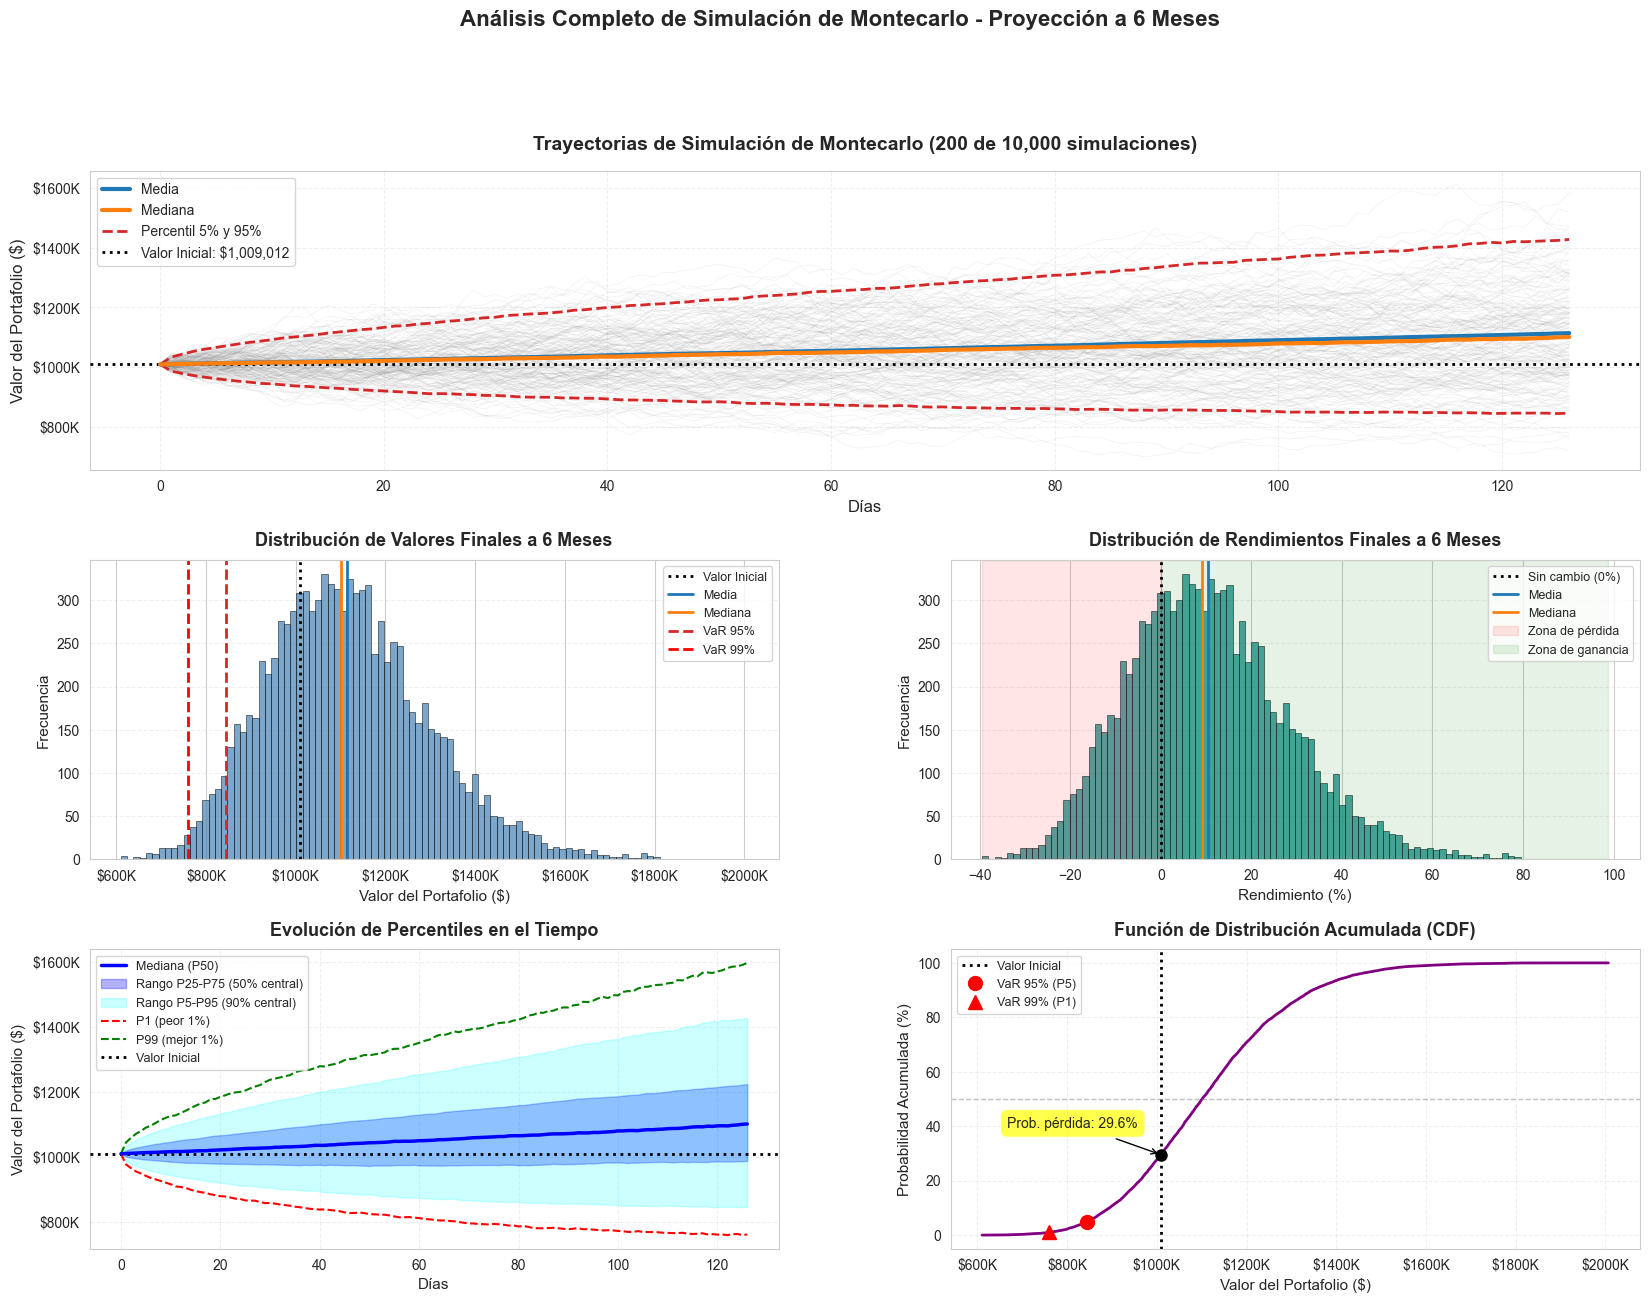

✅ Visualización completada.


In [205]:
# ============================================================================
# VISUALIZACIÓN DE LAS SIMULACIONES DE MONTECARLO
# ============================================================================

print("Generando visualizaciones de la simulación de Montecarlo...")

# Crear figura con 6 subplots
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.25)

# Colores
color_mean = '#1f77b4'
color_median = '#ff7f0e'
color_percentiles = '#d62728'
color_trajectories = '#7f7f7f'

# ============================================================================
# SUBPLOT 1: Todas las trayectorias simuladas
# ============================================================================
ax1 = fig.add_subplot(gs[0, :])

# Seleccionar algunas trayectorias para visualizar (todas serían muy denso)
num_trayectorias_mostrar = 200
indices_mostrar = np.random.choice(num_simulaciones, num_trayectorias_mostrar, replace=False)

for idx in indices_mostrar:
    ax1.plot(simulaciones[idx, :], color=color_trajectories, alpha=0.1, linewidth=0.5)

# Agregar trayectorias importantes
ax1.plot(simulaciones.mean(axis=0), color=color_mean, linewidth=3, label='Media', zorder=5)
ax1.plot(np.median(simulaciones, axis=0), color=color_median, linewidth=3, label='Mediana', zorder=5)

# Percentiles
ax1.plot(np.percentile(simulaciones, 5, axis=0), '--', color=color_percentiles, 
         linewidth=2, label='Percentil 5% y 95%', zorder=4)
ax1.plot(np.percentile(simulaciones, 95, axis=0), '--', color=color_percentiles, 
         linewidth=2, zorder=4)

# Línea del valor inicial
ax1.axhline(y=valor_inicial, color='black', linestyle=':', linewidth=2, 
            label=f'Valor Inicial: ${valor_inicial:,.0f}', zorder=3)

ax1.set_title(f'Trayectorias de Simulación de Montecarlo ({num_trayectorias_mostrar} de {num_simulaciones:,} simulaciones)', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Días', fontsize=12)
ax1.set_ylabel('Valor del Portafolio ($)', fontsize=12)
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# ============================================================================
# SUBPLOT 2: Distribución de valores finales (Histograma)
# ============================================================================
ax2 = fig.add_subplot(gs[1, 0])

# Histograma
ax2.hist(valores_finales, bins=100, color='steelblue', alpha=0.7, edgecolor='black', linewidth=0.5)

# Líneas verticales importantes
ax2.axvline(valor_inicial, color='black', linestyle=':', linewidth=2, label='Valor Inicial')
ax2.axvline(valor_final_promedio, color=color_mean, linestyle='-', linewidth=2, label='Media')
ax2.axvline(valor_final_mediana, color=color_median, linestyle='-', linewidth=2, label='Mediana')
ax2.axvline(valores_percentiles[1], color=color_percentiles, linestyle='--', linewidth=2, label='VaR 95%')
ax2.axvline(valores_percentiles[0], color='red', linestyle='--', linewidth=2, label='VaR 99%')

ax2.set_title('Distribución de Valores Finales a 6 Meses', fontsize=13, fontweight='bold', pad=10)
ax2.set_xlabel('Valor del Portafolio ($)', fontsize=11)
ax2.set_ylabel('Frecuencia', fontsize=11)
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# ============================================================================
# SUBPLOT 3: Distribución de rendimientos finales
# ============================================================================
ax3 = fig.add_subplot(gs[1, 1])

# Histograma de rendimientos
ax3.hist(rendimientos_finales * 100, bins=100, color='teal', alpha=0.7, edgecolor='black', linewidth=0.5)

# Líneas verticales
ax3.axvline(0, color='black', linestyle=':', linewidth=2, label='Sin cambio (0%)')
ax3.axvline(rendimiento_final_promedio * 100, color=color_mean, linestyle='-', linewidth=2, label='Media')
ax3.axvline(rendimiento_final_mediana * 100, color=color_median, linestyle='-', linewidth=2, label='Mediana')

# Sombrear zonas de pérdida y ganancia
ax3.axvspan(rendimientos_finales.min()*100, 0, alpha=0.1, color='red', label='Zona de pérdida')
ax3.axvspan(0, rendimientos_finales.max()*100, alpha=0.1, color='green', label='Zona de ganancia')

ax3.set_title('Distribución de Rendimientos Finales a 6 Meses', fontsize=13, fontweight='bold', pad=10)
ax3.set_xlabel('Rendimiento (%)', fontsize=11)
ax3.set_ylabel('Frecuencia', fontsize=11)
ax3.legend(loc='best', fontsize=9)
ax3.grid(True, alpha=0.3, axis='y', linestyle='--')

# ============================================================================
# SUBPLOT 4: Evolución de percentiles clave
# ============================================================================
ax4 = fig.add_subplot(gs[2, 0])

# Calcular percentiles para cada día
percentil_1 = np.percentile(simulaciones, 1, axis=0)
percentil_5 = np.percentile(simulaciones, 5, axis=0)
percentil_25 = np.percentile(simulaciones, 25, axis=0)
percentil_50 = np.percentile(simulaciones, 50, axis=0)
percentil_75 = np.percentile(simulaciones, 75, axis=0)
percentil_95 = np.percentile(simulaciones, 95, axis=0)
percentil_99 = np.percentile(simulaciones, 99, axis=0)

dias = np.arange(dias_proyeccion + 1)

# Graficar percentiles
ax4.plot(dias, percentil_50, color='blue', linewidth=2.5, label='Mediana (P50)', zorder=5)
ax4.fill_between(dias, percentil_25, percentil_75, alpha=0.3, color='blue', label='Rango P25-P75 (50% central)')
ax4.fill_between(dias, percentil_5, percentil_95, alpha=0.2, color='cyan', label='Rango P5-P95 (90% central)')
ax4.plot(dias, percentil_1, '--', color='red', linewidth=1.5, label='P1 (peor 1%)', zorder=4)
ax4.plot(dias, percentil_99, '--', color='green', linewidth=1.5, label='P99 (mejor 1%)', zorder=4)

# Línea del valor inicial
ax4.axhline(y=valor_inicial, color='black', linestyle=':', linewidth=2, label='Valor Inicial', zorder=3)

ax4.set_title('Evolución de Percentiles en el Tiempo', fontsize=13, fontweight='bold', pad=10)
ax4.set_xlabel('Días', fontsize=11)
ax4.set_ylabel('Valor del Portafolio ($)', fontsize=11)
ax4.legend(loc='best', fontsize=9)
ax4.grid(True, alpha=0.3, linestyle='--')
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# ============================================================================
# SUBPLOT 5: Probabilidades acumuladas
# ============================================================================
ax5 = fig.add_subplot(gs[2, 1])

# Función de distribución acumulada (CDF)
valores_ordenados = np.sort(valores_finales)
probabilidad_acumulada = np.arange(1, len(valores_ordenados) + 1) / len(valores_ordenados)

ax5.plot(valores_ordenados, probabilidad_acumulada * 100, color='purple', linewidth=2)

# Marcar puntos importantes
ax5.axvline(valor_inicial, color='black', linestyle=':', linewidth=2, label='Valor Inicial')
ax5.axhline(50, color='gray', linestyle='--', linewidth=1, alpha=0.5)

# Marcar VaR
ax5.plot(valores_percentiles[1], 5, 'ro', markersize=10, label='VaR 95% (P5)')
ax5.plot(valores_percentiles[0], 1, 'r^', markersize=10, label='VaR 99% (P1)')

# Anotar probabilidad de pérdida
prob_perdida_pos = np.searchsorted(valores_ordenados, valor_inicial)
prob_perdida_pct = prob_perdida_pos / len(valores_ordenados) * 100
ax5.plot(valor_inicial, prob_perdida_pct, 'ko', markersize=8)
ax5.annotate(f'Prob. pérdida: {prob_perdida_pct:.1f}%', 
             xy=(valor_inicial, prob_perdida_pct),
             xytext=(valor_inicial * 0.95, prob_perdida_pct + 10),
             fontsize=10, ha='right',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='black'))

ax5.set_title('Función de Distribución Acumulada (CDF)', fontsize=13, fontweight='bold', pad=10)
ax5.set_xlabel('Valor del Portafolio ($)', fontsize=11)
ax5.set_ylabel('Probabilidad Acumulada (%)', fontsize=11)
ax5.legend(loc='best', fontsize=9)
ax5.grid(True, alpha=0.3, linestyle='--')
ax5.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.suptitle('Análisis Completo de Simulación de Montecarlo - Proyección a 6 Meses', 
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

print("✅ Visualización completada.")

ANÁLISIS DE ESCENARIOS EXTREMOS

🏆 MEJOR ESCENARIO:
   Valor inicial:                   $1,009,012.05
   Valor final:                     $2,006,340.62
   Ganancia:                        $997,328.57
   Rendimiento:                     +98.84%

😐 ESCENARIO MEDIANO (típico):
   Valor inicial:                   $1,009,012.05
   Valor final:                     $1,100,826.64
   Cambio:                          $91,814.59
   Rendimiento:                     +9.10%

💀 PEOR ESCENARIO:
   Valor inicial:                   $1,009,012.05
   Valor final:                     $610,565.66
   Pérdida:                         $-398,446.39
   Rendimiento:                     -39.49%


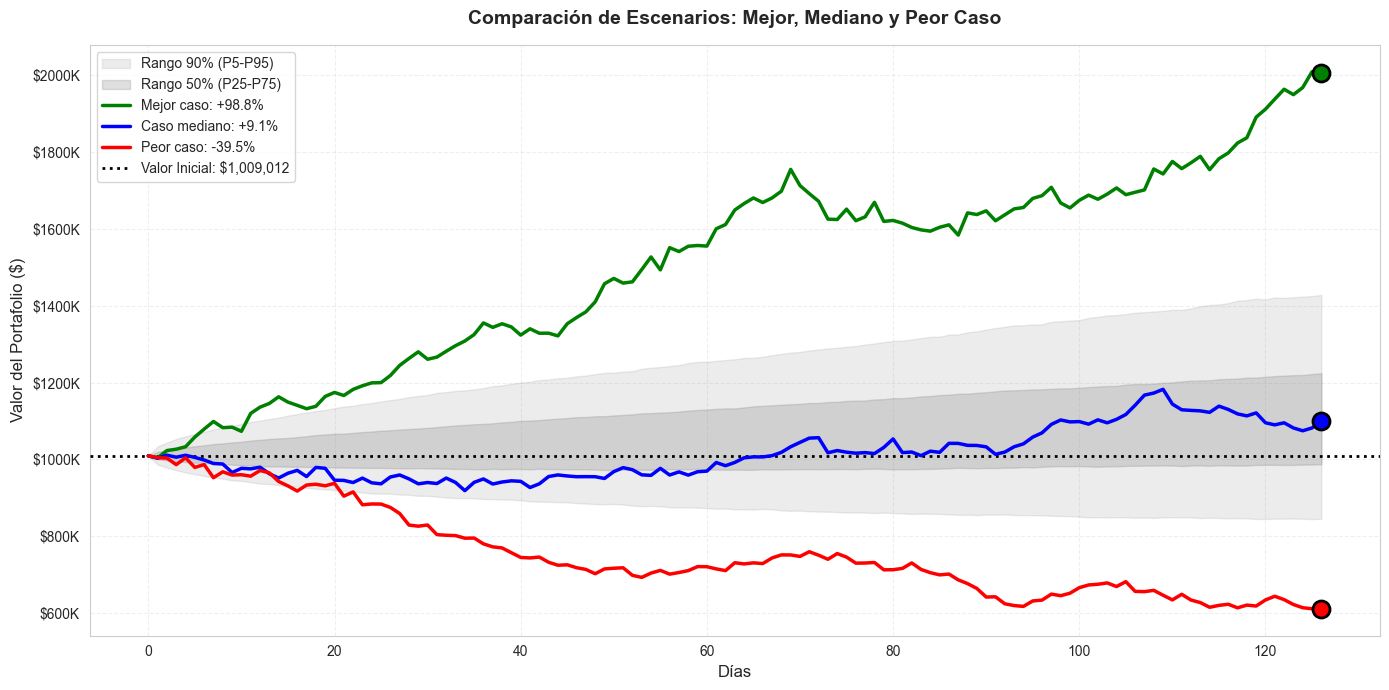


💡 INTERPRETACIÓN DE LOS ESCENARIOS:

La simulación de Montecarlo genera 10,000 posibles trayectorias del portafolio
basándose en los parámetros históricos (rendimiento promedio y volatilidad).

🔵 ESCENARIO MEDIANO (más probable):
   → Es el resultado típico/esperado
   → 50% de las simulaciones están por encima y 50% por debajo
   → Representa el comportamiento más común del portafolio

🟢 MEJOR ESCENARIO (optimista):
   → El resultado más favorable de todas las simulaciones
   → Muy poco probable (~1 en 10,000)
   → Representa una secuencia excepcional de buenos rendimientos

🔴 PEOR ESCENARIO (pesimista):
   → El resultado más desfavorable de todas las simulaciones
   → Muy poco probable (~1 en 10,000)
   → Representa una secuencia excepcional de malos rendimientos

📊 BANDAS DE CONFIANZA:
   → El área gris oscura (P25-P75) contiene el 50% central de resultados
   → El área gris clara (P5-P95) contiene el 90% de resultados esperados
   → Solo 5% de casos caen fuera de estas bandas en c

In [206]:
# ============================================================================
# ANÁLISIS DE ESCENARIOS - MEJORES Y PEORES CASOS
# ============================================================================

print("="*80)
print("ANÁLISIS DE ESCENARIOS EXTREMOS")
print("="*80)

# Identificar mejores y peores trayectorias
idx_mejor = valores_finales.argmax()
idx_peor = valores_finales.argmin()
idx_mediana = np.argmin(np.abs(valores_finales - valor_final_mediana))

mejor_trayectoria = simulaciones[idx_mejor, :]
peor_trayectoria = simulaciones[idx_peor, :]
trayectoria_mediana = simulaciones[idx_mediana, :]

# Calcular rendimientos de estas trayectorias
rendimiento_mejor = (mejor_trayectoria[-1] - valor_inicial) / valor_inicial
rendimiento_peor = (peor_trayectoria[-1] - valor_inicial) / valor_inicial
rendimiento_mediana = (trayectoria_mediana[-1] - valor_inicial) / valor_inicial

print(f"\n🏆 MEJOR ESCENARIO:")
print(f"   Valor inicial:                   ${valor_inicial:,.2f}")
print(f"   Valor final:                     ${mejor_trayectoria[-1]:,.2f}")
print(f"   Ganancia:                        ${mejor_trayectoria[-1] - valor_inicial:,.2f}")
print(f"   Rendimiento:                     {rendimiento_mejor*100:+.2f}%")

print(f"\n😐 ESCENARIO MEDIANO (típico):")
print(f"   Valor inicial:                   ${valor_inicial:,.2f}")
print(f"   Valor final:                     ${trayectoria_mediana[-1]:,.2f}")
print(f"   Cambio:                          ${trayectoria_mediana[-1] - valor_inicial:,.2f}")
print(f"   Rendimiento:                     {rendimiento_mediana*100:+.2f}%")

print(f"\n💀 PEOR ESCENARIO:")
print(f"   Valor inicial:                   ${valor_inicial:,.2f}")
print(f"   Valor final:                     ${peor_trayectoria[-1]:,.2f}")
print(f"   Pérdida:                         ${peor_trayectoria[-1] - valor_inicial:,.2f}")
print(f"   Rendimiento:                     {rendimiento_peor*100:+.2f}%")

# Visualizar escenarios
fig, ax = plt.subplots(figsize=(14, 7))

dias = np.arange(dias_proyeccion + 1)

# Graficar bandas de confianza primero
ax.fill_between(dias, percentil_5, percentil_95, alpha=0.15, color='gray', label='Rango 90% (P5-P95)')
ax.fill_between(dias, percentil_25, percentil_75, alpha=0.25, color='gray', label='Rango 50% (P25-P75)')

# Graficar trayectorias específicas
ax.plot(dias, mejor_trayectoria, color='green', linewidth=2.5, label=f'Mejor caso: {rendimiento_mejor*100:+.1f}%', zorder=5)
ax.plot(dias, trayectoria_mediana, color='blue', linewidth=2.5, label=f'Caso mediano: {rendimiento_mediana*100:+.1f}%', zorder=5)
ax.plot(dias, peor_trayectoria, color='red', linewidth=2.5, label=f'Peor caso: {rendimiento_peor*100:+.1f}%', zorder=5)

# Línea del valor inicial
ax.axhline(y=valor_inicial, color='black', linestyle=':', linewidth=2, label=f'Valor Inicial: ${valor_inicial:,.0f}', zorder=3)

# Marcar puntos finales
ax.scatter([dias_proyeccion], [mejor_trayectoria[-1]], color='green', s=150, marker='o', zorder=6, edgecolor='black', linewidth=2)
ax.scatter([dias_proyeccion], [trayectoria_mediana[-1]], color='blue', s=150, marker='o', zorder=6, edgecolor='black', linewidth=2)
ax.scatter([dias_proyeccion], [peor_trayectoria[-1]], color='red', s=150, marker='o', zorder=6, edgecolor='black', linewidth=2)

ax.set_title('Comparación de Escenarios: Mejor, Mediano y Peor Caso', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Días', fontsize=12)
ax.set_ylabel('Valor del Portafolio ($)', fontsize=12)
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3, linestyle='--')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("💡 INTERPRETACIÓN DE LOS ESCENARIOS:")
print("="*80)
print(f"""
La simulación de Montecarlo genera {num_simulaciones:,} posibles trayectorias del portafolio
basándose en los parámetros históricos (rendimiento promedio y volatilidad).

🔵 ESCENARIO MEDIANO (más probable):
   → Es el resultado típico/esperado
   → 50% de las simulaciones están por encima y 50% por debajo
   → Representa el comportamiento más común del portafolio

🟢 MEJOR ESCENARIO (optimista):
   → El resultado más favorable de todas las simulaciones
   → Muy poco probable (~1 en {num_simulaciones:,})
   → Representa una secuencia excepcional de buenos rendimientos

🔴 PEOR ESCENARIO (pesimista):
   → El resultado más desfavorable de todas las simulaciones
   → Muy poco probable (~1 en {num_simulaciones:,})
   → Representa una secuencia excepcional de malos rendimientos

📊 BANDAS DE CONFIANZA:
   → El área gris oscura (P25-P75) contiene el 50% central de resultados
   → El área gris clara (P5-P95) contiene el 90% de resultados esperados
   → Solo 5% de casos caen fuera de estas bandas en cada extremo
""")

In [207]:
# ============================================================================
# TABLA RESUMEN DE PROBABILIDADES POR RANGOS
# ============================================================================

print("="*80)
print("PROBABILIDADES DE RESULTADOS POR RANGOS")
print("="*80)

# Definir rangos de rendimiento
rangos = [
    (-float('inf'), -0.20, "Pérdida > 20%", "💀"),
    (-0.20, -0.10, "Pérdida 10-20%", "🔴"),
    (-0.10, -0.05, "Pérdida 5-10%", "🟠"),
    (-0.05, 0.00, "Pérdida 0-5%", "🟡"),
    (0.00, 0.05, "Ganancia 0-5%", "🟢"),
    (0.05, 0.10, "Ganancia 5-10%", "🟢"),
    (0.10, 0.20, "Ganancia 10-20%", "💚"),
    (0.20, float('inf'), "Ganancia > 20%", "🚀"),
]

print(f"\n{'Rango':<20} {'Emoji':<8} {'Simulaciones':<15} {'Probabilidad':<15}")
print("-" * 80)

for i, (limite_inf, limite_sup, descripcion, emoji) in enumerate(rangos):
    # Contar simulaciones en este rango
    if limite_sup == float('inf'):
        count = (rendimientos_finales >= limite_inf).sum()
    elif limite_inf == -float('inf'):
        count = (rendimientos_finales < limite_sup).sum()
    else:
        count = ((rendimientos_finales >= limite_inf) & (rendimientos_finales < limite_sup)).sum()
    
    probabilidad = count / num_simulaciones * 100
    
    print(f"{descripcion:<20} {emoji:<8} {count:<15,} {probabilidad:>6.2f}%")

print("-" * 80)
print(f"{'TOTAL':<20} {'✅':<8} {num_simulaciones:<15,} {100.00:>6.2f}%")

# Calcular valor esperado (Expected Value)
valor_esperado = valores_finales.mean()
ganancia_esperada = valor_esperado - valor_inicial
rendimiento_esperado = ganancia_esperada / valor_inicial

print(f"\n💰 VALOR ESPERADO DEL PORTAFOLIO A 6 MESES:")
print(f"   Valor inicial:                   ${valor_inicial:,.2f}")
print(f"   Valor esperado (promedio):       ${valor_esperado:,.2f}")
print(f"   Ganancia/Pérdida esperada:       ${ganancia_esperada:,.2f}")
print(f"   Rendimiento esperado:            {rendimiento_esperado*100:+.2f}%")

# Confidence intervals
ci_90_lower = valores_percentiles[1]  # Percentil 5%
ci_90_upper = valores_percentiles[-2]  # Percentil 95%
ci_95_lower = np.percentile(valores_finales, 2.5)
ci_95_upper = np.percentile(valores_finales, 97.5)

print(f"\n📊 INTERVALOS DE CONFIANZA:")
print(f"   90% de confianza:")
print(f"      → Entre ${ci_90_lower:,.2f} y ${ci_90_upper:,.2f}")
print(f"      → Rendimientos: {(ci_90_lower/valor_inicial - 1)*100:+.2f}% a {(ci_90_upper/valor_inicial - 1)*100:+.2f}%")
print(f"   95% de confianza:")
print(f"      → Entre ${ci_95_lower:,.2f} y ${ci_95_upper:,.2f}")
print(f"      → Rendimientos: {(ci_95_lower/valor_inicial - 1)*100:+.2f}% a {(ci_95_upper/valor_inicial - 1)*100:+.2f}%")

print("\n" + "="*80)

PROBABILIDADES DE RESULTADOS POR RANGOS

Rango                Emoji    Simulaciones    Probabilidad   
--------------------------------------------------------------------------------
Pérdida > 20%        💀        265               2.65%
Pérdida 10-20%       🔴        906               9.06%
Pérdida 5-10%        🟠        779               7.79%
Pérdida 0-5%         🟡        1,006            10.06%
Ganancia 0-5%        🟢        1,099            10.99%
Ganancia 5-10%       🟢        1,131            11.31%
Ganancia 10-20%      💚        2,071            20.71%
Ganancia > 20%       🚀        2,743            27.43%
--------------------------------------------------------------------------------
TOTAL                ✅        10,000          100.00%

💰 VALOR ESPERADO DEL PORTAFOLIO A 6 MESES:
   Valor inicial:                   $1,009,012.05
   Valor esperado (promedio):       $1,113,817.53
   Ganancia/Pérdida esperada:       $104,805.48
   Rendimiento esperado:            +10.39%

📊 INTERVALOS

## 17. Resumen Final del Portafolio - Métricas por Acción y del Portafolio

Análisis completo con métricas individuales por acción y métricas agregadas del portafolio.

### 📝 PASO 1: Define los Precios de Compra

**EDITA ESTA CELDA** con los precios a los que compraste cada acción:

In [208]:
# ============================================================================
# PRECIOS DE COMPRA DE CADA ACCIÓN
# ============================================================================
# ⚠️  EDITA ESTOS VALORES CON TUS PRECIOS REALES DE COMPRA

precios_compra = {
    'SIEGn.DE Usd': 272.42,
    'AAPL.O': 274.98,
    'LMT': 459.12,
    'MSFT.O': 498.36,
    'NVDA.O': 185.49,    
    'GOOGL.O': 277.16,
    'INTC.O': 41.4,
    '005930.KS Usd': 71.48,
    'RY': 156.62,
    'JPM': 311.31
}

print("✅ Precios de compra definidos:")
for accion, precio in precios_compra.items():
    print(f"   {accion:10s}: ${precio:>8.2f}")
    
print(f"\n💰 VALOR INICIAL DEL PORTAFOLIO: $1,000,000.00")

✅ Precios de compra definidos:
   SIEGn.DE Usd: $  272.42
   AAPL.O    : $  274.98
   LMT       : $  459.12
   MSFT.O    : $  498.36
   NVDA.O    : $  185.49
   GOOGL.O   : $  277.16
   INTC.O    : $   41.40
   005930.KS Usd: $   71.48
   RY        : $  156.62
   JPM       : $  311.31

💰 VALOR INICIAL DEL PORTAFOLIO: $1,000,000.00


### 📊 PASO 2: Cálculo de Métricas por Acción

In [209]:
# ============================================================================
# CÁLCULO DE MÉTRICAS POR ACCIÓN
# ============================================================================

import pandas as pd
import numpy as np

print("="*100)
print("MÉTRICAS INDIVIDUALES POR ACCIÓN")
print("="*100)

# Obtener precios actuales (más recientes) de cada acción
precios_actuales = {}
for accion in acciones.keys():
    precios_actuales[accion] = df[accion].iloc[0]  # Precio más reciente

# Calcular rendimientos históricos de cada acción
rendimientos_por_accion = {}
varianza_por_accion = {}
desviacion_std_por_accion = {}
rendimiento_esperado_por_accion = {}

for accion in acciones.keys():
    # Calcular rendimientos diarios
    rend = df[accion].pct_change().dropna()
    rendimientos_por_accion[accion] = rend
    
    # Estadísticas
    rendimiento_esperado_por_accion[accion] = rend.mean() * 252  # Anualizado
    varianza_por_accion[accion] = rend.var() * 252  # Anualizada
    desviacion_std_por_accion[accion] = rend.std() * np.sqrt(252)  # Anualizada

# Calcular P&L acumulado por acción desde el inicio
pnl_por_accion = {}
for accion in acciones.keys():
    precio_inicial = df[accion].iloc[-1]  # Precio más antiguo (inicio)
    precio_final = df[accion].iloc[0]     # Precio más reciente (actual)
    num_acciones = acciones[accion]
    pnl_por_accion[accion] = (precio_final - precio_inicial) * num_acciones

# Crear DataFrame con todas las métricas
metricas_acciones = []

for accion in acciones.keys():
    precio_compra = precios_compra[accion]
    precio_actual = precios_actuales[accion]
    num_acciones = acciones[accion]
    
    # Rendimiento nominal y porcentual
    rendimiento_nominal = precio_actual - precio_compra
    rendimiento_pct = (precio_actual / precio_compra - 1) * 100
    
    # Valor de la posición
    valor_compra = precio_compra * num_acciones
    valor_actual = precio_actual * num_acciones
    pnl_posicion = valor_actual - valor_compra
    
    metricas_acciones.append({
        'Acción': accion,
        'Cantidad': num_acciones,
        'Precio Compra': precio_compra,
        'Precio Actual': precio_actual,
        'Rend. Nominal ($)': rendimiento_nominal,
        'Rend. % Actual': rendimiento_pct,
        'Rend. Esperado % (anual)': rendimiento_esperado_por_accion[accion] * 100,
        'Varianza (anual)': varianza_por_accion[accion],
        'Desv. Est. % (anual)': desviacion_std_por_accion[accion] * 100,
        'Valor Compra': valor_compra,
        'Valor Actual': valor_actual,
        'P&L Posición': pnl_posicion,
        'P&L Histórico': pnl_por_accion[accion]
    })

df_metricas_acciones = pd.DataFrame(metricas_acciones)

# Formatear y mostrar la tabla
print("\n📊 TABLA COMPLETA DE MÉTRICAS POR ACCIÓN:")
print("="*100)

# Configurar pandas para mostrar mejor
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(df_metricas_acciones.to_string(index=False))

print("\n" + "="*100)

# Mostrar resumen estadístico
print("\n📈 RESUMEN ESTADÍSTICO:")
print(f"   Acción con MAYOR rendimiento actual:     {df_metricas_acciones.loc[df_metricas_acciones['Rend. % Actual'].idxmax(), 'Acción']} "
      f"({df_metricas_acciones['Rend. % Actual'].max():.2f}%)")
print(f"   Acción con MENOR rendimiento actual:     {df_metricas_acciones.loc[df_metricas_acciones['Rend. % Actual'].idxmin(), 'Acción']} "
      f"({df_metricas_acciones['Rend. % Actual'].min():.2f}%)")
print(f"   Acción con MAYOR volatilidad:            {df_metricas_acciones.loc[df_metricas_acciones['Desv. Est. % (anual)'].idxmax(), 'Acción']} "
      f"({df_metricas_acciones['Desv. Est. % (anual)'].max():.2f}%)")
print(f"   Acción con MENOR volatilidad:            {df_metricas_acciones.loc[df_metricas_acciones['Desv. Est. % (anual)'].idxmin(), 'Acción']} "
      f"({df_metricas_acciones['Desv. Est. % (anual)'].min():.2f}%)")
print(f"   Acción con MAYOR P&L:                    {df_metricas_acciones.loc[df_metricas_acciones['P&L Posición'].idxmax(), 'Acción']} "
      f"(${df_metricas_acciones['P&L Posición'].max():,.2f})")
print(f"   Acción con MENOR P&L:                    {df_metricas_acciones.loc[df_metricas_acciones['P&L Posición'].idxmin(), 'Acción']} "
      f"(${df_metricas_acciones['P&L Posición'].min():,.2f})")

print("\n" + "="*100)

MÉTRICAS INDIVIDUALES POR ACCIÓN

📊 TABLA COMPLETA DE MÉTRICAS POR ACCIÓN:
       Acción  Cantidad  Precio Compra  Precio Actual  Rend. Nominal ($)  Rend. % Actual  Rend. Esperado % (anual)  Varianza (anual)  Desv. Est. % (anual)  Valor Compra  Valor Actual  P&L Posición  P&L Histórico
 SIEGn.DE Usd       369         272.42     263.734986          -8.685014       -3.188097                 -4.740240          0.105437             32.471126     100522.98      97318.21      -3204.77   33468.504592
       AAPL.O       528         274.98     284.060000           9.080000        3.302058                -11.238683          0.079749             28.239877     145189.44     149983.68       4794.24   71021.280000
          LMT       217         459.12     439.552765         -19.567235       -4.261900                 -3.027331          0.053478             23.125209      99629.04      95382.95      -4246.09   20233.680000
       MSFT.O       200         498.36     489.095000          -9.265000     

### 💼 PASO 3: Métricas del Portafolio Completo

In [210]:
# ============================================================================
# MÉTRICAS DEL PORTAFOLIO COMPLETO
# ============================================================================

print("="*100)
print("MÉTRICAS DEL PORTAFOLIO COMPLETO")
print("="*100)

# Valores del portafolio
valor_inicial_portafolio = 1_000_000.00  # Valor inicial exacto
valor_actual_portafolio = df['V0'].iloc[0]  # Valor actual más reciente
valor_historico_inicial = df['V0'].iloc[-1]  # Valor al inicio de los datos históricos

# Rendimientos del portafolio
rendimiento_nominal_portafolio = valor_actual_portafolio - valor_inicial_portafolio
rendimiento_pct_portafolio = (valor_actual_portafolio / valor_inicial_portafolio - 1) * 100

# Rendimiento esperado del portafolio (promedio histórico anualizado)
rendimiento_esperado_portafolio = rendimientos_portafolio.mean() * 252 * 100

# Volatilidad del portafolio (ya calculada anteriormente)
volatilidad_portafolio_anual = volatilidad_diaria * np.sqrt(252) * 100

# P&L del portafolio
pnl_total_portafolio = df_metricas_acciones['P&L Posición'].sum()

# Crear resumen del portafolio
metricas_portafolio = {
    'Métrica': [
        'Valor Inicial',
        'Valor Actual',
        'Rendimiento Nominal ($)',
        'Rendimiento %',
        'Rendimiento Esperado % (anual)',
        'Volatilidad % (anual)',
        'Varianza (anual)',
        'P&L Total',
        '',
        '--- MÉTRICAS DE RIESGO ---',
        'VaR Paramétrico 95%',
        'VaR Paramétrico 99%',
        'VaR Histórico 95%',
        'VaR Histórico 99%',
        'CVaR Portafolio 95%',
        'CVaR Portafolio 99%',
        '',
        '--- MÉTRICAS DE PERFORMANCE ---',
        'Sharpe Ratio (anual)',
        'Sortino Ratio (anual)',
        'Tracking Error vs S&P500',
        'Information Ratio',
        'Correlación con S&P500',
        '',
        '--- SIMULACIÓN MONTECARLO (6 meses) ---',
        'Valor Esperado (promedio)',
        'VaR 95% Simulado',
        'VaR 99% Simulado',
        'CVaR 95% Simulado',
        'CVaR 99% Simulado',
        'Probabilidad de Ganancia',
        'Probabilidad de Pérdida'
    ],
    'Valor': [
        f'${valor_inicial_portafolio:,.2f}',
        f'${valor_actual_portafolio:,.2f}',
        f'${rendimiento_nominal_portafolio:,.2f}',
        f'{rendimiento_pct_portafolio:+.2f}%',
        f'{rendimiento_esperado_portafolio:+.2f}%',
        f'{volatilidad_portafolio_anual:.2f}%',
        f'{(volatilidad_diaria**2 * 252):.6f}',
        f'${pnl_total_portafolio:,.2f}',
        '',
        '',
        f'${VaR_parametrico_5pct:,.2f}',
        f'${VaR_parametrico_1pct:,.2f}',
        f'${VaR_hist_5pct:,.2f}',
        f'${VaR_hist_1pct:,.2f}',
        f'${CVaR_portafolio_5pct:,.2f}',
        f'${CVaR_portafolio_1pct:,.2f}',
        '',
        '',
        f'{sharpe_ratio_anual:.4f}',
        f'{sortino_ratio_anual:.4f}',
        f'{tracking_error_anualizado:.4f}',
        f'{information_ratio_anualizado:.4f}',
        f'{correlacion:.4f}',
        '',
        '',
        f'${valor_esperado:,.2f}',
        f'${var_95_sim:,.2f}',
        f'${var_99_sim:,.2f}',
        f'${cvar_95_sim:,.2f}',
        f'${cvar_99_sim:,.2f}',
        f'{prob_ganancia:.2f}%',
        f'{prob_perdida:.2f}%'
    ]
}

df_metricas_portafolio = pd.DataFrame(metricas_portafolio)

print("\n💼 RESUMEN COMPLETO DEL PORTAFOLIO:")
print("="*100)
print(df_metricas_portafolio.to_string(index=False))

print("\n" + "="*100)

# Análisis adicional
print("\n🎯 ANÁLISIS CONSOLIDADO:")
print(f"   Número total de acciones:                {len(acciones)}")
print(f"   Número total de unidades:                {sum(acciones.values()):,}")
print(f"   Valor promedio por acción:               ${valor_actual_portafolio / sum(acciones.values()):,.2f}")
print(f"   Peso promedio por ticker:                {100/len(acciones):.2f}%")
print(f"   ")
print(f"   Días de datos históricos:                {len(df)}")
print(f"   Período analizado:                       {df['Date'].iloc[-1]} a {df['Date'].iloc[0]}")
print(f"   ")
print(f"   Performance vs Inicial:                  {rendimiento_pct_portafolio:+.2f}%")
if rendimiento_pct_portafolio > 0:
    print(f"   ✅ El portafolio ha GANADO ${abs(rendimiento_nominal_portafolio):,.2f}")
else:
    print(f"   ❌ El portafolio ha PERDIDO ${abs(rendimiento_nominal_portafolio):,.2f}")

print("\n" + "="*100)

MÉTRICAS DEL PORTAFOLIO COMPLETO

💼 RESUMEN COMPLETO DEL PORTAFOLIO:
                                Métrica         Valor
                          Valor Inicial $1,000,000.00
                           Valor Actual $1,009,012.05
                Rendimiento Nominal ($)     $9,012.05
                          Rendimiento %        +0.90%
         Rendimiento Esperado % (anual)       +20.26%
                  Volatilidad % (anual)        22.51%
                       Varianza (anual)      0.050683
                              P&L Total    $10,952.73
                                                     
             --- MÉTRICAS DE RIESGO ---              
                    VaR Paramétrico 95%    $23,039.47
                    VaR Paramétrico 99%    $32,906.72
                      VaR Histórico 95%   $-12,497.08
                      VaR Histórico 99%   $-22,360.87
                    CVaR Portafolio 95%   $-20,278.48
                    CVaR Portafolio 99%   $-33,004.16
             

### 📋 PASO 4: Visualización Comparativa

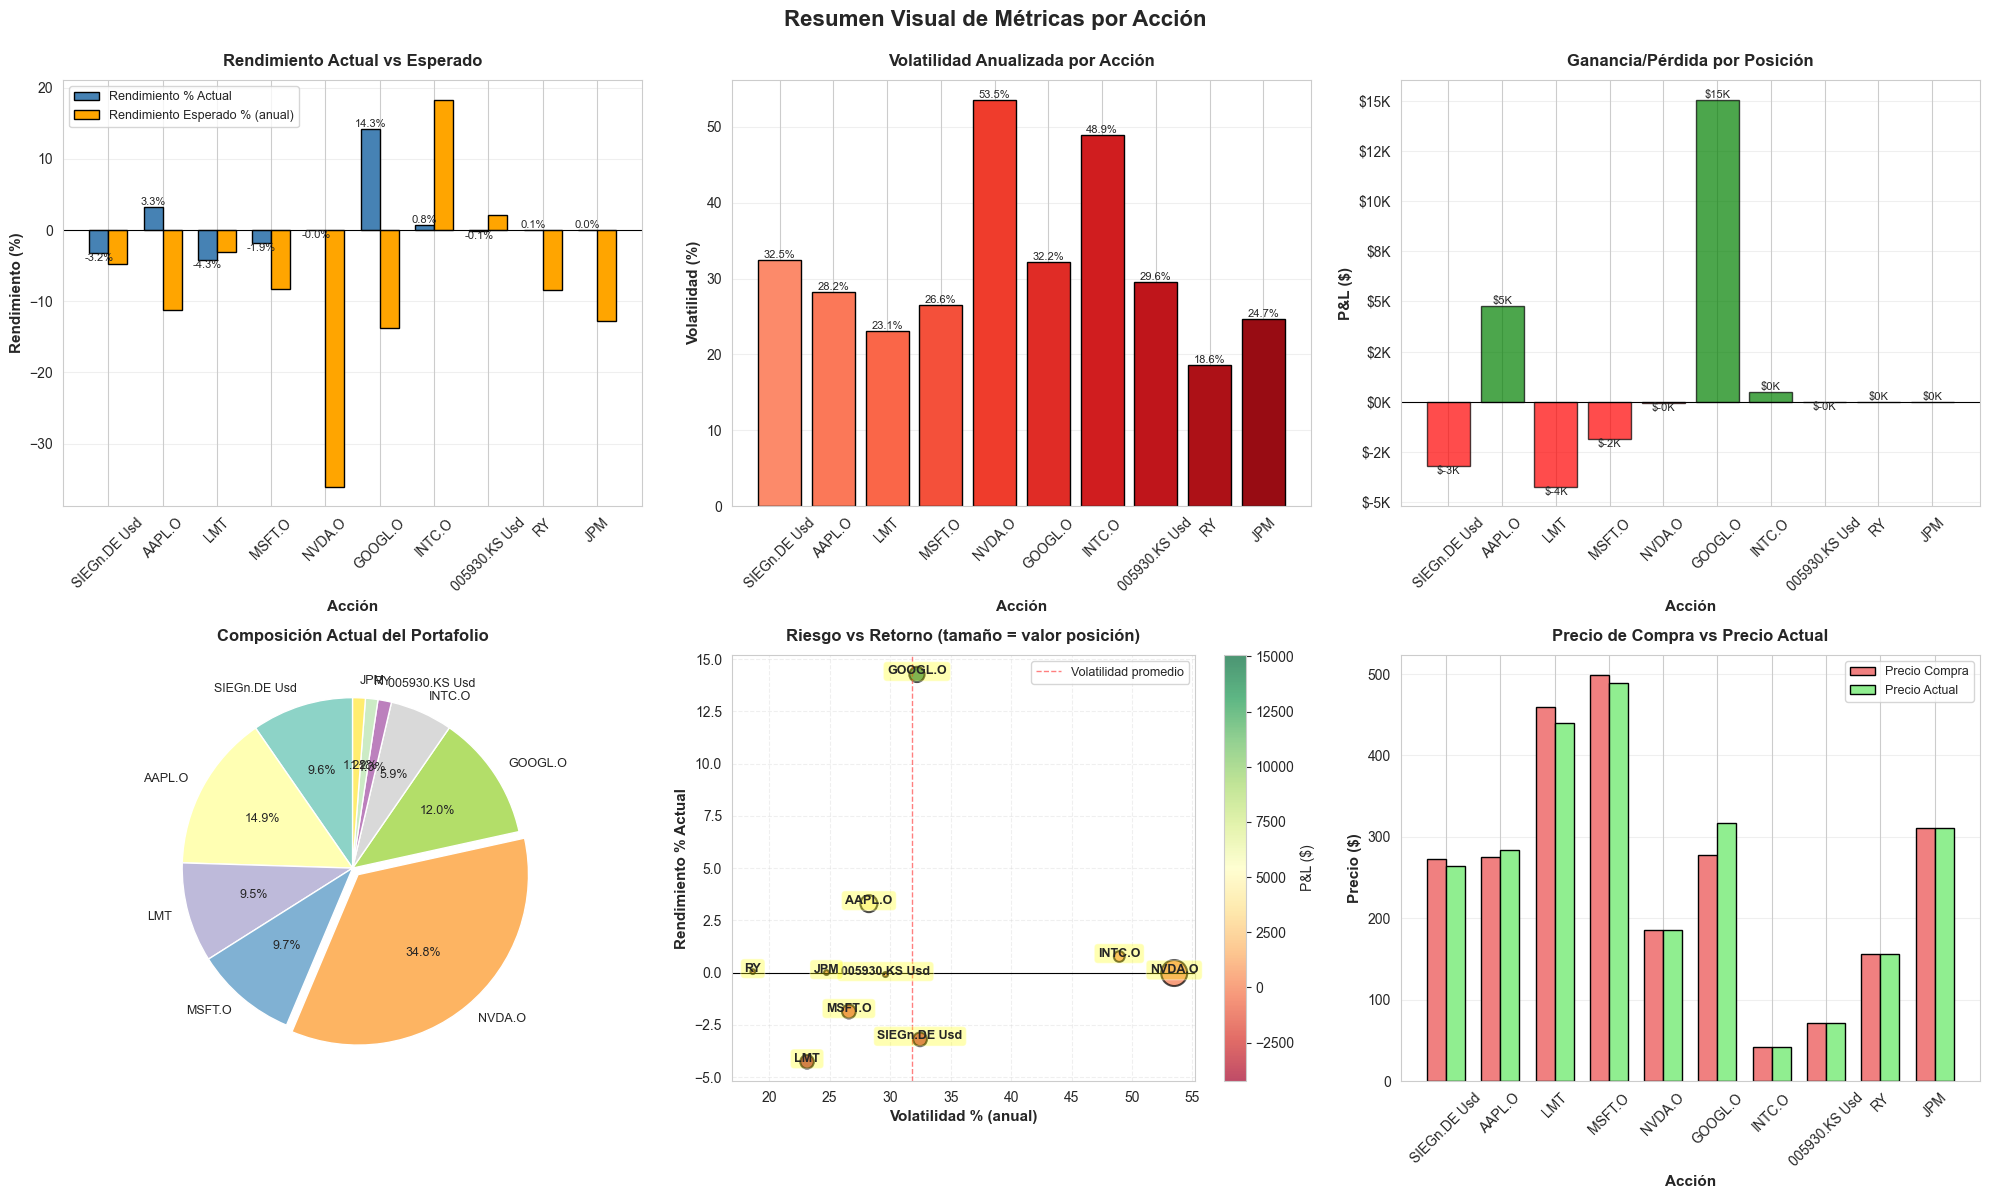

✅ Visualización completa generada.


In [211]:
# ============================================================================
# VISUALIZACIÓN COMPARATIVA DE MÉTRICAS
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Resumen Visual de Métricas por Acción', fontsize=16, fontweight='bold', y=0.995)

# ============================================================================
# 1. Rendimiento % Actual vs Esperado
# ============================================================================
ax1 = axes[0, 0]
x = np.arange(len(df_metricas_acciones))
width = 0.35

bars1 = ax1.bar(x - width/2, df_metricas_acciones['Rend. % Actual'], width, 
                label='Rendimiento % Actual', color='steelblue', edgecolor='black')
bars2 = ax1.bar(x + width/2, df_metricas_acciones['Rend. Esperado % (anual)'], width,
                label='Rendimiento Esperado % (anual)', color='orange', edgecolor='black')

ax1.set_xlabel('Acción', fontsize=11, fontweight='bold')
ax1.set_ylabel('Rendimiento (%)', fontsize=11, fontweight='bold')
ax1.set_title('Rendimiento Actual vs Esperado', fontsize=12, fontweight='bold', pad=10)
ax1.set_xticks(x)
ax1.set_xticklabels(df_metricas_acciones['Acción'], rotation=45)
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3, axis='y')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# Anotar valores
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom' if height >= 0 else 'top', fontsize=8)

# ============================================================================
# 2. Desviación Estándar (Volatilidad)
# ============================================================================
ax2 = axes[0, 1]
colors = plt.cm.Reds(np.linspace(0.4, 0.9, len(df_metricas_acciones)))
bars = ax2.bar(df_metricas_acciones['Acción'], df_metricas_acciones['Desv. Est. % (anual)'],
               color=colors, edgecolor='black')

ax2.set_xlabel('Acción', fontsize=11, fontweight='bold')
ax2.set_ylabel('Volatilidad (%)', fontsize=11, fontweight='bold')
ax2.set_title('Volatilidad Anualizada por Acción', fontsize=12, fontweight='bold', pad=10)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Anotar valores
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

# ============================================================================
# 3. P&L por Posición
# ============================================================================
ax3 = axes[0, 2]
colors_pnl = ['green' if x >= 0 else 'red' for x in df_metricas_acciones['P&L Posición']]
bars = ax3.bar(df_metricas_acciones['Acción'], df_metricas_acciones['P&L Posición'],
               color=colors_pnl, edgecolor='black', alpha=0.7)

ax3.set_xlabel('Acción', fontsize=11, fontweight='bold')
ax3.set_ylabel('P&L ($)', fontsize=11, fontweight='bold')
ax3.set_title('Ganancia/Pérdida por Posición', fontsize=12, fontweight='bold', pad=10)
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3, axis='y')
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Anotar valores
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'${height/1000:.0f}K', ha='center', va='bottom' if height >= 0 else 'top', fontsize=8)

# ============================================================================
# 4. Composición del Portafolio (Valor Actual)
# ============================================================================
ax4 = axes[1, 0]
explode = [0.05 if i == df_metricas_acciones['Valor Actual'].idxmax() else 0 
           for i in range(len(df_metricas_acciones))]
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(df_metricas_acciones)))

wedges, texts, autotexts = ax4.pie(df_metricas_acciones['Valor Actual'], 
                                     labels=df_metricas_acciones['Acción'],
                                     autopct='%1.1f%%',
                                     explode=explode,
                                     colors=colors_pie,
                                     startangle=90,
                                     textprops={'fontsize': 9})

ax4.set_title('Composición Actual del Portafolio', fontsize=12, fontweight='bold', pad=10)

# ============================================================================
# 5. Riesgo vs Retorno (Scatter)
# ============================================================================
ax5 = axes[1, 1]
scatter = ax5.scatter(df_metricas_acciones['Desv. Est. % (anual)'], 
                      df_metricas_acciones['Rend. % Actual'],
                      s=df_metricas_acciones['Valor Actual'] / 1000,  # Tamaño proporcional al valor
                      c=df_metricas_acciones['P&L Posición'],
                      cmap='RdYlGn',
                      alpha=0.7,
                      edgecolors='black',
                      linewidth=1.5)

# Anotar cada punto
for idx, row in df_metricas_acciones.iterrows():
    ax5.annotate(row['Acción'], 
                 (row['Desv. Est. % (anual)'], row['Rend. % Actual']),
                 fontsize=9, ha='center', fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

ax5.set_xlabel('Volatilidad % (anual)', fontsize=11, fontweight='bold')
ax5.set_ylabel('Rendimiento % Actual', fontsize=11, fontweight='bold')
ax5.set_title('Riesgo vs Retorno (tamaño = valor posición)', fontsize=12, fontweight='bold', pad=10)
ax5.grid(True, alpha=0.3, linestyle='--')
ax5.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax5.axvline(x=df_metricas_acciones['Desv. Est. % (anual)'].mean(), 
            color='red', linestyle='--', linewidth=1, alpha=0.5, label='Volatilidad promedio')
ax5.legend(fontsize=9)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax5)
cbar.set_label('P&L ($)', fontsize=10)

# ============================================================================
# 6. Comparación Precio Compra vs Actual
# ============================================================================
ax6 = axes[1, 2]
x = np.arange(len(df_metricas_acciones))
width = 0.35

bars1 = ax6.bar(x - width/2, df_metricas_acciones['Precio Compra'], width,
                label='Precio Compra', color='lightcoral', edgecolor='black')
bars2 = ax6.bar(x + width/2, df_metricas_acciones['Precio Actual'], width,
                label='Precio Actual', color='lightgreen', edgecolor='black')

ax6.set_xlabel('Acción', fontsize=11, fontweight='bold')
ax6.set_ylabel('Precio ($)', fontsize=11, fontweight='bold')
ax6.set_title('Precio de Compra vs Precio Actual', fontsize=12, fontweight='bold', pad=10)
ax6.set_xticks(x)
ax6.set_xticklabels(df_metricas_acciones['Acción'], rotation=45)
ax6.legend(fontsize=9)
ax6.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✅ Visualización completa generada.")

In [212]:
df

,Date,Día,NVDA.O,AAPL.O,LMT,MSFT.O,SIEGn.DE eur,SIEGn.DE Usd,GOOGL.O,INTC.O,EUR=,005930.KS Usd,RY,JPM,Valor Portafolio,Rendimiento portafolio,V0,P&L,Ranked_P&L,Rendimiento
0,2025-12-03,1,185.459831,284.06,439.552765,489.095,228.75,263.734986,316.70,41.72,1.1670,71.417072,156.698947,311.324359,1.009012e+06,0.009012,1.009012e+06,3915.597681,717.0,NaN
1,2025-12-02,2,181.460000,286.19,441.820000,490.000,227.30,264.190790,315.81,43.47,1.1623,70.417739,154.430000,307.880000,1.005539e+06,0.005539,1.005096e+06,12091.600792,989.0,0.003896
2,2025-12-01,3,179.920000,283.10,439.190000,486.740,226.20,262.618200,314.89,40.01,1.1610,68.495943,152.890000,308.920000,9.938712e+05,-0.006129,9.930049e+05,-1166.833228,428.0,0.012177
3,2025-11-28,4,177.000000,278.85,457.860000,492.010,228.30,264.713850,320.18,40.56,1.1595,68.485216,154.090000,313.080000,9.947866e+05,-0.005213,9.941717e+05,2220.308761,627.0,-0.001174
4,2025-11-26,5,180.260000,277.55,454.160000,485.500,228.10,264.459140,319.95,36.81,1.1594,69.867808,153.190000,307.640000,9.925966e+05,-0.007403,9.919514e+05,8398.626577,902.0,0.002238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,2021-09-17,1058,21.900000,146.06,340.980000,299.870,149.52,175.312200,140.80,54.26,1.1725,65.385495,100.120000,157.680000,NaN,NaN,4.744352e+05,-5543.246496,202.0,-0.023330
1058,2021-09-16,1059,22.240000,148.79,341.500000,305.220,149.78,176.201192,143.61,54.83,1.1764,64.755486,102.180000,158.090000,NaN,NaN,4.799785e+05,-951.641934,440.0,-0.011549
1059,2021-09-15,1060,22.340000,149.03,345.070000,304.820,146.72,173.349680,144.43,55.12,1.1815,66.024712,102.600000,158.160000,NaN,NaN,4.809301e+05,3266.449043,684.0,-0.001979
1060,2021-09-14,1061,22.240000,148.12,344.340000,299.790,147.84,174.480768,142.54,54.52,1.1802,65.345538,101.250000,157.070000,NaN,NaN,4.776637e+05,-635.282975,458.0,0.006838


## 18. Análisis del Portafolio Real vs S&P 500 (8 Sept - 3 Dic 2025)

Comparación del desempeño de tu portafolio completo (con todas las empresas y derivados) contra el S&P 500.

In [213]:
# ============================================================================
# PREPARAR DATOS DEL PORTAFOLIO REAL Y S&P 500
# ============================================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("="*100)
print("ANÁLISIS COMPARATIVO: PORTAFOLIO REAL vs S&P 500")
print("="*100)

# Verificar las columnas disponibles en df
print(f"\n📋 Columnas disponibles en el DataFrame:")
print(df.columns.tolist())

# Verificar que las nuevas columnas existen
if 'Valor Portafolio' not in df.columns or 'Rendimiento portafolio' not in df.columns:
    print("\n⚠️  ERROR: Las columnas 'Valor Portafolio' y/o 'Rendimiento portafolio' no se encuentran en el DataFrame.")
    print("Por favor verifica que el archivo Excel tenga estas columnas correctamente nombradas.")
else:
    print("\n✅ Columnas del portafolio real encontradas correctamente.")
    
    # Filtrar datos desde el 8 de septiembre de 2025
    fecha_inicio_portafolio = '2025-09-08'
    
    # Convertir fecha a datetime si no lo es
    if df['Date'].dtype != 'datetime64[ns]':
        df['Date'] = pd.to_datetime(df['Date'])
    
    # Filtrar datos
    df_portafolio_real = df[df['Date'] >= fecha_inicio_portafolio].copy()
    df_portafolio_real = df_portafolio_real.sort_values('Date').reset_index(drop=True)
    
    print(f"\n📅 Período de análisis del portafolio real:")
    print(f"   Fecha inicio:        {df_portafolio_real['Date'].iloc[0]}")
    print(f"   Fecha fin:           {df_portafolio_real['Date'].iloc[-1]}")
    print(f"   Días totales:        {len(df_portafolio_real)}")
    
    # Descargar S&P 500 para el mismo período
    print(f"\n📥 Descargando datos del S&P 500 desde {fecha_inicio_portafolio}...")
    
    try:
        sp500_real = yf.download('^GSPC', 
                                 start=fecha_inicio_portafolio, 
                                 end=df_portafolio_real['Date'].iloc[-1] + pd.Timedelta(days=1),
                                 progress=False)
        
        # Manejar columnas MultiIndex si existen
        if isinstance(sp500_real.columns, pd.MultiIndex):
            sp500_real.columns = sp500_real.columns.get_level_values(0)
        
        # Buscar columna de precio
        if 'Adj Close' in sp500_real.columns:
            sp500_precio_col = 'Adj Close'
        elif 'Close' in sp500_real.columns:
            sp500_precio_col = 'Close'
        else:
            close_cols = [col for col in sp500_real.columns if 'Close' in col or 'close' in col]
            if close_cols:
                sp500_precio_col = close_cols[0]
            else:
                raise ValueError("No se encontró columna de precios en datos del S&P 500")
        
        sp500_real['SP500_Precio'] = sp500_real[sp500_precio_col]
        sp500_real = sp500_real[['SP500_Precio']].copy()
        sp500_real.reset_index(inplace=True)
        
        # Calcular rendimientos del S&P 500
        sp500_real['SP500_Rendimiento'] = sp500_real['SP500_Precio'].pct_change()
        
        # Normalizar S&P 500 a base 100 desde el inicio
        sp500_real['SP500_Normalizado'] = (sp500_real['SP500_Precio'] / sp500_real['SP500_Precio'].iloc[0]) * 100
        
        print(f"✅ Datos del S&P 500 descargados exitosamente")
        print(f"   Días con datos:      {len(sp500_real)}")
        print(f"   Precio inicial:      ${sp500_real['SP500_Precio'].iloc[0]:.2f}")
        print(f"   Precio final:        ${sp500_real['SP500_Precio'].iloc[-1]:.2f}")
        print(f"   Rendimiento total:   {((sp500_real['SP500_Precio'].iloc[-1] / sp500_real['SP500_Precio'].iloc[0]) - 1) * 100:.2f}%")
        
    except Exception as e:
        print(f"❌ Error al descargar datos del S&P 500: {e}")
        sp500_real = None

print("\n" + "="*100)

ANÁLISIS COMPARATIVO: PORTAFOLIO REAL vs S&P 500

📋 Columnas disponibles en el DataFrame:
['Date', 'Día', 'NVDA.O', 'AAPL.O', 'LMT', 'MSFT.O', 'SIEGn.DE eur', 'SIEGn.DE Usd', 'GOOGL.O', 'INTC.O', 'EUR=', '005930.KS Usd', 'RY', 'JPM', 'Valor Portafolio', 'Rendimiento portafolio', 'V0', 'P&L', 'Ranked_P&L', 'Rendimiento']

✅ Columnas del portafolio real encontradas correctamente.

📅 Período de análisis del portafolio real:
   Fecha inicio:        2025-09-08 00:00:00
   Fecha fin:           2025-12-03 00:00:00
   Días totales:        62

📥 Descargando datos del S&P 500 desde 2025-09-08...
✅ Datos del S&P 500 descargados exitosamente
   Días con datos:      62
   Precio inicial:      $6495.15
   Precio final:        $6849.72
   Rendimiento total:   5.46%



C:\Users\Juan Marco\AppData\Local\Temp\ipykernel_50352\2663829285.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_real = yf.download('^GSPC',


In [214]:
# ============================================================================
# PREPARAR DATOS PARA COMPARACIÓN
# ============================================================================

if sp500_real is not None:
    print("="*100)
    print("PREPARANDO DATOS PARA COMPARACIÓN")
    print("="*100)
    
    # Normalizar el portafolio a base 100 desde el inicio
    valor_inicial_real = df_portafolio_real['Valor Portafolio'].iloc[0]
    df_portafolio_real['Portafolio_Normalizado'] = (df_portafolio_real['Valor Portafolio'] / valor_inicial_real) * 100
    
    # Merge datos del portafolio con S&P 500 por fecha
    df_comparacion_real = pd.merge(df_portafolio_real[['Date', 'Valor Portafolio', 'Rendimiento portafolio', 'Portafolio_Normalizado']], 
                                    sp500_real[['Date', 'SP500_Precio', 'SP500_Rendimiento', 'SP500_Normalizado']], 
                                    on='Date', 
                                    how='inner')
    
    print(f"\n📊 RESUMEN DE DATOS COMBINADOS:")
    print(f"   Días con datos completos:        {len(df_comparacion_real)}")
    print(f"   Período:                         {df_comparacion_real['Date'].iloc[0]} a {df_comparacion_real['Date'].iloc[-1]}")
    
    # Calcular rendimientos acumulados
    df_comparacion_real['Rendimiento_Acum_Portafolio'] = ((df_comparacion_real['Valor Portafolio'] / valor_inicial_real) - 1) * 100
    df_comparacion_real['Rendimiento_Acum_SP500'] = ((df_comparacion_real['SP500_Precio'] / df_comparacion_real['SP500_Precio'].iloc[0]) - 1) * 100
    
    # Calcular diferencia (outperformance/underperformance)
    df_comparacion_real['Diferencia'] = df_comparacion_real['Rendimiento_Acum_Portafolio'] - df_comparacion_real['Rendimiento_Acum_SP500']
    
    # Estadísticas finales
    rendimiento_final_portafolio = df_comparacion_real['Rendimiento_Acum_Portafolio'].iloc[-1]
    rendimiento_final_sp500 = df_comparacion_real['Rendimiento_Acum_SP500'].iloc[-1]
    diferencia_final = rendimiento_final_portafolio - rendimiento_final_sp500
    
    print(f"\n💰 RENDIMIENTOS TOTALES DEL PERÍODO:")
    print(f"   Portafolio:                      {rendimiento_final_portafolio:+.2f}%")
    print(f"   S&P 500:                         {rendimiento_final_sp500:+.2f}%")
    print(f"   Diferencia (Alpha):              {diferencia_final:+.2f}%")
    
    if diferencia_final > 0:
        print(f"   ✅ El portafolio SUPERÓ al S&P 500 por {abs(diferencia_final):.2f}%")
    else:
        print(f"   ❌ El portafolio quedó DEBAJO del S&P 500 por {abs(diferencia_final):.2f}%")
    
    # Volatilidad de cada uno
    vol_portafolio = df_comparacion_real['Rendimiento portafolio'].std() * np.sqrt(252) * 100
    vol_sp500 = df_comparacion_real['SP500_Rendimiento'].dropna().std() * np.sqrt(252) * 100
    
    print(f"\n📊 VOLATILIDAD ANUALIZADA:")
    print(f"   Portafolio:                      {vol_portafolio:.2f}%")
    print(f"   S&P 500:                         {vol_sp500:.2f}%")
    
    # Sharpe Ratio simplificado (asumiendo rf = 4%)
    rf_anual = sharpe_ratio_anual
    sharpe_portafolio = (rendimiento_final_portafolio/100 * (252/len(df_comparacion_real)) - rf_anual) / (vol_portafolio/100)
    sharpe_sp500 = (rendimiento_final_sp500/100 * (252/len(df_comparacion_real)) - rf_anual) / (vol_sp500/100)
    
    print(f"\n📈 SHARPE RATIO (aproximado):")
    print(f"   Portafolio:                      {sharpe_portafolio:.4f}")
    print(f"   S&P 500:                         {sharpe_sp500:.4f}")
    
    # Correlación
    corr_portafolio_sp500 = df_comparacion_real['Rendimiento portafolio'].corr(df_comparacion_real['SP500_Rendimiento'])
    print(f"\n🔗 CORRELACIÓN:")
    print(f"   Portafolio vs S&P 500:           {corr_portafolio_sp500:.4f}")
    
    # Días de outperformance
    dias_outperform = (df_comparacion_real['Diferencia'] > 0).sum()
    dias_underperform = (df_comparacion_real['Diferencia'] < 0).sum()
    pct_outperform = (dias_outperform / len(df_comparacion_real)) * 100
    
    print(f"\n🎯 DÍAS DE OUTPERFORMANCE:")
    print(f"   Días superando al S&P 500:       {dias_outperform} ({pct_outperform:.1f}%)")
    print(f"   Días por debajo del S&P 500:     {dias_underperform} ({100-pct_outperform:.1f}%)")
    
    print("\n" + "="*100)

PREPARANDO DATOS PARA COMPARACIÓN

📊 RESUMEN DE DATOS COMBINADOS:
   Días con datos completos:        62
   Período:                         2025-09-08 00:00:00 a 2025-12-03 00:00:00

💰 RENDIMIENTOS TOTALES DEL PERÍODO:
   Portafolio:                      +0.93%
   S&P 500:                         +5.46%
   Diferencia (Alpha):              -4.53%
   ❌ El portafolio quedó DEBAJO del S&P 500 por 4.53%

📊 VOLATILIDAD ANUALIZADA:
   Portafolio:                      34.68%
   S&P 500:                         12.37%

📈 SHARPE RATIO (aproximado):
   Portafolio:                      -1.9738
   S&P 500:                         -4.0480

🔗 CORRELACIÓN:
   Portafolio vs S&P 500:           0.1368

🎯 DÍAS DE OUTPERFORMANCE:
   Días superando al S&P 500:       23 (37.1%)
   Días por debajo del S&P 500:     38 (62.9%)



### Gráfica 2: Rendimientos Diarios del Portafolio

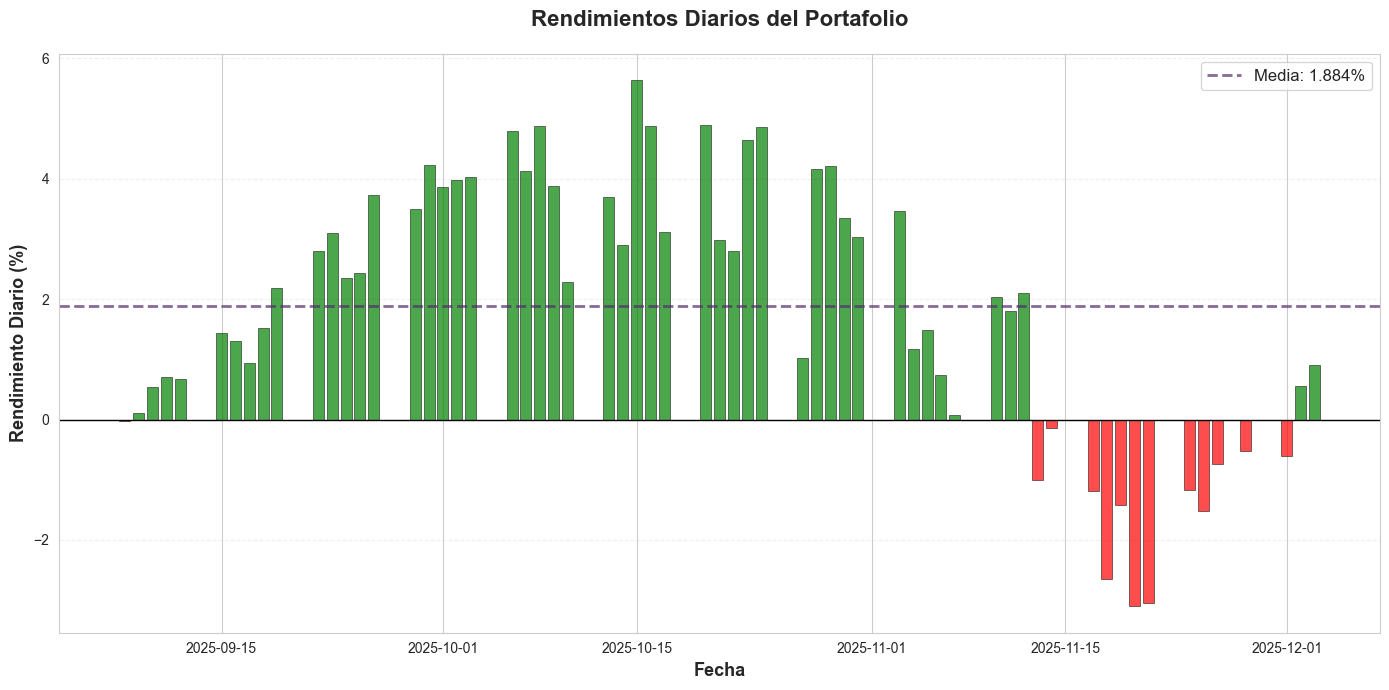

In [215]:
# ============================================================================
# GRÁFICA 2: RENDIMIENTOS DIARIOS DEL PORTAFOLIO
# ============================================================================

if sp500_real is not None:
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Color tema morado
    color_morado = '#512d6d'
    
    colors_rend = ['green' if x >= 0 else 'red' for x in df_comparacion_real['Rendimiento portafolio']]
    ax.bar(df_comparacion_real['Date'], df_comparacion_real['Rendimiento portafolio'] * 100,
            color=colors_rend, alpha=0.7, edgecolor='black', linewidth=0.5)
    
    ax.set_title('Rendimientos Diarios del Portafolio', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Fecha', fontsize=13, fontweight='bold')
    ax.set_ylabel('Rendimiento Diario (%)', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y', linestyle='--')
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
    
    # Estadísticas del rendimiento con color morado
    rend_mean = df_comparacion_real['Rendimiento portafolio'].mean() * 100
    rend_std = df_comparacion_real['Rendimiento portafolio'].std() * 100
    ax.axhline(y=rend_mean, color=color_morado, linestyle='--', linewidth=2, alpha=0.7, 
               label=f'Media: {rend_mean:.3f}%')
    ax.legend(loc='best', fontsize=12)
    
    plt.tight_layout()
    plt.show()

### Gráfica 3: Comparación Normalizada (Base 100) - Portafolio vs S&P 500

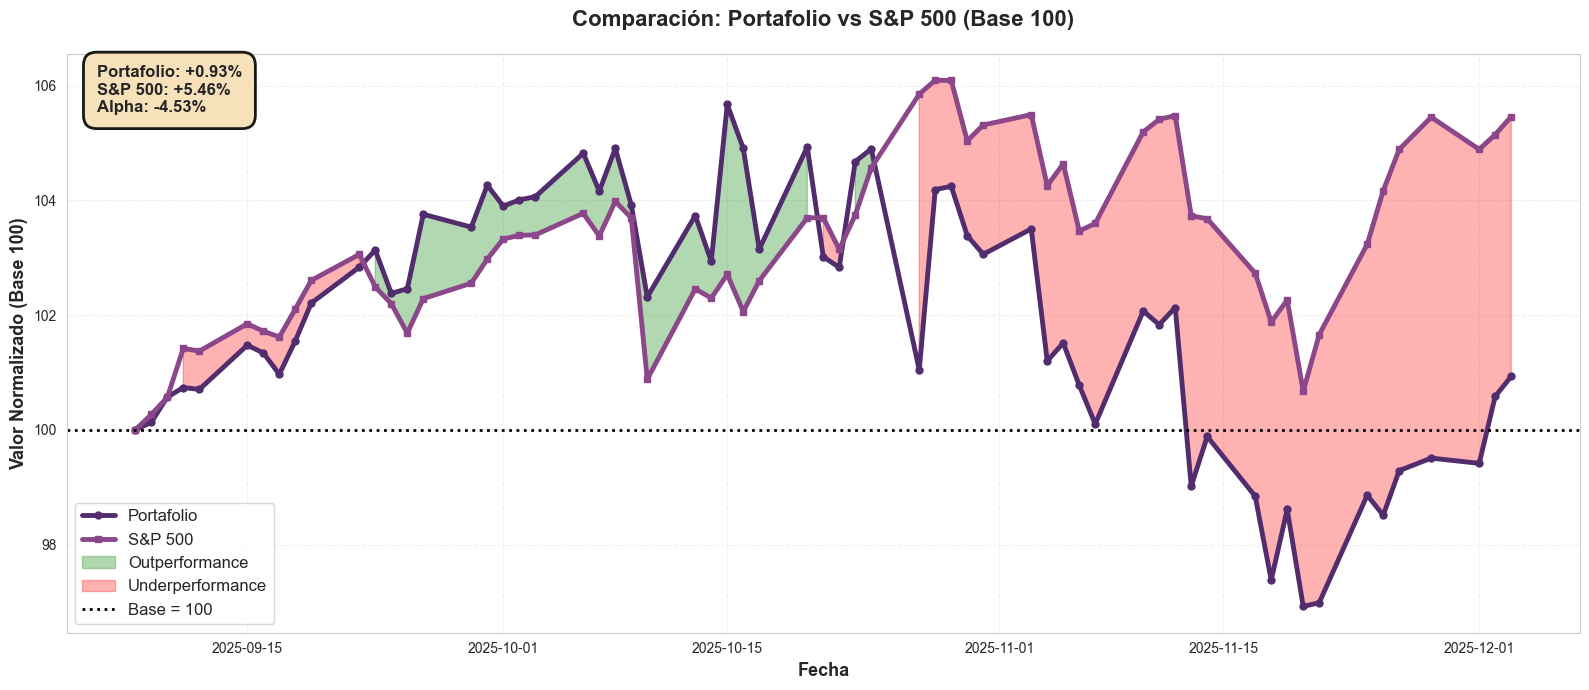

In [216]:
# ============================================================================
# GRÁFICA 3: COMPARACIÓN NORMALIZADA (BASE 100)
# ============================================================================

if sp500_real is not None:
    fig, ax = plt.subplots(figsize=(16, 7))
    
    # Colores tema morado
    color_portafolio = '#512d6d'
    color_sp500 = '#8b4789'
    
    ax.plot(df_comparacion_real['Date'], df_comparacion_real['Portafolio_Normalizado'],
             color=color_portafolio, linewidth=3.5, label='Portafolio', marker='o', markersize=5)
    ax.plot(df_comparacion_real['Date'], df_comparacion_real['SP500_Normalizado'],
             color=color_sp500, linewidth=3.5, label='S&P 500', marker='s', markersize=5)
    
    # Sombrear área entre las dos líneas (mantener verde/rojo para outperformance/underperformance)
    ax.fill_between(df_comparacion_real['Date'], 
                     df_comparacion_real['Portafolio_Normalizado'],
                     df_comparacion_real['SP500_Normalizado'],
                     where=df_comparacion_real['Portafolio_Normalizado'] >= df_comparacion_real['SP500_Normalizado'],
                     alpha=0.3, color='green', label='Outperformance')
    ax.fill_between(df_comparacion_real['Date'], 
                     df_comparacion_real['Portafolio_Normalizado'],
                     df_comparacion_real['SP500_Normalizado'],
                     where=df_comparacion_real['Portafolio_Normalizado'] < df_comparacion_real['SP500_Normalizado'],
                     alpha=0.3, color='red', label='Underperformance')
    
    ax.axhline(y=100, color='black', linestyle=':', linewidth=2, label='Base = 100')
    
    ax.set_title('Comparación: Portafolio vs S&P 500 (Base 100)', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Fecha', fontsize=13, fontweight='bold')
    ax.set_ylabel('Valor Normalizado (Base 100)', fontsize=13, fontweight='bold')
    ax.legend(loc='best', fontsize=12)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Anotar rendimientos finales
    ax.text(0.02, 0.98, 
             f'Portafolio: {rendimiento_final_portafolio:+.2f}%\nS&P 500: {rendimiento_final_sp500:+.2f}%\nAlpha: {diferencia_final:+.2f}%',
             transform=ax.transAxes, fontsize=12, verticalalignment='top', fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.8', facecolor='wheat', alpha=0.9, edgecolor='black', linewidth=2))
    
    plt.tight_layout()
    plt.show()

### Gráfica 4: Rendimientos Acumulados - Portafolio vs S&P 500

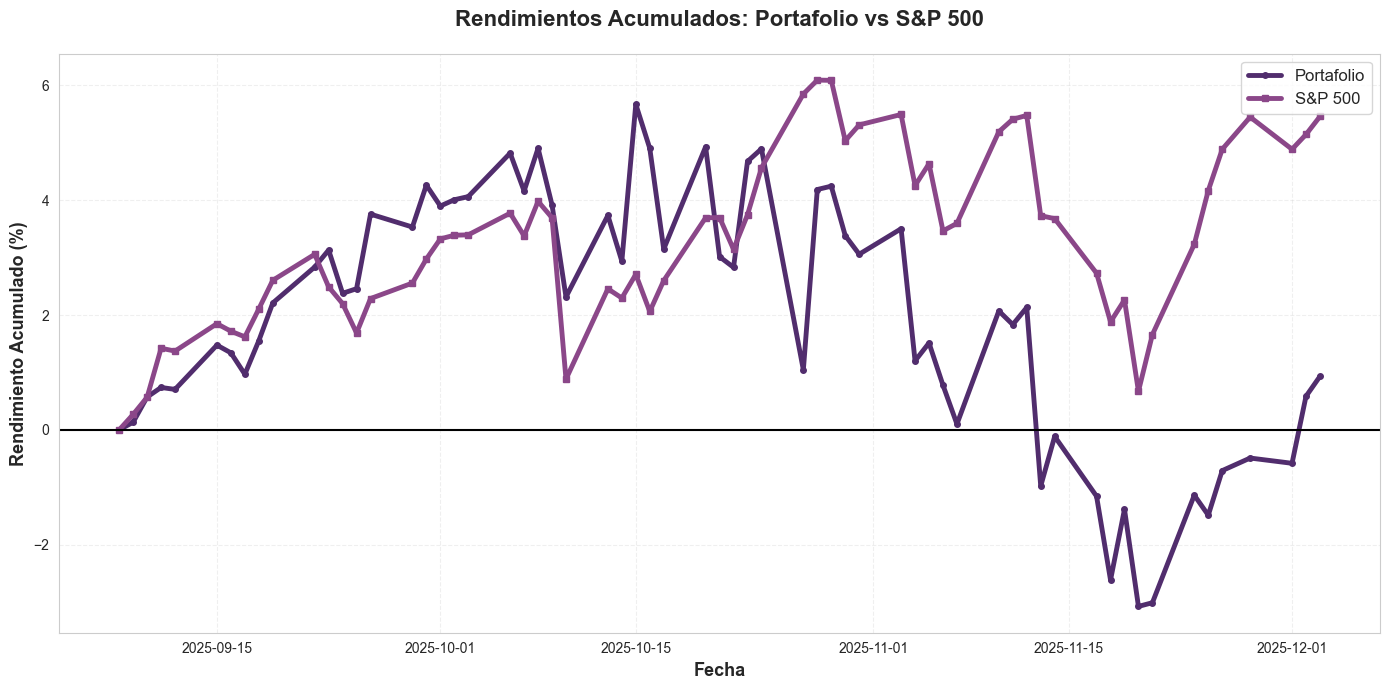

In [217]:
# ============================================================================
# GRÁFICA 4: RENDIMIENTOS ACUMULADOS
# ============================================================================

if sp500_real is not None:
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Colores tema morado
    color_portafolio = '#512d6d'
    color_sp500 = '#8b4789'
    
    ax.plot(df_comparacion_real['Date'], df_comparacion_real['Rendimiento_Acum_Portafolio'],
             color=color_portafolio, linewidth=3.5, label='Portafolio', marker='o', markersize=4)
    ax.plot(df_comparacion_real['Date'], df_comparacion_real['Rendimiento_Acum_SP500'],
             color=color_sp500, linewidth=3.5, label='S&P 500', marker='s', markersize=4)
    
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
    
    ax.set_title('Rendimientos Acumulados: Portafolio vs S&P 500', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Fecha', fontsize=13, fontweight='bold')
    ax.set_ylabel('Rendimiento Acumulado (%)', fontsize=13, fontweight='bold')
    ax.legend(loc='best', fontsize=12)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()

### Gráfica 5: Alpha (Diferencia vs S&P 500) - Análisis de Outperformance

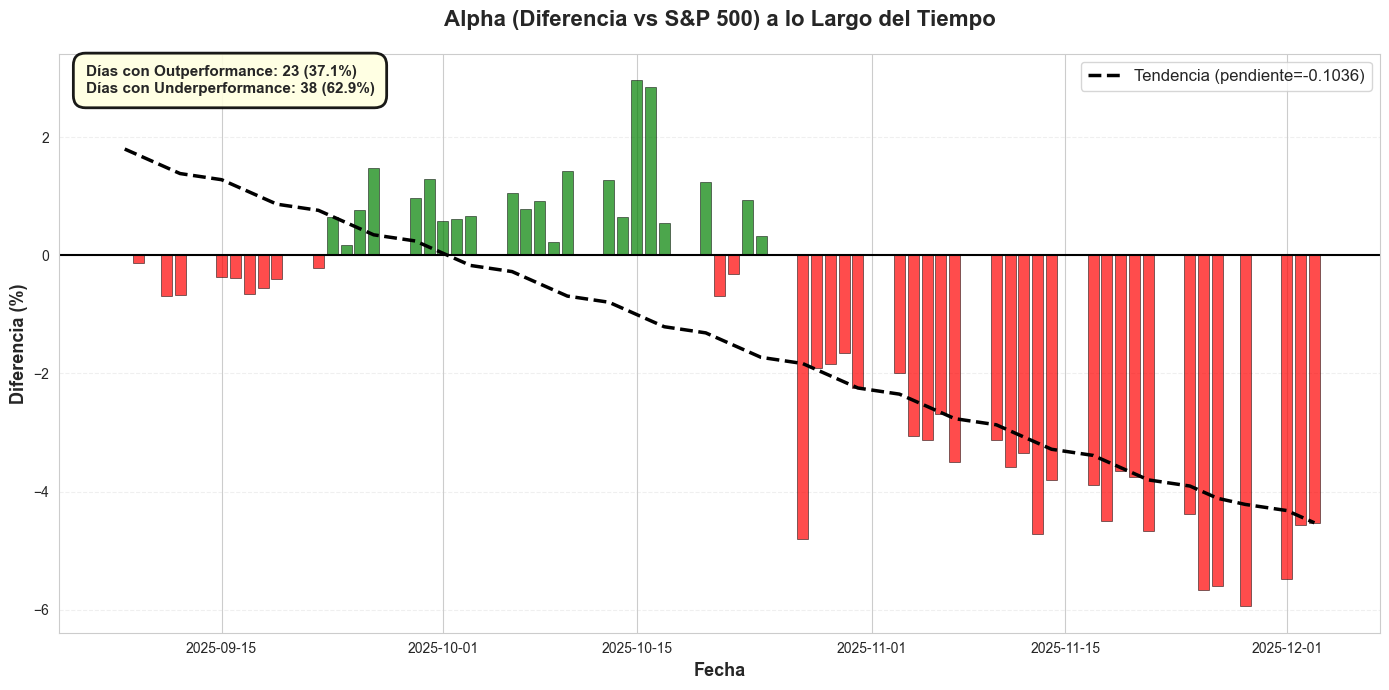

In [218]:
# ============================================================================
# GRÁFICA 5: ALPHA (DIFERENCIA VS S&P 500)
# ============================================================================

if sp500_real is not None:
    fig, ax = plt.subplots(figsize=(14, 7))
    
    colors_diff = ['green' if x >= 0 else 'red' for x in df_comparacion_real['Diferencia']]
    ax.bar(df_comparacion_real['Date'], df_comparacion_real['Diferencia'],
            color=colors_diff, alpha=0.7, edgecolor='black', linewidth=0.5)
    
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
    
    # Línea de tendencia
    from scipy import stats
    x_numeric = np.arange(len(df_comparacion_real))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_numeric, df_comparacion_real['Diferencia'])
    trend_line = slope * x_numeric + intercept
    ax.plot(df_comparacion_real['Date'], trend_line, 
             color='black', linestyle='--', linewidth=2.5, label=f'Tendencia (pendiente={slope:.4f})')
    
    ax.set_title('Alpha (Diferencia vs S&P 500) a lo Largo del Tiempo', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Fecha', fontsize=13, fontweight='bold')
    ax.set_ylabel('Diferencia (%)', fontsize=13, fontweight='bold')
    ax.legend(loc='best', fontsize=12)
    ax.grid(True, alpha=0.3, axis='y', linestyle='--')
    
    # Texto resumen
    texto_resumen = f"Días con Outperformance: {dias_outperform} ({pct_outperform:.1f}%)\n"
    texto_resumen += f"Días con Underperformance: {dias_underperform} ({100-pct_outperform:.1f}%)"
    ax.text(0.02, 0.98, texto_resumen,
             transform=ax.transAxes, fontsize=11, verticalalignment='top', fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.8', facecolor='lightyellow', alpha=0.9, edgecolor='black', linewidth=2))
    
    plt.tight_layout()
    plt.show()

In [219]:
# ============================================================================
# TABLA RESUMEN DE MÉTRICAS COMPARATIVAS
# ============================================================================

if sp500_real is not None:
    print("="*100)
    print("TABLA RESUMEN: PORTAFOLIO vs S&P 500")
    print("="*100)
    
    # Calcular métricas adicionales
    max_drawdown_portafolio = ((df_comparacion_real['Valor Portafolio'] / df_comparacion_real['Valor Portafolio'].cummax()) - 1).min() * 100
    max_drawdown_sp500 = ((df_comparacion_real['SP500_Precio'] / df_comparacion_real['SP500_Precio'].cummax()) - 1).min() * 100
    
    # Mejor y peor día
    mejor_dia_portafolio = df_comparacion_real.loc[df_comparacion_real['Rendimiento portafolio'].idxmax()]
    peor_dia_portafolio = df_comparacion_real.loc[df_comparacion_real['Rendimiento portafolio'].idxmin()]
    mejor_dia_sp500 = df_comparacion_real.loc[df_comparacion_real['SP500_Rendimiento'].idxmax()]
    peor_dia_sp500 = df_comparacion_real.loc[df_comparacion_real['SP500_Rendimiento'].idxmin()]
    
    # Crear tabla comparativa
    metricas_comparativas = {
        'Métrica': [
            'Valor Inicial',
            'Valor Final',
            'Rendimiento Total (%)',
            'Volatilidad Anualizada (%)',
            'Sharpe Ratio',
            'Max Drawdown (%)',
            'Mejor Día (%)',
            'Peor Día (%)',
            'Correlación',
            'Días Totales',
            'Días Positivos',
            'Días Negativos',
            '% Días Positivos'
        ],
        'Portafolio': [
            f'${valor_inicial_real:,.2f}',
            f'${df_comparacion_real["Valor Portafolio"].iloc[-1]:,.2f}',
            f'{rendimiento_final_portafolio:+.2f}%',
            f'{vol_portafolio:.2f}%',
            f'{sharpe_portafolio:.4f}',
            f'{max_drawdown_portafolio:.2f}%',
            f'{mejor_dia_portafolio["Rendimiento portafolio"]*100:+.2f}% ({mejor_dia_portafolio["Date"].strftime("%Y-%m-%d")})',
            f'{peor_dia_portafolio["Rendimiento portafolio"]*100:+.2f}% ({peor_dia_portafolio["Date"].strftime("%Y-%m-%d")})',
            f'{corr_portafolio_sp500:.4f}',
            f'{len(df_comparacion_real)}',
            f'{(df_comparacion_real["Rendimiento portafolio"] > 0).sum()}',
            f'{(df_comparacion_real["Rendimiento portafolio"] < 0).sum()}',
            f'{(df_comparacion_real["Rendimiento portafolio"] > 0).sum() / len(df_comparacion_real) * 100:.1f}%'
        ],
        'S&P 500': [
            f'${df_comparacion_real["SP500_Precio"].iloc[0]:,.2f}',
            f'${df_comparacion_real["SP500_Precio"].iloc[-1]:,.2f}',
            f'{rendimiento_final_sp500:+.2f}%',
            f'{vol_sp500:.2f}%',
            f'{sharpe_sp500:.4f}',
            f'{max_drawdown_sp500:.2f}%',
            f'{mejor_dia_sp500["SP500_Rendimiento"]*100:+.2f}% ({mejor_dia_sp500["Date"].strftime("%Y-%m-%d")})',
            f'{peor_dia_sp500["SP500_Rendimiento"]*100:+.2f}% ({peor_dia_sp500["Date"].strftime("%Y-%m-%d")})',
            '-',
            f'{len(df_comparacion_real)}',
            f'{(df_comparacion_real["SP500_Rendimiento"] > 0).sum()}',
            f'{(df_comparacion_real["SP500_Rendimiento"] < 0).sum()}',
            f'{(df_comparacion_real["SP500_Rendimiento"] > 0).sum() / len(df_comparacion_real) * 100:.1f}%'
        ]
    }
    
    df_metricas_comp = pd.DataFrame(metricas_comparativas)
    
    print("\n📊 TABLA COMPARATIVA DE MÉTRICAS:")
    print("="*100)
    print(df_metricas_comp.to_string(index=False))
    print("="*100)
    
    print("\n💡 CONCLUSIONES:")
    print("-"*100)
    
    if rendimiento_final_portafolio > rendimiento_final_sp500:
        print(f"✅ Tu portafolio SUPERÓ al S&P 500 por {abs(diferencia_final):.2f} puntos porcentuales")
    else:
        print(f"❌ Tu portafolio quedó DEBAJO del S&P 500 por {abs(diferencia_final):.2f} puntos porcentuales")
    
    if vol_portafolio < vol_sp500:
        print(f"✅ Tu portafolio fue MENOS volátil que el S&P 500 ({vol_portafolio:.2f}% vs {vol_sp500:.2f}%)")
    else:
        print(f"⚠️  Tu portafolio fue MÁS volátil que el S&P 500 ({vol_portafolio:.2f}% vs {vol_sp500:.2f}%)")
    
    if sharpe_portafolio > sharpe_sp500:
        print(f"✅ Tu portafolio tiene MEJOR Sharpe Ratio ajustado por riesgo ({sharpe_portafolio:.4f} vs {sharpe_sp500:.4f})")
    else:
        print(f"⚠️  El S&P 500 tiene mejor Sharpe Ratio ajustado por riesgo ({sharpe_sp500:.4f} vs {sharpe_portafolio:.4f})")
    
    if abs(max_drawdown_portafolio) < abs(max_drawdown_sp500):
        print(f"✅ Tu portafolio tuvo MENOR caída máxima ({max_drawdown_portafolio:.2f}% vs {max_drawdown_sp500:.2f}%)")
    else:
        print(f"⚠️  Tu portafolio tuvo MAYOR caída máxima ({max_drawdown_portafolio:.2f}% vs {max_drawdown_sp500:.2f}%)")
    
    print(f"\n📈 Correlación: {corr_portafolio_sp500:.4f}")
    if corr_portafolio_sp500 > 0.8:
        print("   → Alta correlación: Tu portafolio se mueve muy similar al mercado")
    elif corr_portafolio_sp500 > 0.5:
        print("   → Correlación moderada: Tu portafolio tiene algo de independencia del mercado")
    else:
        print("   → Baja correlación: Tu portafolio se mueve de forma más independiente del mercado")
    
    print("\n" + "="*100)

TABLA RESUMEN: PORTAFOLIO vs S&P 500

📊 TABLA COMPARATIVA DE MÉTRICAS:
                   Métrica          Portafolio             S&P 500
             Valor Inicial         $999,695.67           $6,495.15
               Valor Final       $1,009,012.05           $6,849.72
     Rendimiento Total (%)              +0.93%              +5.46%
Volatilidad Anualizada (%)              34.68%              12.37%
              Sharpe Ratio             -1.9738             -4.0480
          Max Drawdown (%)              -8.28%              -5.11%
             Mejor Día (%) +5.64% (2025-10-15) +1.56% (2025-10-13)
              Peor Día (%) -3.11% (2025-11-20) -2.71% (2025-10-10)
               Correlación              0.1368                   -
              Días Totales                  62                  62
            Días Positivos                  49                  39
            Días Negativos                  13                  22
          % Días Positivos               79.0%            

In [220]:
# Convierte el excel a csv
import pandas as pd

def excel_a_csv(ruta_excel, ruta_csv):
    # Lee el archivo Excel
    df2 = pd.read_excel(ruta_excel)
    
    # Guarda el DataFrame como un archivo CSV
    df2.to_csv(ruta_csv, index=False)

if __name__ == "__main__":
    ruta_excel = "precios_historicos_estrategia.xlsx"
    ruta_csv = "precios_historicos_estrategia.csv"
    excel_a_csv(ruta_excel, ruta_csv)
    print(f"Archivo convertido de {ruta_excel} a {ruta_csv}")

df2 = pd.read_csv("precios_historicos_estrategia.csv")

# Definir el número de acciones de cada empresa
acciones_2 = {
'NVDA.O': 1892,
'AAPL.O': 528,
'LMT': 217,
'MSFT.O': 200,
'SIEGn.DE Usd': 369,
'GOOGL.O': 381,
'INTC.O': 1436
}

print("Número de acciones por empresa:")
for empresa, num_acciones in acciones_2.items():
    print(f"{empresa}: {num_acciones}")

# Valor inicial del portafolio
valor_inicial_portafolio2 = 1_000_000.00

# df2['V0'] es igual a la multipliación de las acciones2 por los valores de las empresas en el df2

# Crear columna 'Valor Portafolio' basada en V0 + 30,000 cash
#df2['Valor Portafolio'] = df2['V0'] + 30000

Archivo convertido de precios_historicos_estrategia.xlsx a precios_historicos_estrategia.csv
Número de acciones por empresa:
NVDA.O: 1892
AAPL.O: 528
LMT: 217
MSFT.O: 200
SIEGn.DE Usd: 369
GOOGL.O: 381
INTC.O: 1436


## 🔄 Preparación del Segundo Portafolio (Estrategia)

In [221]:
# ============================================================================
# CREAR COLUMNA 'VALOR PORTAFOLIO' PARA DF2
# ============================================================================

print("="*80)
print("PREPARACIÓN DEL PORTAFOLIO ESTRATEGIA (DF2)")
print("="*80)

# Convertir la columna Date a datetime si no lo es
if 'Date' in df2.columns and df2['Date'].dtype != 'datetime64[ns]':
    df2['Date'] = pd.to_datetime(df2['Date'])

# Calcular V0 (valor del portafolio sin cash) multiplicando acciones por precios
# Primero verificar si existe la columna V0, si no, calcularla
if 'V0' not in df2.columns:
    print("\n📊 Calculando V0 (valor de las acciones)...")
    df2['V0'] = 0
    
    for empresa, num_acciones in acciones_2.items():
        if empresa in df2.columns:
            df2['V0'] += df2[empresa] * num_acciones
            print(f"   ✓ {empresa}: {num_acciones} acciones")
        else:
            print(f"   ⚠️  {empresa}: No encontrada en df2")
    
    print(f"\n   Total V0 inicial: ${df2['V0'].iloc[0]:,.2f}")
else:
    print(f"\n✅ Columna V0 ya existe en df2")
    print(f"   V0 inicial: ${df2['V0'].iloc[0]:,.2f}")

# Crear columna 'Valor Portafolio' basada en V0 + 30,000 cash
df2['Valor Portafolio'] = df2['V0'] + 30000

# Crear columna 'Rendimiento portafolio' calculando el rendimiento diario
df2['Rendimiento portafolio'] = df2['V0'].pct_change()

# Para el primer día, calcular el rendimiento respecto al valor inicial
df2.loc[df2.index[0], 'Rendimiento portafolio'] = (df2['V0'].iloc[0] / valor_inicial_portafolio2) - 1

print(f"\n✅ Columnas creadas exitosamente para df2:")
print(f"   - 'V0': Valor de las acciones")
print(f"   - 'Valor Portafolio': V0 + $30,000 cash")
print(f"   - 'Rendimiento portafolio': Rendimiento diario")

print(f"\n📊 Resumen del Portafolio Estrategia:")
print(f"   Valor inicial:       ${valor_inicial_portafolio2:,.2f}")
print(f"   Valor actual:        ${df2['Valor Portafolio'].iloc[-1]:,.2f}")
print(f"   Rendimiento total:   {((df2['Valor Portafolio'].iloc[-1] / valor_inicial_portafolio2) - 1) * 100:.2f}%")
print(f"   Días con datos:      {len(df2)}")

print(f"\n📋 Primeros 5 días del df2:")
if 'Date' in df2.columns:
    print(df2[['Date', 'V0', 'Valor Portafolio', 'Rendimiento portafolio']].head().to_string(index=False))
else:
    print(df2[['V0', 'Valor Portafolio', 'Rendimiento portafolio']].head().to_string(index=False))

print("\n" + "="*80)

PREPARACIÓN DEL PORTAFOLIO ESTRATEGIA (DF2)

📊 Calculando V0 (valor de las acciones)...
   ✓ NVDA.O: 1892 acciones
   ✓ AAPL.O: 528 acciones
   ✓ LMT: 217 acciones
   ✓ MSFT.O: 200 acciones
   ✓ SIEGn.DE Usd: 369 acciones
   ✓ GOOGL.O: 381 acciones
   ✓ INTC.O: 1436 acciones

   Total V0 inicial: $965,440.48

✅ Columnas creadas exitosamente para df2:
   - 'V0': Valor de las acciones
   - 'Valor Portafolio': V0 + $30,000 cash
   - 'Rendimiento portafolio': Rendimiento diario

📊 Resumen del Portafolio Estrategia:
   Valor inicial:       $1,000,000.00
   Valor actual:        $472,538.93
   Rendimiento total:   -52.75%
   Días con datos:      1065

📋 Primeros 5 días del df2:
      Date           V0  Valor Portafolio  Rendimiento portafolio
2025-12-03 965440.48125      995440.48125               -0.034560
2025-12-02 968538.51151      998538.51151                0.003209
2025-12-01 956121.50580      986121.50580               -0.012820
2025-11-28 957786.57065      987786.57065               

## 📊 Comparación de Ambos Portafolios

Comparación detallada entre:
- **Portafolio Cierre (df)**: Estrategia de cierre de posiciones
- **Portafolio Estrategia (df2)**: Estrategia alternativa

In [230]:
# ============================================================================
# PREPARAR DATOS PARA COMPARACIÓN
# ============================================================================

print("="*100)
print("COMPARACIÓN: PORTAFOLIO CIERRE vs PORTAFOLIO ESTRATEGIA")
print("="*100)

# Fecha de inicio para la comparación
fecha_inicio_comparacion = '2025-09-08'

# Asegurar que ambos DataFrames tengan Date como datetime
if 'Date' in df.columns and df['Date'].dtype != 'datetime64[ns]':
    df['Date'] = pd.to_datetime(df['Date'])
if 'Date' in df2.columns and df2['Date'].dtype != 'datetime64[ns]':
    df2['Date'] = pd.to_datetime(df2['Date'])

# Filtrar ambos portafolios desde la fecha de inicio
if 'Date' in df.columns:
    df = df[df['Date'] >= fecha_inicio_comparacion].copy()
if 'Date' in df2.columns:
    df2 = df2[df2['Date'] >= fecha_inicio_comparacion].copy()

print(f"\n📅 Filtrado por fecha: {fecha_inicio_comparacion}")
print(f"   df (Cierre): {len(df)} días")
print(f"   df2 (Estrategia): {len(df2)} días")

# Verificar que ambos tengan las columnas necesarias
print("\n📋 Verificación de columnas:")
print(f"   df (Cierre) tiene 'Valor Portafolio': {'Valor Portafolio' in df.columns}")
print(f"   df (Cierre) tiene 'Rendimiento portafolio': {'Rendimiento portafolio' in df.columns}")
print(f"   df2 (Estrategia) tiene 'Valor Portafolio': {'Valor Portafolio' in df2.columns}")
print(f"   df2 (Estrategia) tiene 'Rendimiento portafolio': {'Rendimiento portafolio' in df2.columns}")

# Crear DataFrames para comparación
if 'Date' in df.columns and 'Date' in df2.columns:
    # Merge por fecha para comparación alineada
    df_comp = df[['Date', 'Valor Portafolio', 'Rendimiento portafolio']].copy()
    df_comp.columns = ['Date', 'Valor_Cierre', 'Rend_Cierre']
    
    df2_comp = df2[['Date', 'Valor Portafolio', 'Rendimiento portafolio']].copy()
    df2_comp.columns = ['Date', 'Valor_Estrategia', 'Rend_Estrategia']
    
    # Merge
    df_comparacion = pd.merge(df_comp, df2_comp, on='Date', how='outer')
    df_comparacion = df_comparacion.sort_values('Date').reset_index(drop=True)
    
    print(f"\n📅 Período de comparación:")
    print(f"   Fecha inicio:        {df_comparacion['Date'].min()}")
    print(f"   Fecha fin:           {df_comparacion['Date'].max()}")
    print(f"   Días totales:        {len(df_comparacion)}")
    print(f"   Días con ambos:      {df_comparacion[['Valor_Cierre', 'Valor_Estrategia']].notna().all(axis=1).sum()}")
else:
    print("\n⚠️  No se puede hacer merge por fecha. Comparación por índice.")
    # Comparación por índice (asumiendo misma longitud)
    min_len = min(len(df), len(df2))
    df_comparacion = pd.DataFrame({
        'Valor_Cierre': df['Valor Portafolio'].iloc[:min_len].values,
        'Rend_Cierre': df['Rendimiento portafolio'].iloc[:min_len].values,
        'Valor_Estrategia': df2['Valor Portafolio'].iloc[:min_len].values,
        'Rend_Estrategia': df2['Rendimiento portafolio'].iloc[:min_len].values
    })
    
    print(f"\n📅 Período de comparación:")
    print(f"   Días comparados:     {min_len}")

print("\n" + "="*100)

COMPARACIÓN: PORTAFOLIO CIERRE vs PORTAFOLIO ESTRATEGIA

📅 Filtrado por fecha: 2025-09-08
   df (Cierre): 62 días
   df2 (Estrategia): 62 días

📋 Verificación de columnas:
   df (Cierre) tiene 'Valor Portafolio': True
   df (Cierre) tiene 'Rendimiento portafolio': True
   df2 (Estrategia) tiene 'Valor Portafolio': True
   df2 (Estrategia) tiene 'Rendimiento portafolio': True

📅 Período de comparación:
   Fecha inicio:        2025-09-08 00:00:00
   Fecha fin:           2025-12-03 00:00:00
   Días totales:        62
   Días con ambos:      62


📅 Filtrado por fecha: 2025-09-08
   df (Cierre): 62 días
   df2 (Estrategia): 62 días

📋 Verificación de columnas:
   df (Cierre) tiene 'Valor Portafolio': True
   df (Cierre) tiene 'Rendimiento portafolio': True
   df2 (Estrategia) tiene 'Valor Portafolio': True
   df2 (Estrategia) tiene 'Rendimiento portafolio': True

📅 Período de comparación:
   Fecha inicio:        2025-09-08 00:00:00
   Fecha fin:           2025-12-03 00:00:00
   Días totales

In [231]:
# ============================================================================
# CALCULAR MÉTRICAS COMPARATIVAS
# ============================================================================

print("="*100)
print("MÉTRICAS COMPARATIVAS")
print("="*100)

# Colores
color_cierre = '#512d6d'
color_estrategia = '#8b4789'

# Filtrar solo datos donde ambos portafolios tienen valores
df_comp_valido = df_comparacion.dropna(subset=['Valor_Cierre', 'Valor_Estrategia'])

# Valores iniciales y finales
valor_inicial = 1_000_000.00

# Portafolio Cierre
valor_final_cierre = df_comp_valido['Valor_Cierre'].iloc[-1]
rend_total_cierre = (valor_final_cierre / valor_inicial - 1) * 100
rend_prom_diario_cierre = df_comp_valido['Rend_Cierre'].mean() * 100
vol_diaria_cierre = df_comp_valido['Rend_Cierre'].std() * 100
vol_anual_cierre = vol_diaria_cierre * np.sqrt(252)

# Portafolio Estrategia
valor_final_estrategia = df_comp_valido['Valor_Estrategia'].iloc[-1]
rend_total_estrategia = (valor_final_estrategia / valor_inicial - 1) * 100
rend_prom_diario_estrategia = df_comp_valido['Rend_Estrategia'].mean() * 100
vol_diaria_estrategia = df_comp_valido['Rend_Estrategia'].std() * 100
vol_anual_estrategia = vol_diaria_estrategia * np.sqrt(252)

# Sharpe Ratio (asumiendo tasa libre de riesgo = 4% anual)
rf_anual = 0.04
rf_diaria = (1 + rf_anual) ** (1/252) - 1

sharpe_cierre = (df_comp_valido['Rend_Cierre'].mean() - rf_diaria) / df_comp_valido['Rend_Cierre'].std() * np.sqrt(252)
sharpe_estrategia = (df_comp_valido['Rend_Estrategia'].mean() - rf_diaria) / df_comp_valido['Rend_Estrategia'].std() * np.sqrt(252)

# Max Drawdown
cummax_cierre = df_comp_valido['Valor_Cierre'].cummax()
drawdown_cierre = (df_comp_valido['Valor_Cierre'] - cummax_cierre) / cummax_cierre
max_dd_cierre = drawdown_cierre.min() * 100

cummax_estrategia = df_comp_valido['Valor_Estrategia'].cummax()
drawdown_estrategia = (df_comp_valido['Valor_Estrategia'] - cummax_estrategia) / cummax_estrategia
max_dd_estrategia = drawdown_estrategia.min() * 100

# Días ganadores
dias_positivos_cierre = (df_comp_valido['Rend_Cierre'] > 0).sum()
dias_positivos_estrategia = (df_comp_valido['Rend_Estrategia'] > 0).sum()
total_dias = len(df_comp_valido)

# Mejor y peor día
mejor_dia_cierre = df_comp_valido['Rend_Cierre'].max() * 100
peor_dia_cierre = df_comp_valido['Rend_Cierre'].min() * 100
mejor_dia_estrategia = df_comp_valido['Rend_Estrategia'].max() * 100
peor_dia_estrategia = df_comp_valido['Rend_Estrategia'].min() * 100

# Correlación entre portafolios
correlacion = df_comp_valido['Rend_Cierre'].corr(df_comp_valido['Rend_Estrategia'])

# Días donde Cierre supera a Estrategia
dias_cierre_gana = (df_comp_valido['Rend_Cierre'] > df_comp_valido['Rend_Estrategia']).sum()
pct_cierre_gana = (dias_cierre_gana / total_dias) * 100

print(f"\n{'='*50}")
print(f"{'PORTAFOLIO CIERRE':^50}")
print(f"{'='*50}")
print(f"  Valor Final:              ${valor_final_cierre:,.2f}")
print(f"  Rendimiento Total:        {rend_total_cierre:.2f}%")
print(f"  Rendimiento Promedio:     {rend_prom_diario_cierre:.4f}% diario")
print(f"  Volatilidad:              {vol_diaria_cierre:.4f}% diaria | {vol_anual_cierre:.2f}% anual")
print(f"  Sharpe Ratio:             {sharpe_cierre:.4f}")
print(f"  Max Drawdown:             {max_dd_cierre:.2f}%")
print(f"  Mejor Día:                {mejor_dia_cierre:.2f}%")
print(f"  Peor Día:                 {peor_dia_cierre:.2f}%")
print(f"  Días Positivos:           {dias_positivos_cierre}/{total_dias} ({dias_positivos_cierre/total_dias*100:.1f}%)")

print(f"\n{'='*50}")
print(f"{'PORTAFOLIO ESTRATEGIA':^50}")
print(f"{'='*50}")
print(f"  Valor Final:              ${valor_final_estrategia:,.2f}")
print(f"  Rendimiento Total:        {rend_total_estrategia:.2f}%")
print(f"  Rendimiento Promedio:     {rend_prom_diario_estrategia:.4f}% diario")
print(f"  Volatilidad:              {vol_diaria_estrategia:.4f}% diaria | {vol_anual_estrategia:.2f}% anual")
print(f"  Sharpe Ratio:             {sharpe_estrategia:.4f}")
print(f"  Max Drawdown:             {max_dd_estrategia:.2f}%")
print(f"  Mejor Día:                {mejor_dia_estrategia:.2f}%")
print(f"  Peor Día:                 {peor_dia_estrategia:.2f}%")
print(f"  Días Positivos:           {dias_positivos_estrategia}/{total_dias} ({dias_positivos_estrategia/total_dias*100:.1f}%)")

print(f"\n{'='*50}")
print(f"{'COMPARACIÓN':^50}")
print(f"{'='*50}")
print(f"  Correlación:              {correlacion:.4f}")
print(f"  Diferencia Rendimiento:   {rend_total_cierre - rend_total_estrategia:.2f}% (Cierre - Estrategia)")
print(f"  Diferencia Sharpe:        {sharpe_cierre - sharpe_estrategia:.4f}")
print(f"  Días Cierre > Estrategia: {dias_cierre_gana}/{total_dias} ({pct_cierre_gana:.1f}%)")

if rend_total_cierre > rend_total_estrategia:
    print(f"\n  🏆 GANADOR: Portafolio CIERRE (+{rend_total_cierre - rend_total_estrategia:.2f}%)")
else:
    print(f"\n  🏆 GANADOR: Portafolio ESTRATEGIA (+{rend_total_estrategia - rend_total_cierre:.2f}%)")

print("\n" + "="*100)

MÉTRICAS COMPARATIVAS

                PORTAFOLIO CIERRE                 
  Valor Final:              $1,009,012.05
  Rendimiento Total:        0.90%
  Rendimiento Promedio:     1.8838% diario
  Volatilidad:              2.1848% diaria | 34.68% anual
  Sharpe Ratio:             13.5742
  Max Drawdown:             -8.28%
  Mejor Día:                5.64%
  Peor Día:                 -3.11%
  Días Positivos:           49/62 (79.0%)

              PORTAFOLIO ESTRATEGIA               
  Valor Final:              $995,440.48
  Rendimiento Total:        -0.46%
  Rendimiento Promedio:     -0.2195% diario
  Volatilidad:              1.3594% diaria | 21.58% anual
  Sharpe Ratio:             -2.7446
  Max Drawdown:             -8.09%
  Mejor Día:                3.27%
  Peor Día:                 -3.46%
  Días Positivos:           24/62 (38.7%)

                   COMPARACIÓN                    
  Correlación:              0.1019
  Diferencia Rendimiento:   1.36% (Cierre - Estrategia)
  Diferencia 

### 📈 Gráfica 1: Evolución del Valor de Ambos Portafolios

📅 Rango de fechas para la gráfica:
   Desde: 2025-10-15 00:00:00
   Hasta: 2025-12-03 00:00:00
   Días graficados: 35


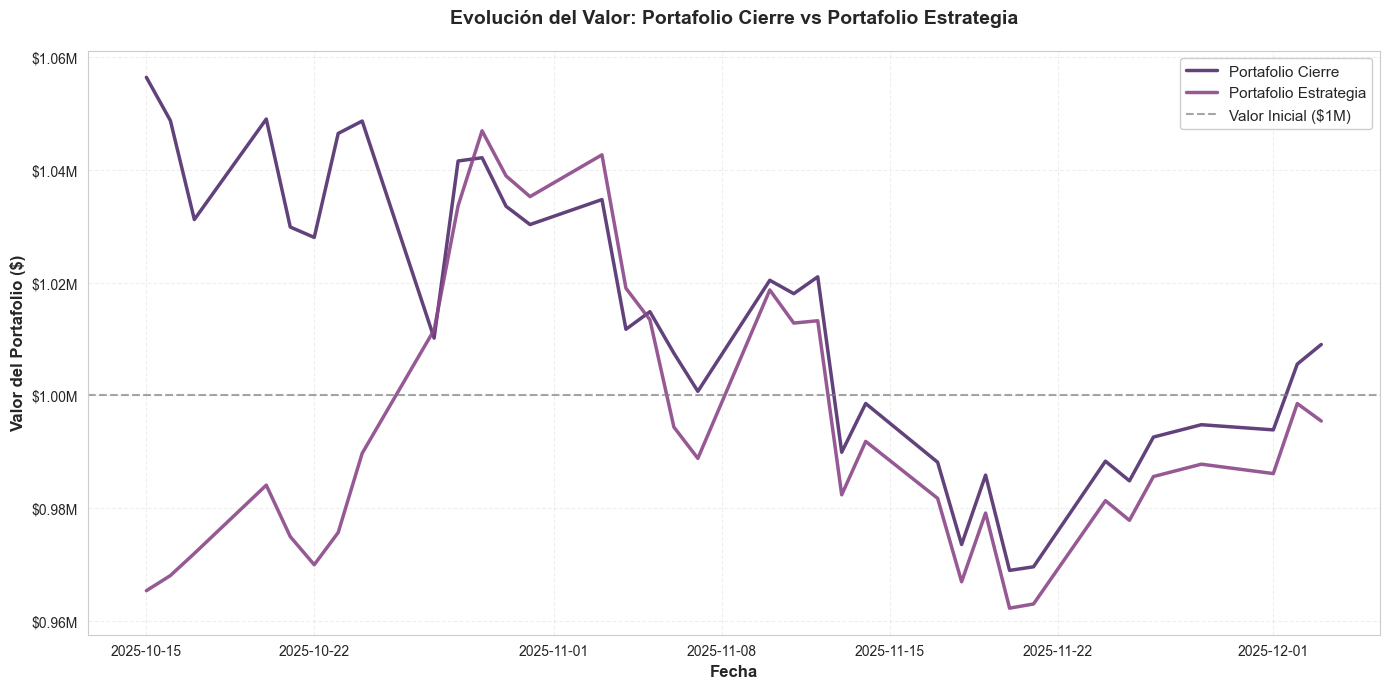

✅ Gráfica de evolución generada


In [238]:
# ============================================================================
# CONFIGURACIÓN DE RANGO DE FECHAS (Personalizable)
# ============================================================================
# Cambia estas fechas al rango que desees visualizar:
fecha_inicio_grafica = '2025-10-15'  # Fecha de inicio
fecha_fin_grafica = None              # None = hasta la fecha más actual, o especifica '2025-12-03'

# Filtrar datos por el rango de fechas
if 'Date' in df_comparacion.columns:
    df_grafica = df_comparacion.copy()
    
    # Filtrar por fecha de inicio
    df_grafica = df_grafica[df_grafica['Date'] >= fecha_inicio_grafica]
    
    # Filtrar por fecha de fin (si se especifica)
    if fecha_fin_grafica is not None:
        df_grafica = df_grafica[df_grafica['Date'] <= fecha_fin_grafica]
    
    print(f"📅 Rango de fechas para la gráfica:")
    print(f"   Desde: {df_grafica['Date'].min()}")
    print(f"   Hasta: {df_grafica['Date'].max()}")
    print(f"   Días graficados: {len(df_grafica)}")
else:
    df_grafica = df_comparacion.copy()

fig, ax = plt.subplots(figsize=(14, 7))

# Graficar ambos portafolios
if 'Date' in df_grafica.columns:
    ax.plot(df_grafica['Date'], df_grafica['Valor_Cierre'], 
            color=color_cierre, linewidth=2.5, label='Portafolio Cierre', alpha=0.9)
    ax.plot(df_grafica['Date'], df_grafica['Valor_Estrategia'], 
            color=color_estrategia, linewidth=2.5, label='Portafolio Estrategia', alpha=0.9)
    ax.set_xlabel('Fecha', fontsize=12, fontweight='bold')
else:
    ax.plot(df_grafica['Valor_Cierre'], 
            color=color_cierre, linewidth=2.5, label='Portafolio Cierre', alpha=0.9)
    ax.plot(df_grafica['Valor_Estrategia'], 
            color=color_estrategia, linewidth=2.5, label='Portafolio Estrategia', alpha=0.9)
    ax.set_xlabel('Días', fontsize=12, fontweight='bold')

# Línea de referencia en $1,000,000
ax.axhline(y=1_000_000, color='gray', linestyle='--', linewidth=1.5, alpha=0.7, label='Valor Inicial ($1M)')

ax.set_ylabel('Valor del Portafolio ($)', fontsize=12, fontweight='bold')
ax.set_title('Evolución del Valor: Portafolio Cierre vs Portafolio Estrategia', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='best', fontsize=11, framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle='--')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.2f}M'))

plt.tight_layout()
plt.show()

print(f"✅ Gráfica de evolución generada")

### 📊 Gráfica 2: Comparación de Rendimientos Diarios

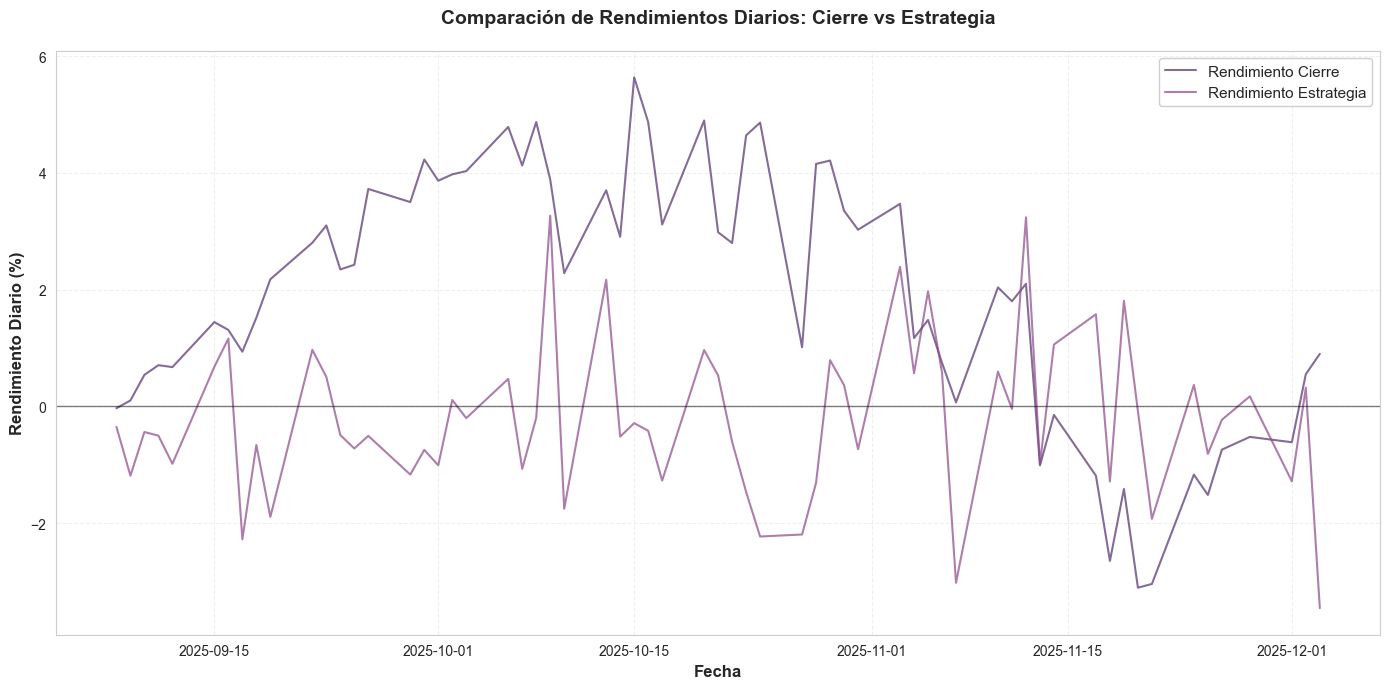

✅ Gráfica de rendimientos diarios generada


In [233]:
fig, ax = plt.subplots(figsize=(14, 7))

# Graficar rendimientos diarios
if 'Date' in df_comparacion.columns:
    ax.plot(df_comparacion['Date'], df_comparacion['Rend_Cierre'] * 100, 
            color=color_cierre, linewidth=1.5, label='Rendimiento Cierre', alpha=0.7)
    ax.plot(df_comparacion['Date'], df_comparacion['Rend_Estrategia'] * 100, 
            color=color_estrategia, linewidth=1.5, label='Rendimiento Estrategia', alpha=0.7)
    ax.set_xlabel('Fecha', fontsize=12, fontweight='bold')
else:
    ax.plot(df_comparacion['Rend_Cierre'] * 100, 
            color=color_cierre, linewidth=1.5, label='Rendimiento Cierre', alpha=0.7)
    ax.plot(df_comparacion['Rend_Estrategia'] * 100, 
            color=color_estrategia, linewidth=1.5, label='Rendimiento Estrategia', alpha=0.7)
    ax.set_xlabel('Días', fontsize=12, fontweight='bold')

# Línea de referencia en 0%
ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

ax.set_ylabel('Rendimiento Diario (%)', fontsize=12, fontweight='bold')
ax.set_title('Comparación de Rendimientos Diarios: Cierre vs Estrategia', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='best', fontsize=11, framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print(f"✅ Gráfica de rendimientos diarios generada")

### 📈 Gráfica 3: Comparación Normalizada (Base 100)

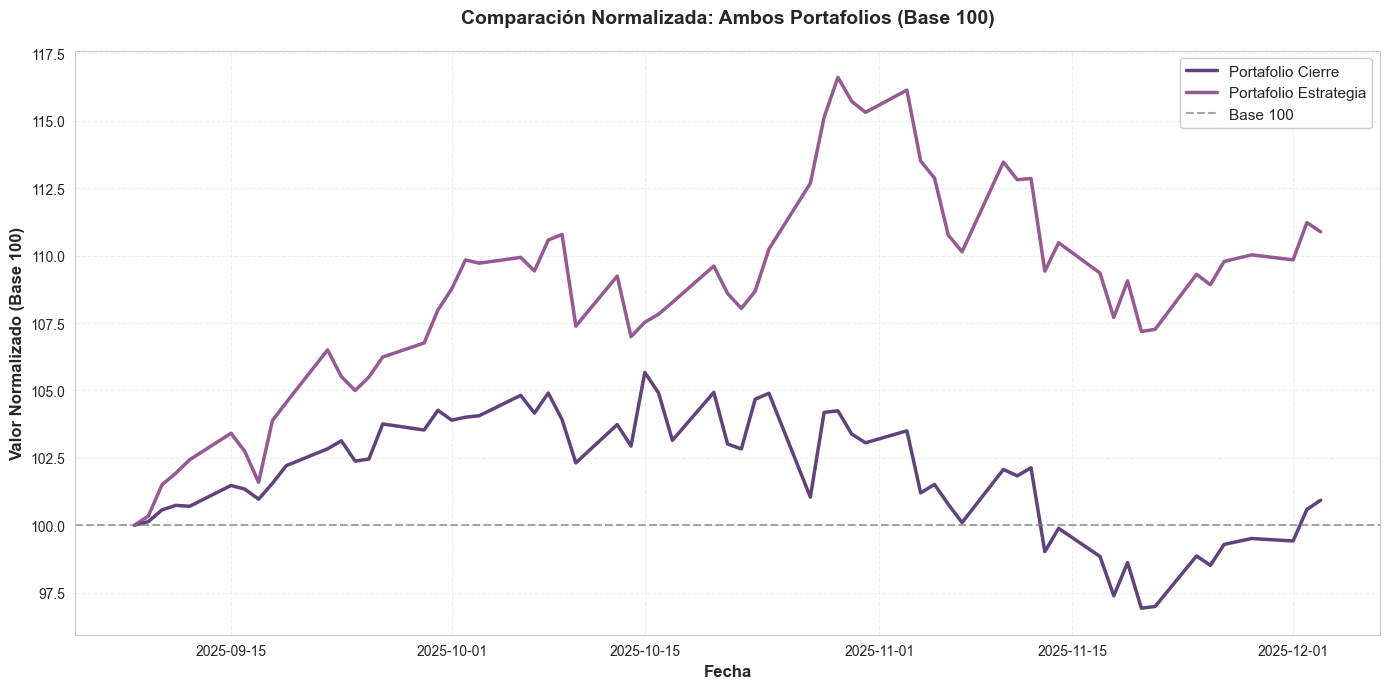

✅ Gráfica normalizada generada
   Cierre final: 100.93
   Estrategia final: 110.88


In [234]:
fig, ax = plt.subplots(figsize=(14, 7))

# Normalizar ambos portafolios a base 100
cierre_norm = (df_comp_valido['Valor_Cierre'] / df_comp_valido['Valor_Cierre'].iloc[0]) * 100
estrategia_norm = (df_comp_valido['Valor_Estrategia'] / df_comp_valido['Valor_Estrategia'].iloc[0]) * 100

# Graficar
if 'Date' in df_comp_valido.columns:
    ax.plot(df_comp_valido['Date'], cierre_norm, 
            color=color_cierre, linewidth=2.5, label='Portafolio Cierre', alpha=0.9)
    ax.plot(df_comp_valido['Date'], estrategia_norm, 
            color=color_estrategia, linewidth=2.5, label='Portafolio Estrategia', alpha=0.9)
    ax.set_xlabel('Fecha', fontsize=12, fontweight='bold')
else:
    ax.plot(cierre_norm.values, 
            color=color_cierre, linewidth=2.5, label='Portafolio Cierre', alpha=0.9)
    ax.plot(estrategia_norm.values, 
            color=color_estrategia, linewidth=2.5, label='Portafolio Estrategia', alpha=0.9)
    ax.set_xlabel('Días', fontsize=12, fontweight='bold')

# Línea de referencia en 100
ax.axhline(y=100, color='gray', linestyle='--', linewidth=1.5, alpha=0.7, label='Base 100')

ax.set_ylabel('Valor Normalizado (Base 100)', fontsize=12, fontweight='bold')
ax.set_title('Comparación Normalizada: Ambos Portafolios (Base 100)', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='best', fontsize=11, framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print(f"✅ Gráfica normalizada generada")
print(f"   Cierre final: {cierre_norm.iloc[-1]:.2f}")
print(f"   Estrategia final: {estrategia_norm.iloc[-1]:.2f}")

### 📊 Gráfica 4: Comparación de Métricas Clave

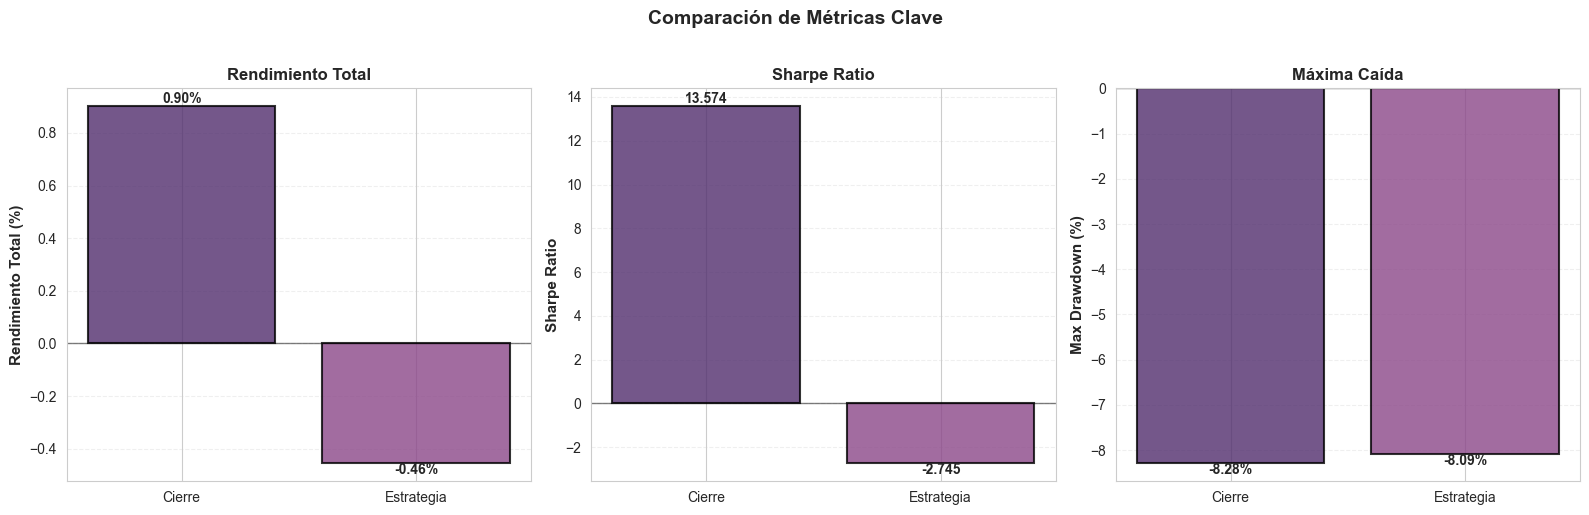

✅ Gráfica de métricas comparativas generada


In [235]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

# Gráfica 1: Rendimiento Total
metricas = ['Cierre', 'Estrategia']
rendimientos = [rend_total_cierre, rend_total_estrategia]
colores = [color_cierre, color_estrategia]

bars1 = ax1.bar(metricas, rendimientos, color=colores, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Rendimiento Total (%)', fontsize=11, fontweight='bold')
ax1.set_title('Rendimiento Total', fontsize=12, fontweight='bold')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
ax1.grid(True, alpha=0.3, axis='y', linestyle='--')

# Añadir valores en las barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%', ha='center', va='bottom' if height > 0 else 'top',
            fontsize=10, fontweight='bold')

# Gráfica 2: Sharpe Ratio
sharpes = [sharpe_cierre, sharpe_estrategia]

bars2 = ax2.bar(metricas, sharpes, color=colores, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Sharpe Ratio', fontsize=11, fontweight='bold')
ax2.set_title('Sharpe Ratio', fontsize=12, fontweight='bold')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom' if height > 0 else 'top',
            fontsize=10, fontweight='bold')

# Gráfica 3: Max Drawdown
drawdowns = [max_dd_cierre, max_dd_estrategia]

bars3 = ax3.bar(metricas, drawdowns, color=colores, alpha=0.8, edgecolor='black', linewidth=1.5)
ax3.set_ylabel('Max Drawdown (%)', fontsize=11, fontweight='bold')
ax3.set_title('Máxima Caída', fontsize=12, fontweight='bold')
ax3.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
ax3.grid(True, alpha=0.3, axis='y', linestyle='--')

for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%', ha='center', va='top',
            fontsize=10, fontweight='bold')

plt.suptitle('Comparación de Métricas Clave', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"✅ Gráfica de métricas comparativas generada")

### 📊 Gráfica 5: Diagrama de Dispersión Riesgo-Retorno

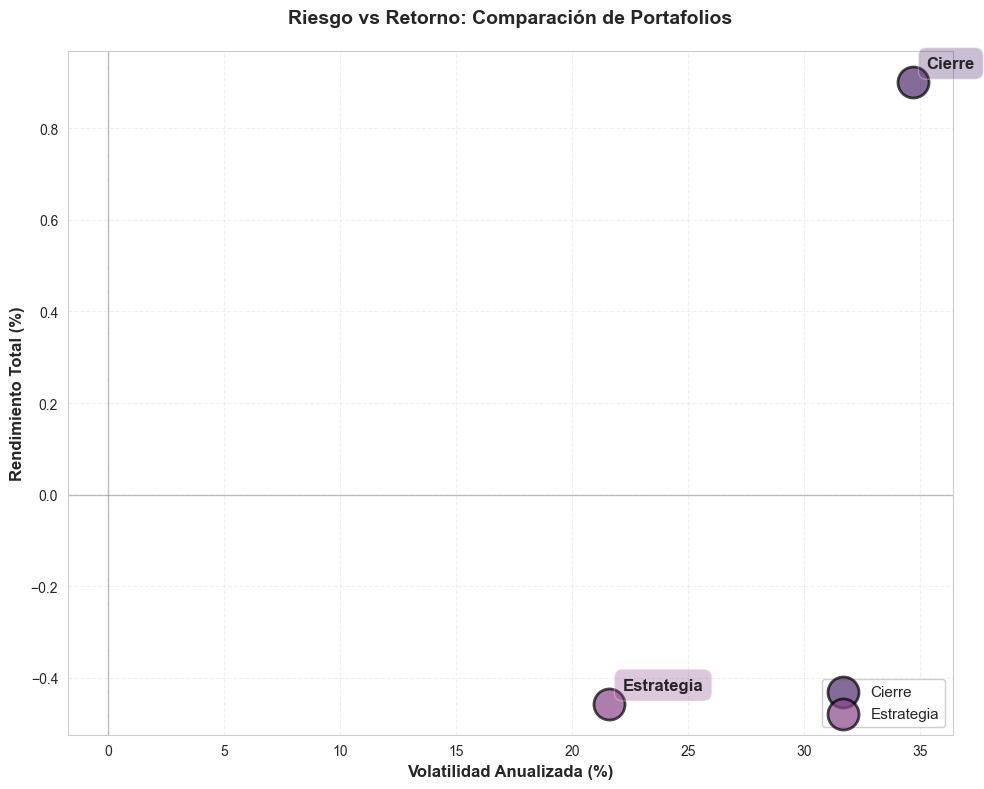

✅ Gráfica de riesgo-retorno generada

📊 Análisis Riesgo-Retorno:
   Cierre:      0.90% rendimiento | 34.68% volatilidad
   Estrategia:  -0.46% rendimiento | 21.58% volatilidad


In [236]:
fig, ax = plt.subplots(figsize=(10, 8))

# Datos
portafolios = ['Cierre', 'Estrategia']
volatilidades = [vol_anual_cierre, vol_anual_estrategia]
rendimientos = [rend_total_cierre, rend_total_estrategia]
colores_scatter = [color_cierre, color_estrategia]

# Scatter plot
for i, nombre in enumerate(portafolios):
    ax.scatter(volatilidades[i], rendimientos[i], 
              s=500, color=colores_scatter[i], alpha=0.7, 
              edgecolors='black', linewidth=2, label=nombre)
    
    # Añadir etiquetas
    ax.annotate(nombre, 
               (volatilidades[i], rendimientos[i]),
               xytext=(10, 10), textcoords='offset points',
               fontsize=12, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.5', facecolor=colores_scatter[i], alpha=0.3))

ax.set_xlabel('Volatilidad Anualizada (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Rendimiento Total (%)', fontsize=12, fontweight='bold')
ax.set_title('Riesgo vs Retorno: Comparación de Portafolios', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(loc='best', fontsize=11, framealpha=0.95)

# Líneas de referencia
ax.axhline(y=0, color='gray', linestyle='-', linewidth=1, alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='-', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.show()

print(f"✅ Gráfica de riesgo-retorno generada")
print(f"\n📊 Análisis Riesgo-Retorno:")
print(f"   Cierre:      {rend_total_cierre:.2f}% rendimiento | {vol_anual_cierre:.2f}% volatilidad")
print(f"   Estrategia:  {rend_total_estrategia:.2f}% rendimiento | {vol_anual_estrategia:.2f}% volatilidad")

### 📋 Tabla Resumen: Comparación Completa

In [237]:
# ============================================================================
# TABLA RESUMEN COMPARATIVA
# ============================================================================

# Crear tabla comparativa
tabla_resumen = pd.DataFrame({
    'Métrica': [
        'Valor Inicial',
        'Valor Final',
        'Rendimiento Total',
        'Rend. Promedio Diario',
        'Volatilidad Diaria',
        'Volatilidad Anual',
        'Sharpe Ratio',
        'Max Drawdown',
        'Mejor Día',
        'Peor Día',
        'Días Positivos',
        '% Días Positivos'
    ],
    'Portafolio Cierre': [
        f'${valor_inicial:,.2f}',
        f'${valor_final_cierre:,.2f}',
        f'{rend_total_cierre:.2f}%',
        f'{rend_prom_diario_cierre:.4f}%',
        f'{vol_diaria_cierre:.4f}%',
        f'{vol_anual_cierre:.2f}%',
        f'{sharpe_cierre:.4f}',
        f'{max_dd_cierre:.2f}%',
        f'{mejor_dia_cierre:.2f}%',
        f'{peor_dia_cierre:.2f}%',
        f'{dias_positivos_cierre}',
        f'{dias_positivos_cierre/total_dias*100:.1f}%'
    ],
    'Portafolio Estrategia': [
        f'${valor_inicial:,.2f}',
        f'${valor_final_estrategia:,.2f}',
        f'{rend_total_estrategia:.2f}%',
        f'{rend_prom_diario_estrategia:.4f}%',
        f'{vol_diaria_estrategia:.4f}%',
        f'{vol_anual_estrategia:.2f}%',
        f'{sharpe_estrategia:.4f}',
        f'{max_dd_estrategia:.2f}%',
        f'{mejor_dia_estrategia:.2f}%',
        f'{peor_dia_estrategia:.2f}%',
        f'{dias_positivos_estrategia}',
        f'{dias_positivos_estrategia/total_dias*100:.1f}%'
    ]
})

print("="*100)
print("TABLA RESUMEN COMPARATIVA")
print("="*100)
print(tabla_resumen.to_string(index=False))
print("="*100)

print(f"\n📊 Información Adicional:")
print(f"   Correlación entre portafolios:     {correlacion:.4f}")
print(f"   Días totales analizados:           {total_dias}")
print(f"   Diferencia de rendimiento:         {rend_total_cierre - rend_total_estrategia:.2f}% (Cierre - Estrategia)")
print(f"   Diferencia de Sharpe:              {sharpe_cierre - sharpe_estrategia:.4f}")
print(f"   Días donde Cierre > Estrategia:    {dias_cierre_gana}/{total_dias} ({pct_cierre_gana:.1f}%)")

# Determinar el ganador
print(f"\n{'='*100}")
if rend_total_cierre > rend_total_estrategia:
    ventaja = rend_total_cierre - rend_total_estrategia
    print(f"🏆 GANADOR: PORTAFOLIO CIERRE")
    print(f"   Ventaja: +{ventaja:.2f}% de rendimiento total")
    if sharpe_cierre > sharpe_estrategia:
        print(f"   Además tiene mejor Sharpe Ratio: {sharpe_cierre:.4f} vs {sharpe_estrategia:.4f}")
else:
    ventaja = rend_total_estrategia - rend_total_cierre
    print(f"🏆 GANADOR: PORTAFOLIO ESTRATEGIA")
    print(f"   Ventaja: +{ventaja:.2f}% de rendimiento total")
    if sharpe_estrategia > sharpe_cierre:
        print(f"   Además tiene mejor Sharpe Ratio: {sharpe_estrategia:.4f} vs {sharpe_cierre:.4f}")

print(f"{'='*100}\n")

TABLA RESUMEN COMPARATIVA
              Métrica Portafolio Cierre Portafolio Estrategia
        Valor Inicial     $1,000,000.00         $1,000,000.00
          Valor Final     $1,009,012.05           $995,440.48
    Rendimiento Total             0.90%                -0.46%
Rend. Promedio Diario           1.8838%              -0.2195%
   Volatilidad Diaria           2.1848%               1.3594%
    Volatilidad Anual            34.68%                21.58%
         Sharpe Ratio           13.5742               -2.7446
         Max Drawdown            -8.28%                -8.09%
            Mejor Día             5.64%                 3.27%
             Peor Día            -3.11%                -3.46%
       Días Positivos                49                    24
     % Días Positivos             79.0%                 38.7%

📊 Información Adicional:
   Correlación entre portafolios:     0.1019
   Días totales analizados:           62
   Diferencia de rendimiento:         1.36% (Cierre - Es